# Setup

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


## Theming

In [ ]:
sns.set_theme(palette='husl')


# Introduction

-   **What is a Unicorn Startup?**

    In business, a unicorn is a startup company valued at over US\$1
    billion which is privately owned and not listed on a share market.

# Data Preparation

## Load Data

In [ ]:
pd.set_option('display.max_columns', 50, 'display.width', 200)
df = pd.read_csv('input/datasets/Unicorns_Completed (2024).csv')
df_latest = pd.read_csv('input/raw_data/list-of-unicorn-startups_20250619 (wikipedia).csv')


## Data Cleaning

In [ ]:
import re
def convert_years_months(s):
    m = re.match(r'(\d+)y?\s?(\d+)m?o?', s)
    return f'{m[1]}y{m[2]}m' if m else s

df['Years to Unicorn'] = df['Years to Unicorn'].apply(convert_years_months)

def correct_industry_labels(s):
    if s == 'Health':
        return 'Healthcare & Life Sciences'
    if s == 'West Palm Beach':
        return 'Enterprise Tech'
    return s

df['Industry'] = df['Industry'].apply(correct_industry_labels)

def correct_company_names(s):
    if s == 'Scale':
        return 'Scale AI'
    return s

df['Company'] = df['Company'].apply(correct_company_names)


## Prepare Data

In [ ]:
df['Unicorn Date'] = pd.to_datetime(df['Unicorn Date'])
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'])
df['Unicorn Year'] = df['Unicorn Date'].dt.year
df['Funding ($B)'] = df['Total Equity Funding ($)'] / 1e9

df_latest.rename(columns={'Valuation (US$ billions)': 'Latest Valuation ($B)'}, inplace=True)
df_latest = df_latest.drop_duplicates('Company')
df_latest['Company'] = df_latest['Company'].str.strip()
df = df.merge(df_latest[['Company', 'Latest Valuation ($B)']], on='Company', how='left')
df['Latest Valuation ($B)'] = pd.to_numeric(df['Latest Valuation ($B)'].fillna(value=df['Valuation ($B)']))


## Preview

In [ ]:
print(df.info())
print(df.describe())
df.head()


``` example
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Company                   1244 non-null   object
 1   Valuation ($B)            1244 non-null   float64
 2   Total Equity Funding ($)  1244 non-null   int64
 3   Unicorn Date              1244 non-null   datetime64[ns]
 4   Date Founded              1244 non-null   int64
 5   Years to Unicorn          1244 non-null   object
 6   Industry                  1244 non-null   object
 7   Country                   1244 non-null   object
 8   City                      1244 non-null   object
 9   Select Investors          1244 non-null   object
 10  Unicorn Year              1244 non-null   int32
 11  Funding ($B)              1244 non-null   float64
 12  Latest Valuation ($B)     1244 non-null   float64
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(6)
memory usage: 121.6+ KB
None
       Valuation ($B)  Total Equity Funding ($)                   Unicorn Date  Date Founded  Unicorn Year  Funding ($B)  Latest Valuation ($B)
count     1244.000000              1.244000e+03                           1244   1244.000000   1244.000000   1244.000000            1244.000000
mean         3.626487              5.985096e+08  2021-02-10 22:05:24.115755776   2013.372990   2020.630225      0.598510               3.751712
min          1.000000              0.000000e+00            2007-07-02 00:00:00   1919.000000   2007.000000      0.000000               1.000000
25%          1.100000              2.170000e+08            2020-08-13 12:00:00   2011.000000   2020.000000      0.217000               1.000000
50%          1.550000              3.525000e+08            2021-07-21 00:00:00   2014.000000   2021.000000      0.352500               1.500000
75%          3.000000              6.090000e+08            2022-02-24 00:00:00   2017.000000   2022.000000      0.609000               2.800000
max        350.000000              1.900000e+10            2024-12-24 00:00:00   2024.000000   2024.000000     19.000000             350.000000
std         15.016365              1.222045e+09                            NaN      5.515788      2.139147      1.222045              17.244263
```

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Unicorn Year</th>
      <th>Funding ($B)</th>
      <th>Latest Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.0</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>2012</td>
      <td>9.0</td>
      <td>350.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.0</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>2017</td>
      <td>8.0</td>
      <td>315.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.0</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>2019</td>
      <td>18.0</td>
      <td>300.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.0</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>2017</td>
      <td>19.0</td>
      <td>150.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.0</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>2014</td>
      <td>9.0</td>
      <td>91.5</td>
    </tr>
  </tbody>
</table>
</div>

# Descriptive Analysis

## Distribution

### Valuations

#### Distribution of Valuations across Different Industries

In [ ]:
# Group by industry and sum valuations
industry_valuation_df = df.groupby('Industry')['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)', ascending=False)
industry_valuation_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Industry</th>
      <th>Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Enterprise Tech</td>
      <td>1762.04</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Financial Services</td>
      <td>760.16</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Industrials</td>
      <td>678.55</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Consumer &amp; Retail</td>
      <td>593.30</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Healthcare &amp; Life Sciences</td>
      <td>399.95</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Media &amp; Entertainment</td>
      <td>200.29</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Insurance</td>
      <td>117.06</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
ax = sns.barplot(industry_valuation_df,
                 y='Industry',
                 x='Valuation ($B)',
                 hue='Industry')
plt.xlabel('Total Valuation ($B)')
plt.ylabel('Industry')
plt.suptitle('Distribution of Valuations across Different Industries')
plt.grid(axis='x', alpha=0.75)
plt.show()


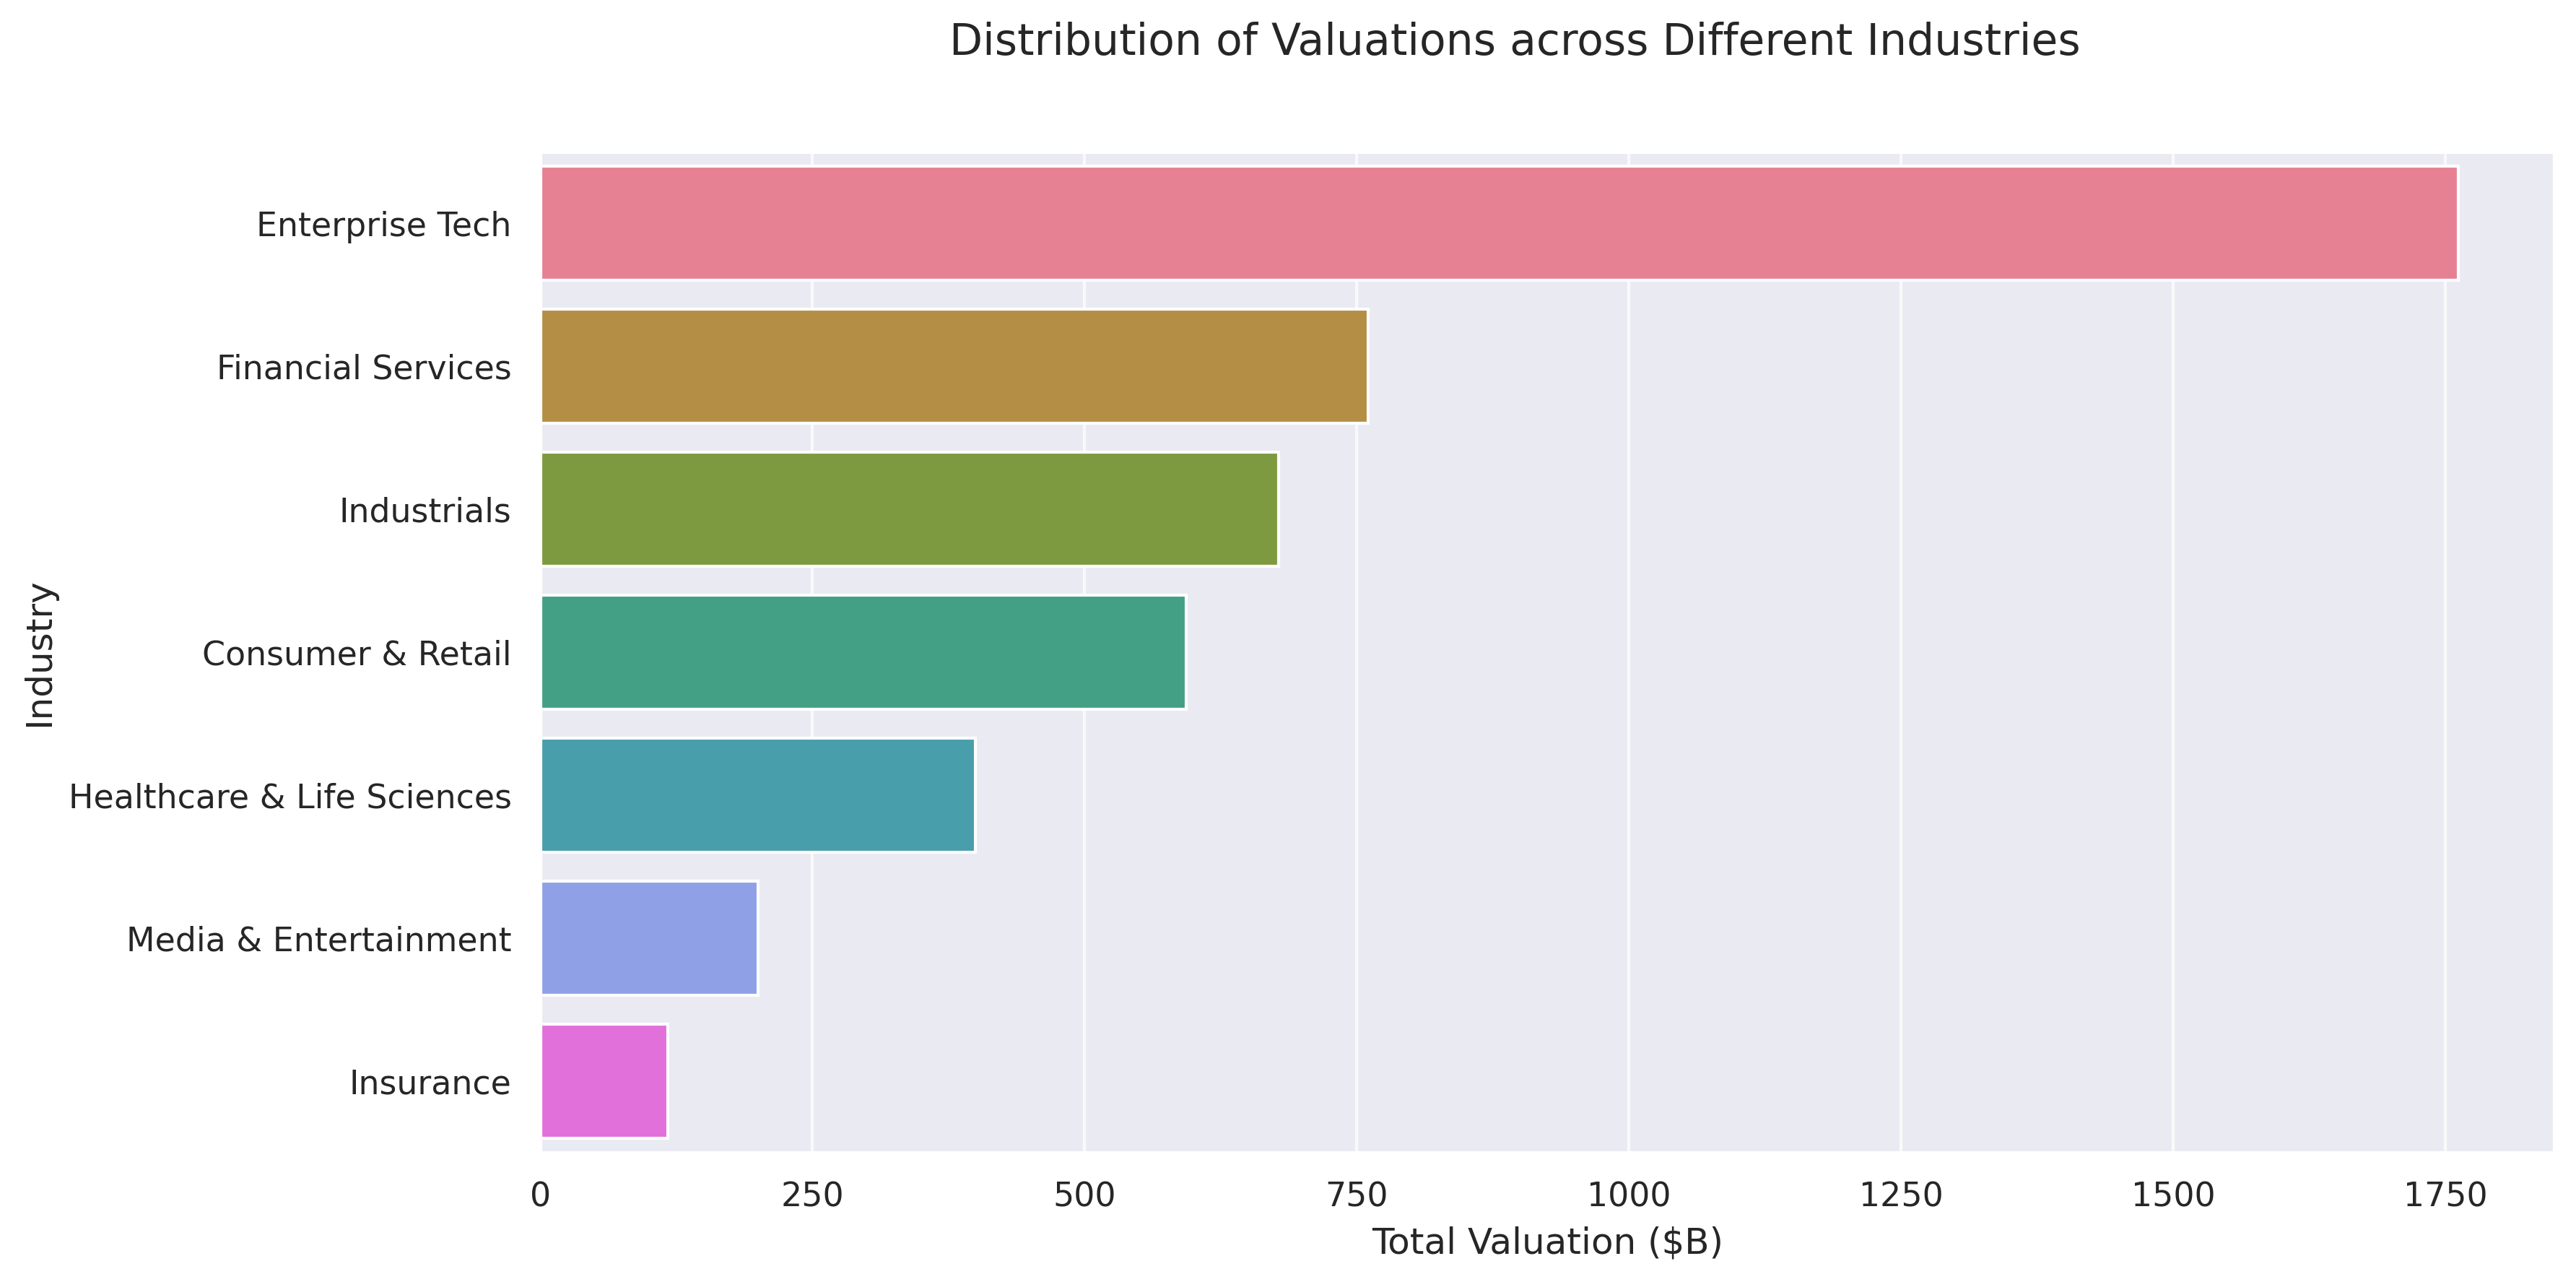

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
sns.boxplot(df, y='Industry', x=df['Valuation ($B)']*1e9, hue='Industry')
plt.title('Distribution of Valuations across Different Industries')
plt.xlabel('Total Valuation ($)')
plt.ylabel('Industry')
plt.xscale('log')
plt.grid(axis='x', alpha=0.7)
plt.show()


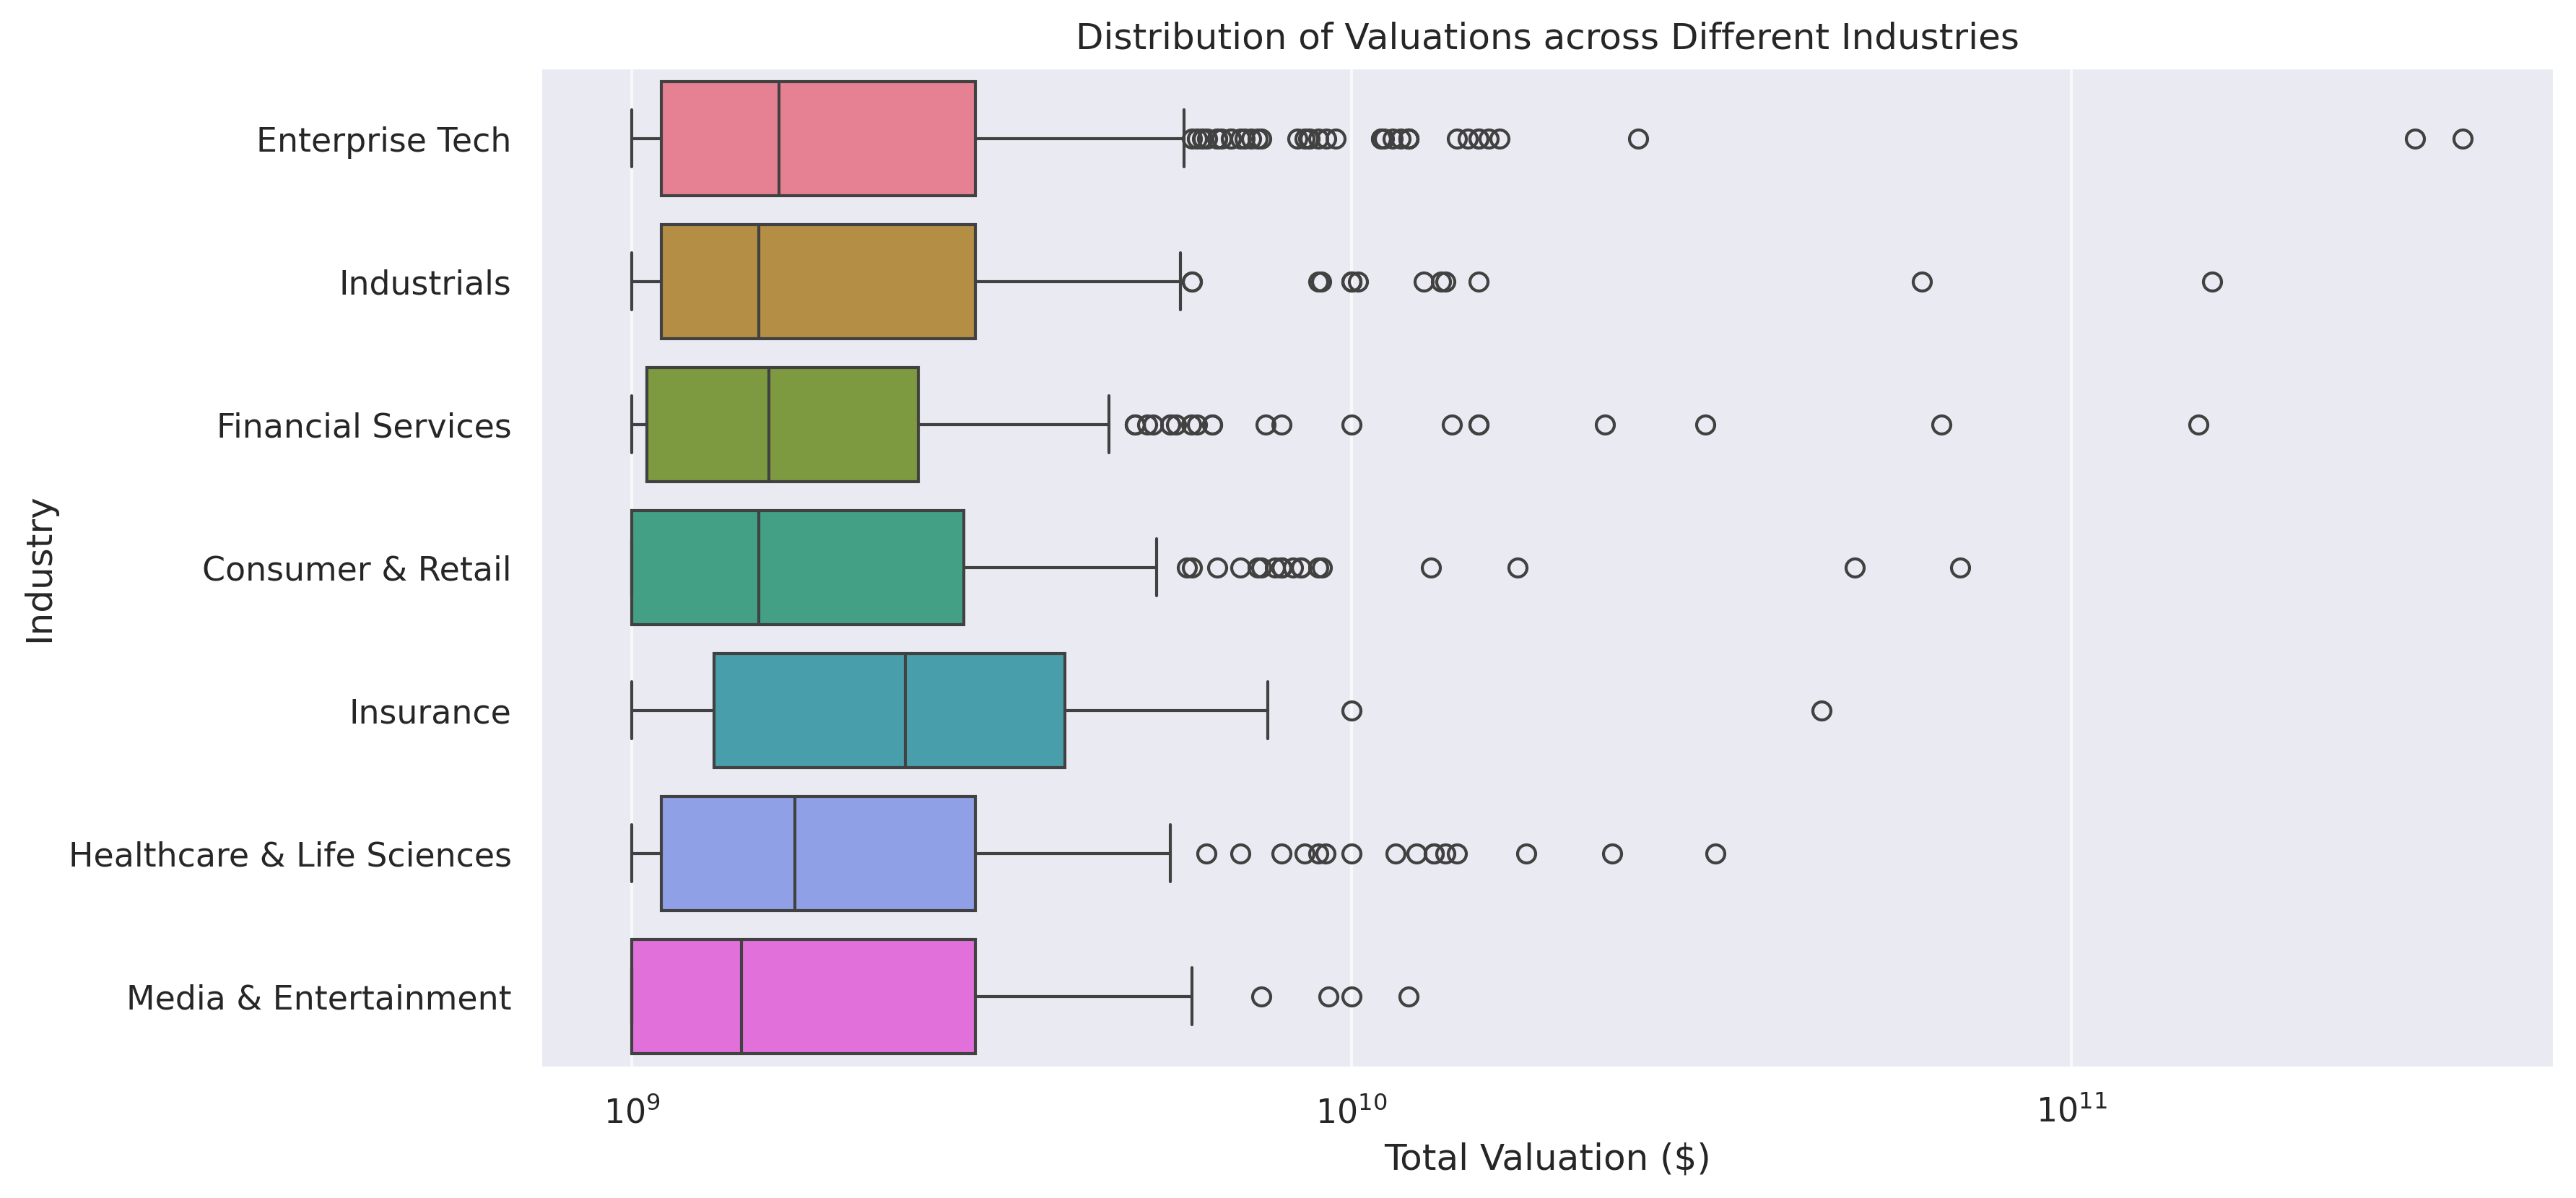

#### Mean Distribution of Valuations across Different Industries

In [ ]:
industry_valuation_df = df.groupby('Industry')['Valuation ($B)'].mean().reset_index().sort_values('Valuation ($B)', ascending=False)
industry_valuation_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Industry</th>
      <th>Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>5</th>
      <td>Insurance</td>
      <td>4.682400</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Enterprise Tech</td>
      <td>4.350716</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Industrials</td>
      <td>3.707923</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Healthcare &amp; Life Sciences</td>
      <td>3.389407</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Financial Services</td>
      <td>3.363540</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Consumer &amp; Retail</td>
      <td>2.937129</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Media &amp; Entertainment</td>
      <td>2.356353</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 6),dpi=300)
sns.barplot(industry_valuation_df,
            y='Industry',
            x='Valuation ($B)',
            hue='Industry')
plt.title('Mean Distribution of Valuations across Different Industries')
plt.xlabel('Mean Valuation ($B)')
plt.ylabel('Industry')
plt.grid(axis='x', alpha=0.75)


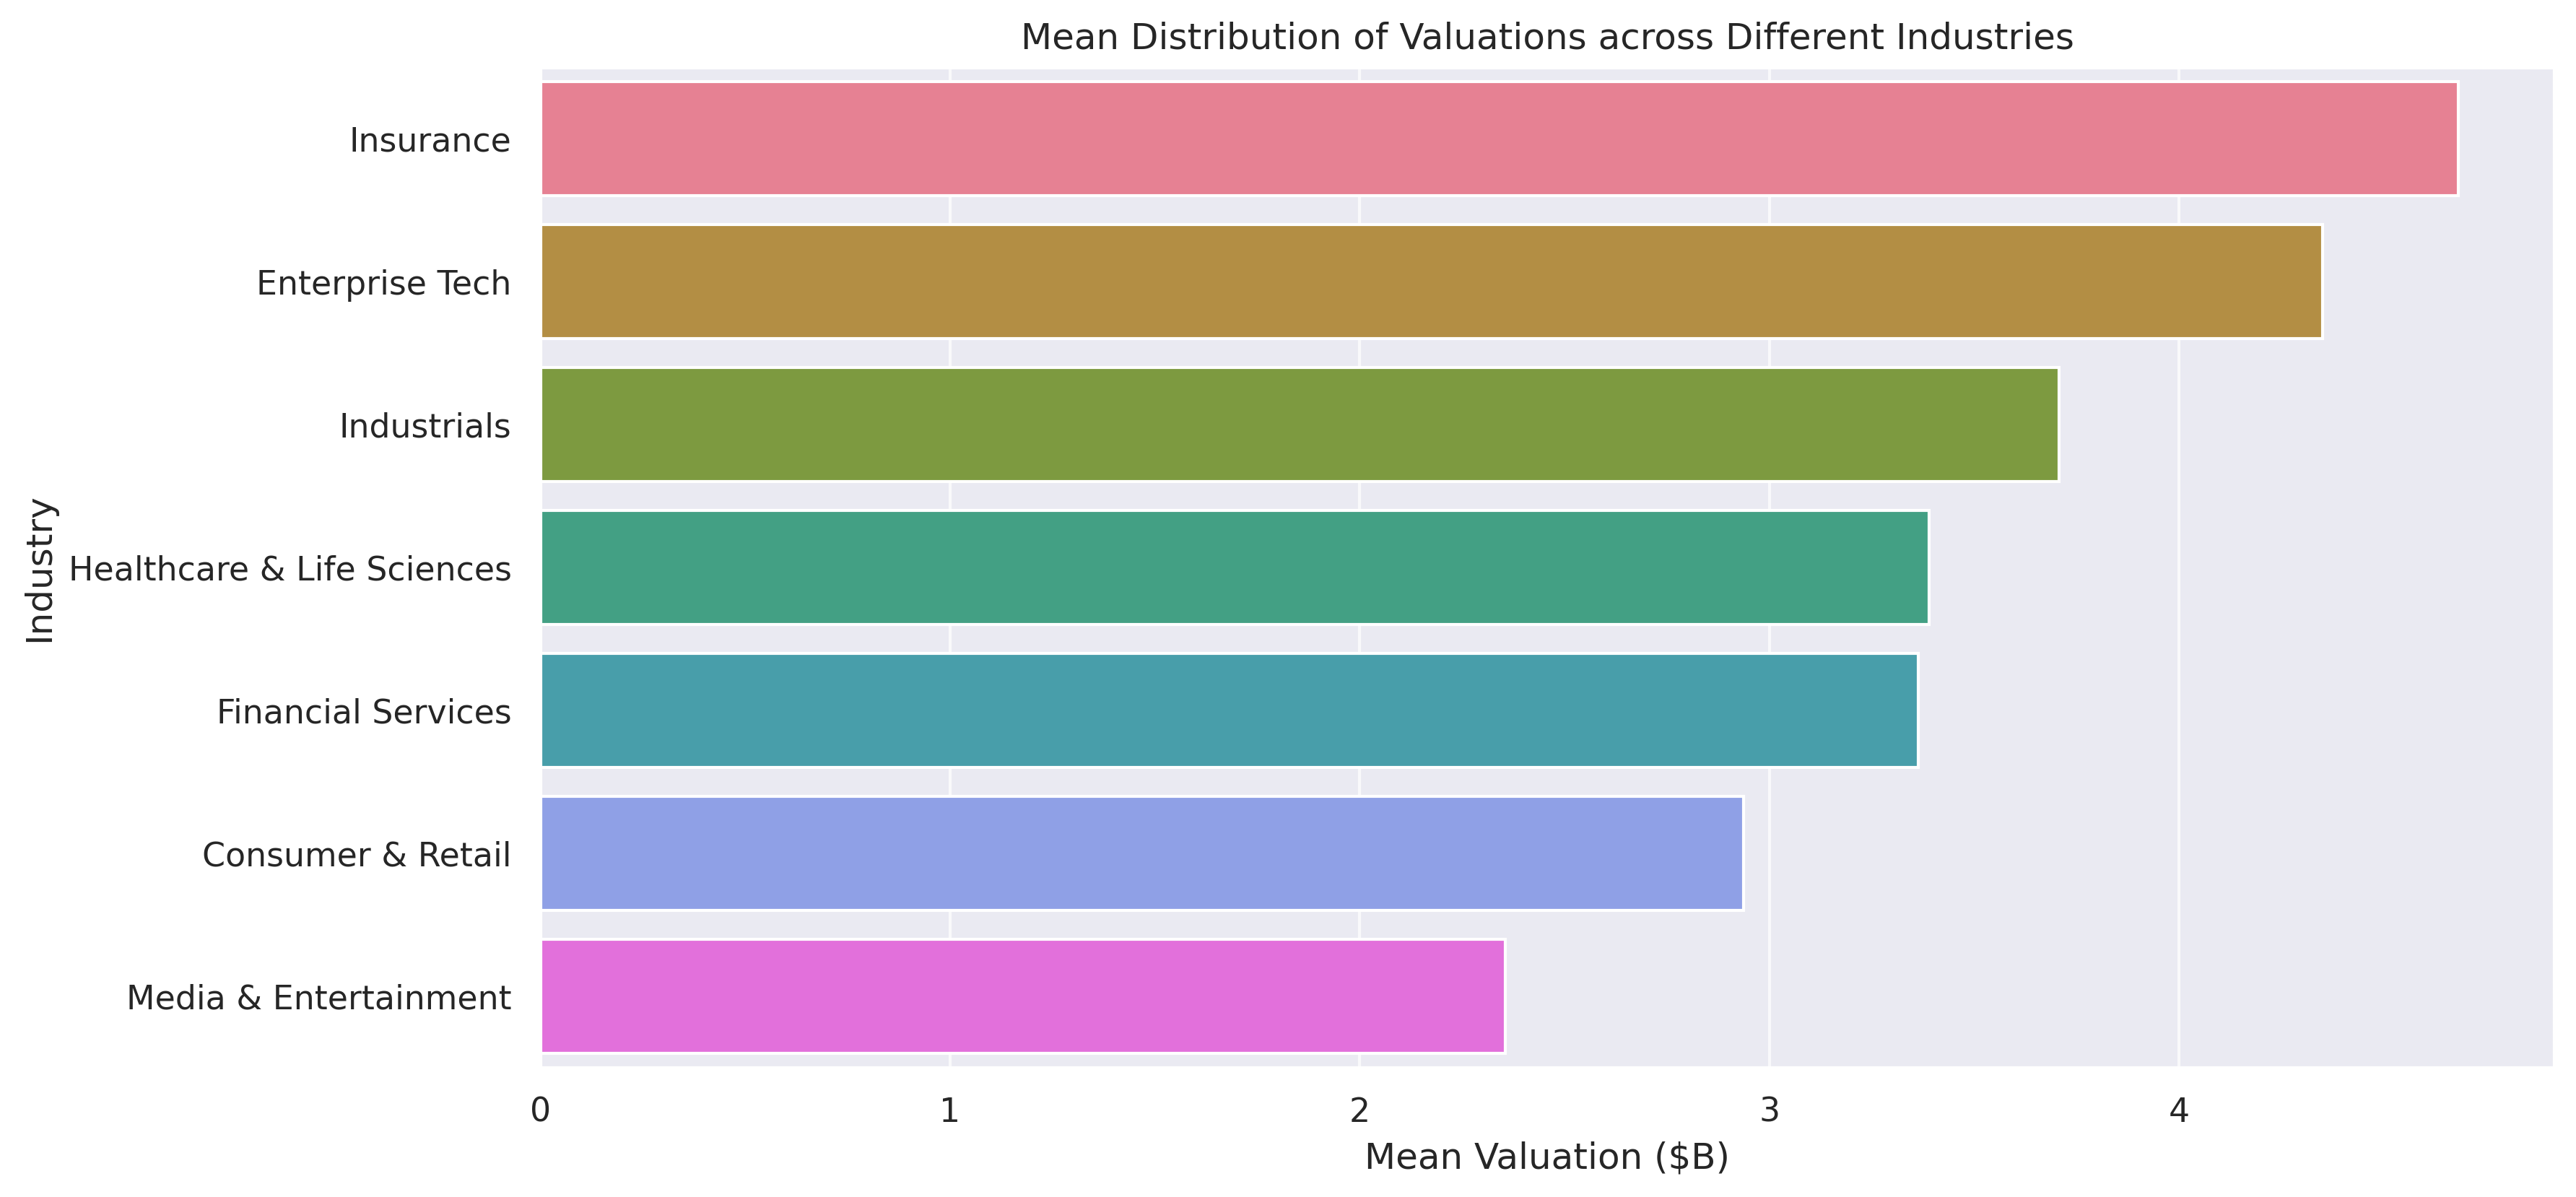

#### Distribution of Valuations across Different Countries

In [ ]:
# Group by Country and sum valuations
country_valuation_df = df.groupby('Country')['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)', ascending=False).head(20)
country_valuation_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>53</th>
      <td>United States</td>
      <td>2564.14</td>
    </tr>
    <tr>
      <th>10</th>
      <td>China</td>
      <td>835.65</td>
    </tr>
    <tr>
      <th>52</th>
      <td>United Kingdom</td>
      <td>197.35</td>
    </tr>
    <tr>
      <th>24</th>
      <td>India</td>
      <td>172.07</td>
    </tr>
    <tr>
      <th>43</th>
      <td>Singapore</td>
      <td>92.06</td>
    </tr>
    <tr>
      <th>21</th>
      <td>Germany</td>
      <td>85.90</td>
    </tr>
    <tr>
      <th>20</th>
      <td>France</td>
      <td>70.86</td>
    </tr>
    <tr>
      <th>27</th>
      <td>Israel</td>
      <td>56.22</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Canada</td>
      <td>56.00</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Australia</td>
      <td>48.84</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Brazil</td>
      <td>34.13</td>
    </tr>
    <tr>
      <th>45</th>
      <td>South Korea</td>
      <td>31.34</td>
    </tr>
    <tr>
      <th>47</th>
      <td>Sweden</td>
      <td>29.42</td>
    </tr>
    <tr>
      <th>36</th>
      <td>Netherlands</td>
      <td>24.46</td>
    </tr>
    <tr>
      <th>35</th>
      <td>Mexico</td>
      <td>18.70</td>
    </tr>
    <tr>
      <th>19</th>
      <td>Finland</td>
      <td>14.91</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Belgium</td>
      <td>11.95</td>
    </tr>
    <tr>
      <th>42</th>
      <td>Seychelles</td>
      <td>11.80</td>
    </tr>
    <tr>
      <th>26</th>
      <td>Ireland</td>
      <td>11.05</td>
    </tr>
    <tr>
      <th>29</th>
      <td>Japan</td>
      <td>10.82</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.subplots(figsize=(12, 8), dpi=300)
sns.barplot(country_valuation_df,
            y='Country',
            x='Valuation ($B)',
            hue='Country')
plt.suptitle('Distribution of Valuations across Different Countries')
plt.xlabel('Total Valuation ($B)')
plt.ylabel('Countries')
plt.grid(axis='x', alpha=0.75)
plt.xscale('log')
plt.show()


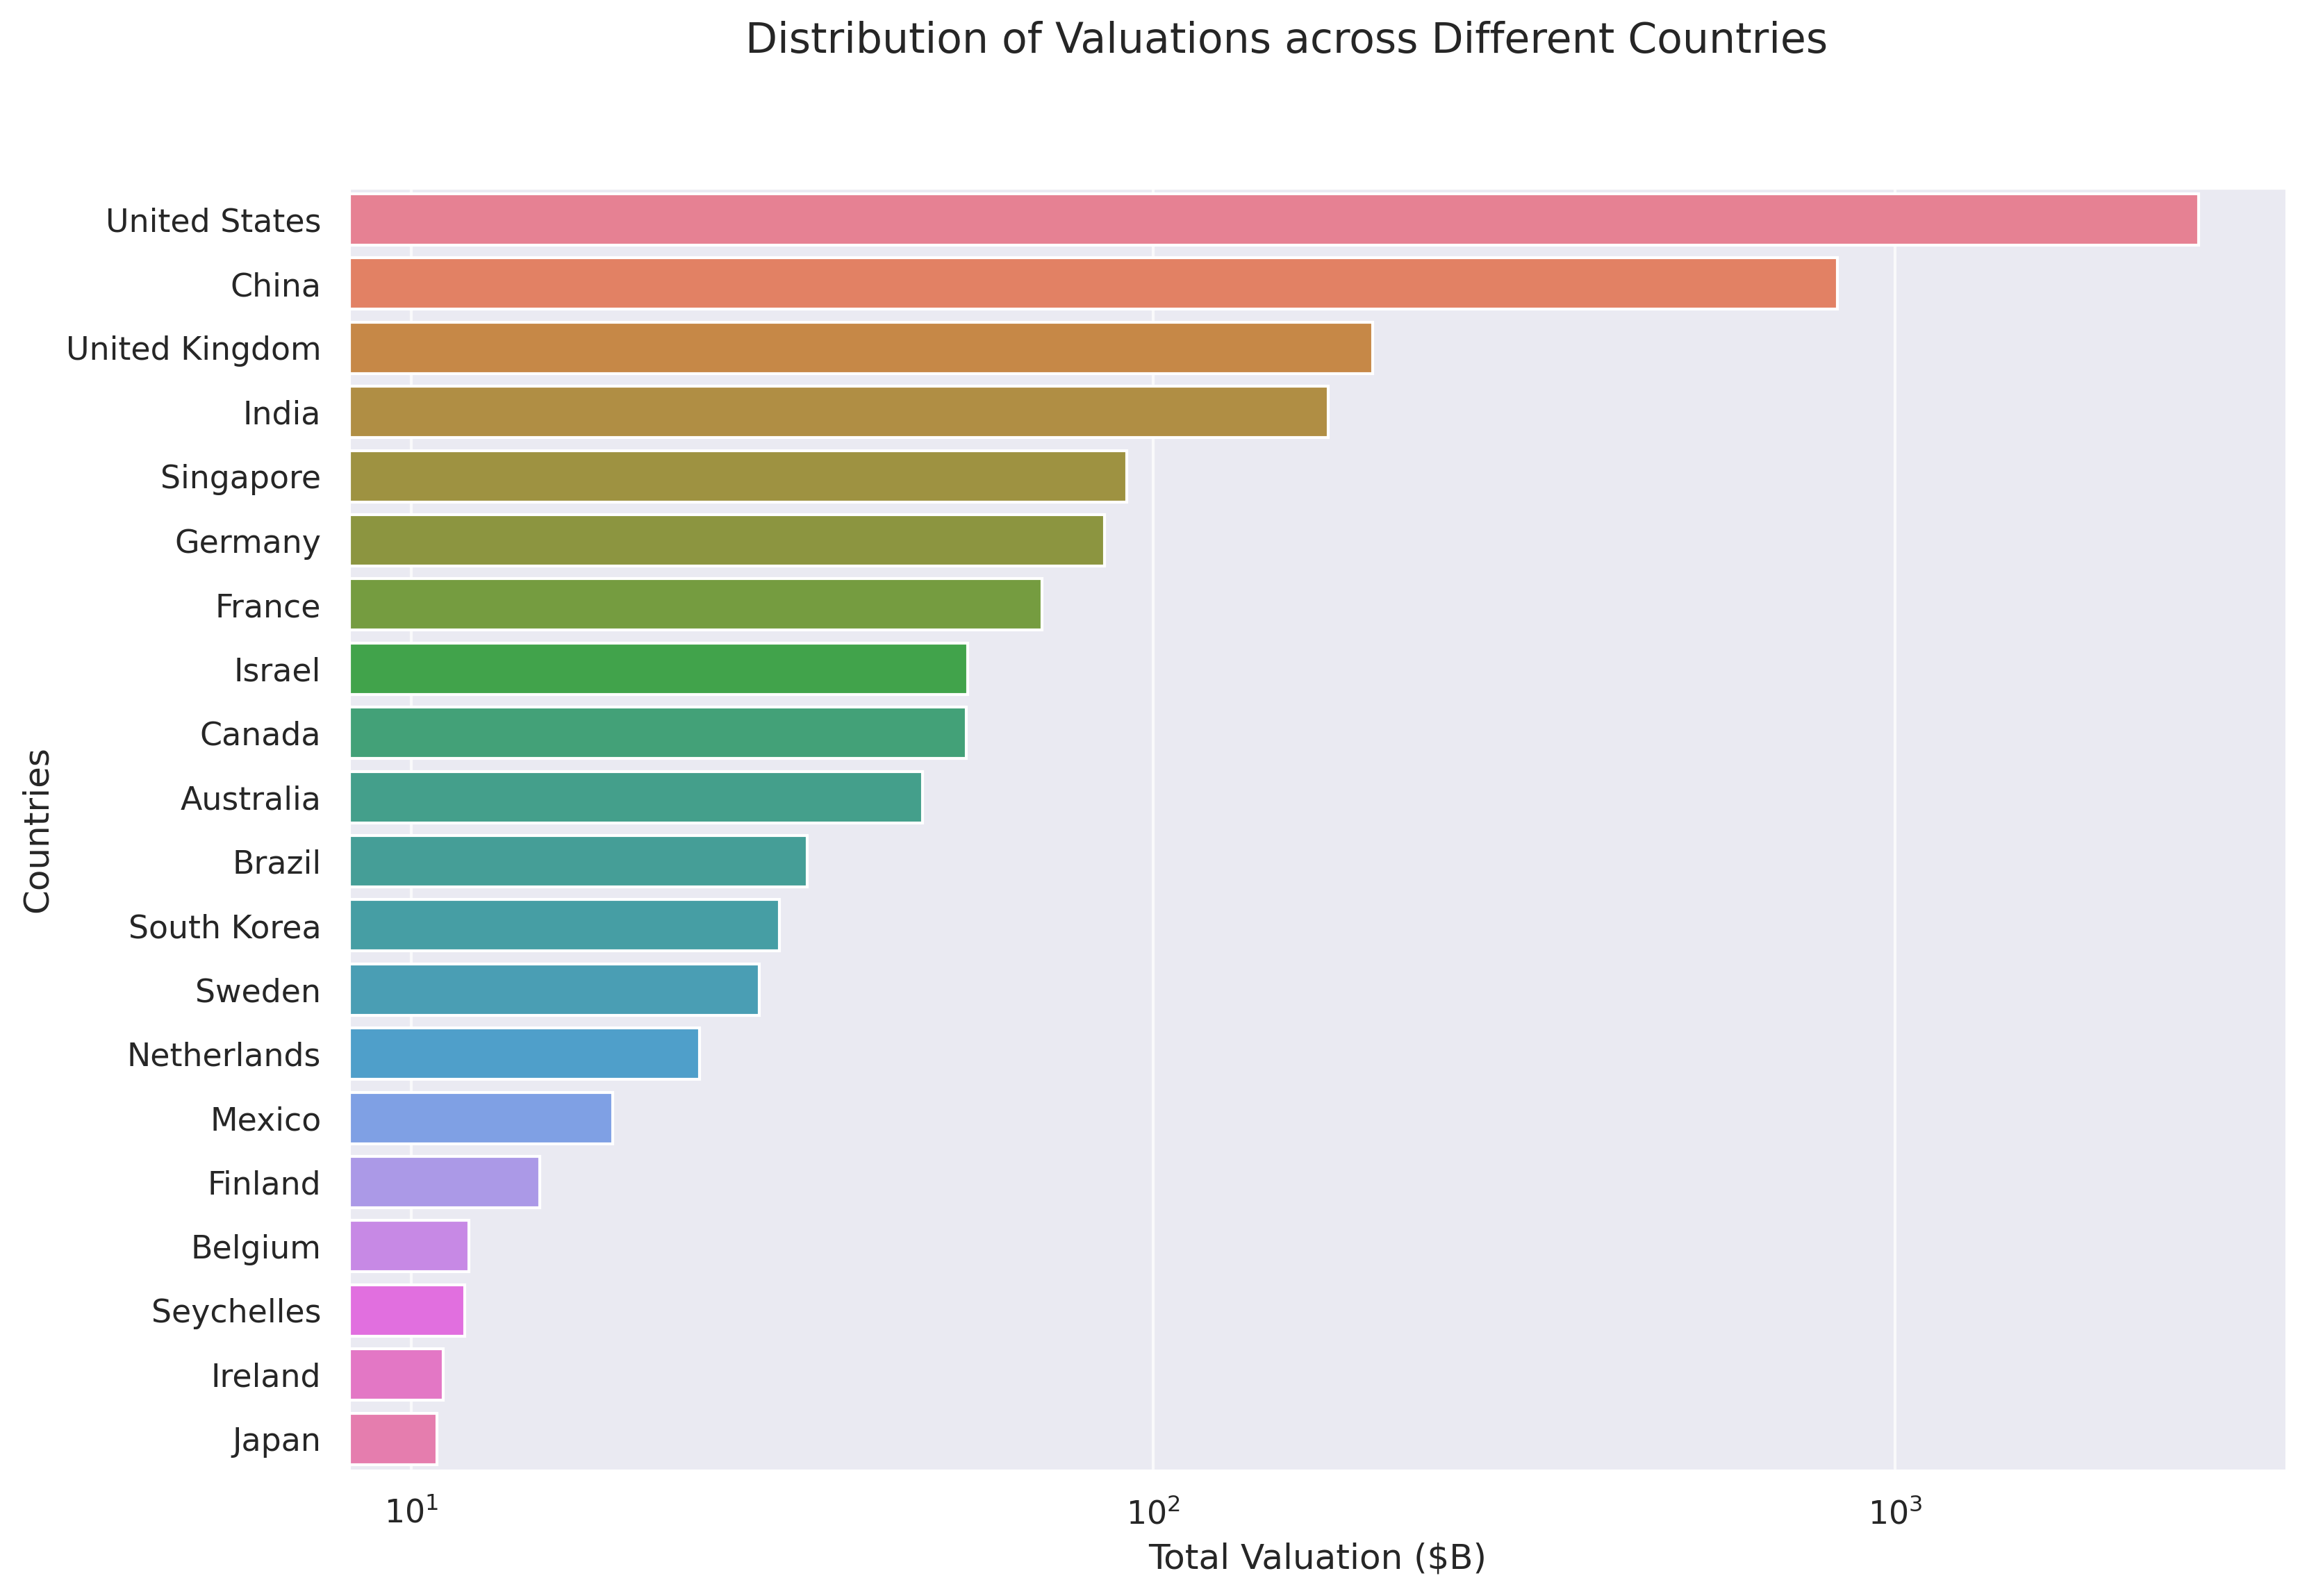

#### Mean Distribution of Valuations across Different Countries

In [ ]:
mean_country_valuation_df = df[df['Country'].isin(country_valuation_df['Country'])].groupby('Country')['Valuation ($B)'].mean().reset_index().sort_values('Valuation ($B)', ascending=False).head(20)
mean_country_valuation_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>14</th>
      <td>Seychelles</td>
      <td>5.900000</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Singapore</td>
      <td>5.753750</td>
    </tr>
    <tr>
      <th>4</th>
      <td>China</td>
      <td>5.461765</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Australia</td>
      <td>5.426667</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Sweden</td>
      <td>4.903333</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Belgium</td>
      <td>3.983333</td>
    </tr>
    <tr>
      <th>19</th>
      <td>United States</td>
      <td>3.748743</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Finland</td>
      <td>3.727500</td>
    </tr>
    <tr>
      <th>18</th>
      <td>United Kingdom</td>
      <td>3.588182</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Germany</td>
      <td>2.770968</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Netherlands</td>
      <td>2.717778</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Canada</td>
      <td>2.666667</td>
    </tr>
    <tr>
      <th>6</th>
      <td>France</td>
      <td>2.530714</td>
    </tr>
    <tr>
      <th>8</th>
      <td>India</td>
      <td>2.530441</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Israel</td>
      <td>2.444348</td>
    </tr>
    <tr>
      <th>16</th>
      <td>South Korea</td>
      <td>2.410769</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Mexico</td>
      <td>2.337500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Brazil</td>
      <td>1.896111</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Ireland</td>
      <td>1.578571</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Japan</td>
      <td>1.352500</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(mean_country_valuation_df,
            y='Country',
            x='Valuation ($B)',
            hue='Country')
plt.suptitle('Mean Distribution of Valuations across Different Countries')
plt.xlabel('Mean Valuation ($B)')
plt.ylabel('Countries')
plt.grid(axis='x', alpha=0.75)
plt.show()


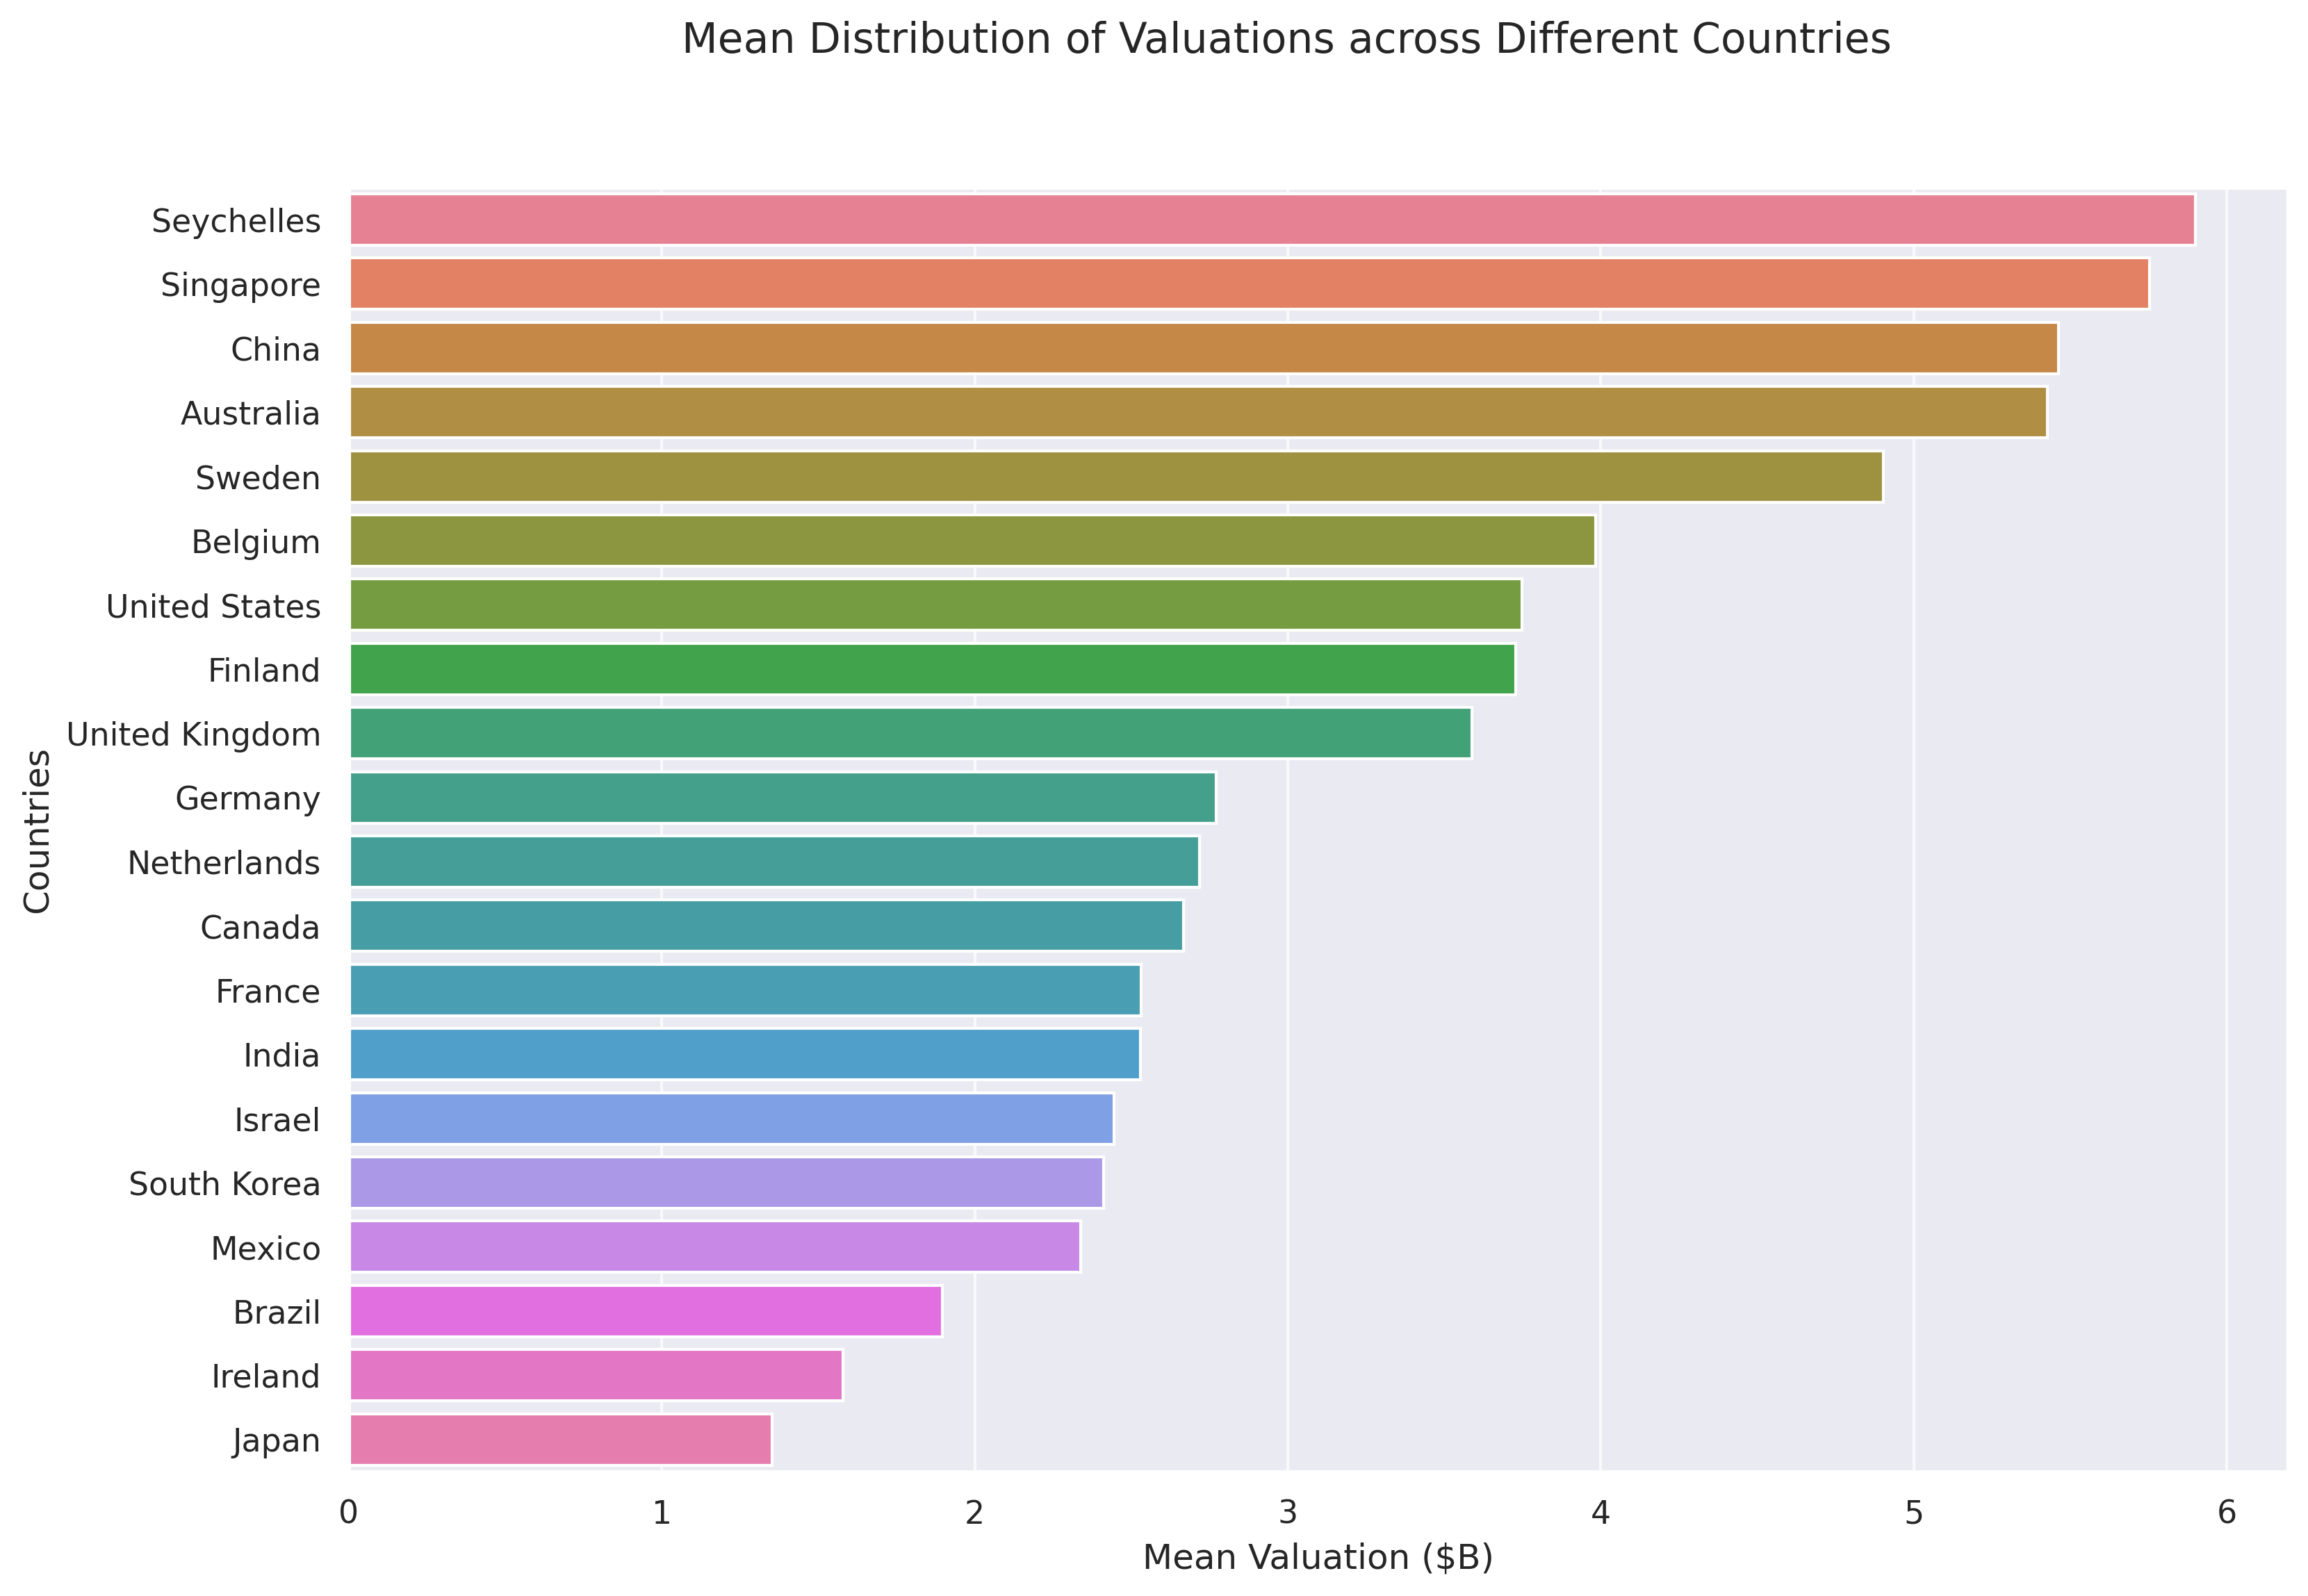

#### Distribution of Valuations by Number of Companies

In [ ]:
# Define the bins for valuation ranges
bins = [0, 1, 1.5, 2, 3, 4, 5, 6, 8, 10, 20, 30, 50, 100, 200, 300, 400]
labels =  [f'{a}-{b}' for a, b in zip(bins[:-1], bins[1:])]
cuts = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Count the number of companies in each bin
valuation_distribution = cuts.value_counts().sort_index()

# Plot the Bar Chart
plt.figure(figsize=(12, 6), dpi=300)
ax = sns.barplot(x=valuation_distribution.index,
                 y=valuation_distribution.values, hue=valuation_distribution.values)
for i in ax.containers:
    ax.bar_label(i)
plt.suptitle('Distribution of Valuations by Number of Companies')
plt.xlabel('Valuation ($B)')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
#plt.yscale('log')
plt.show()


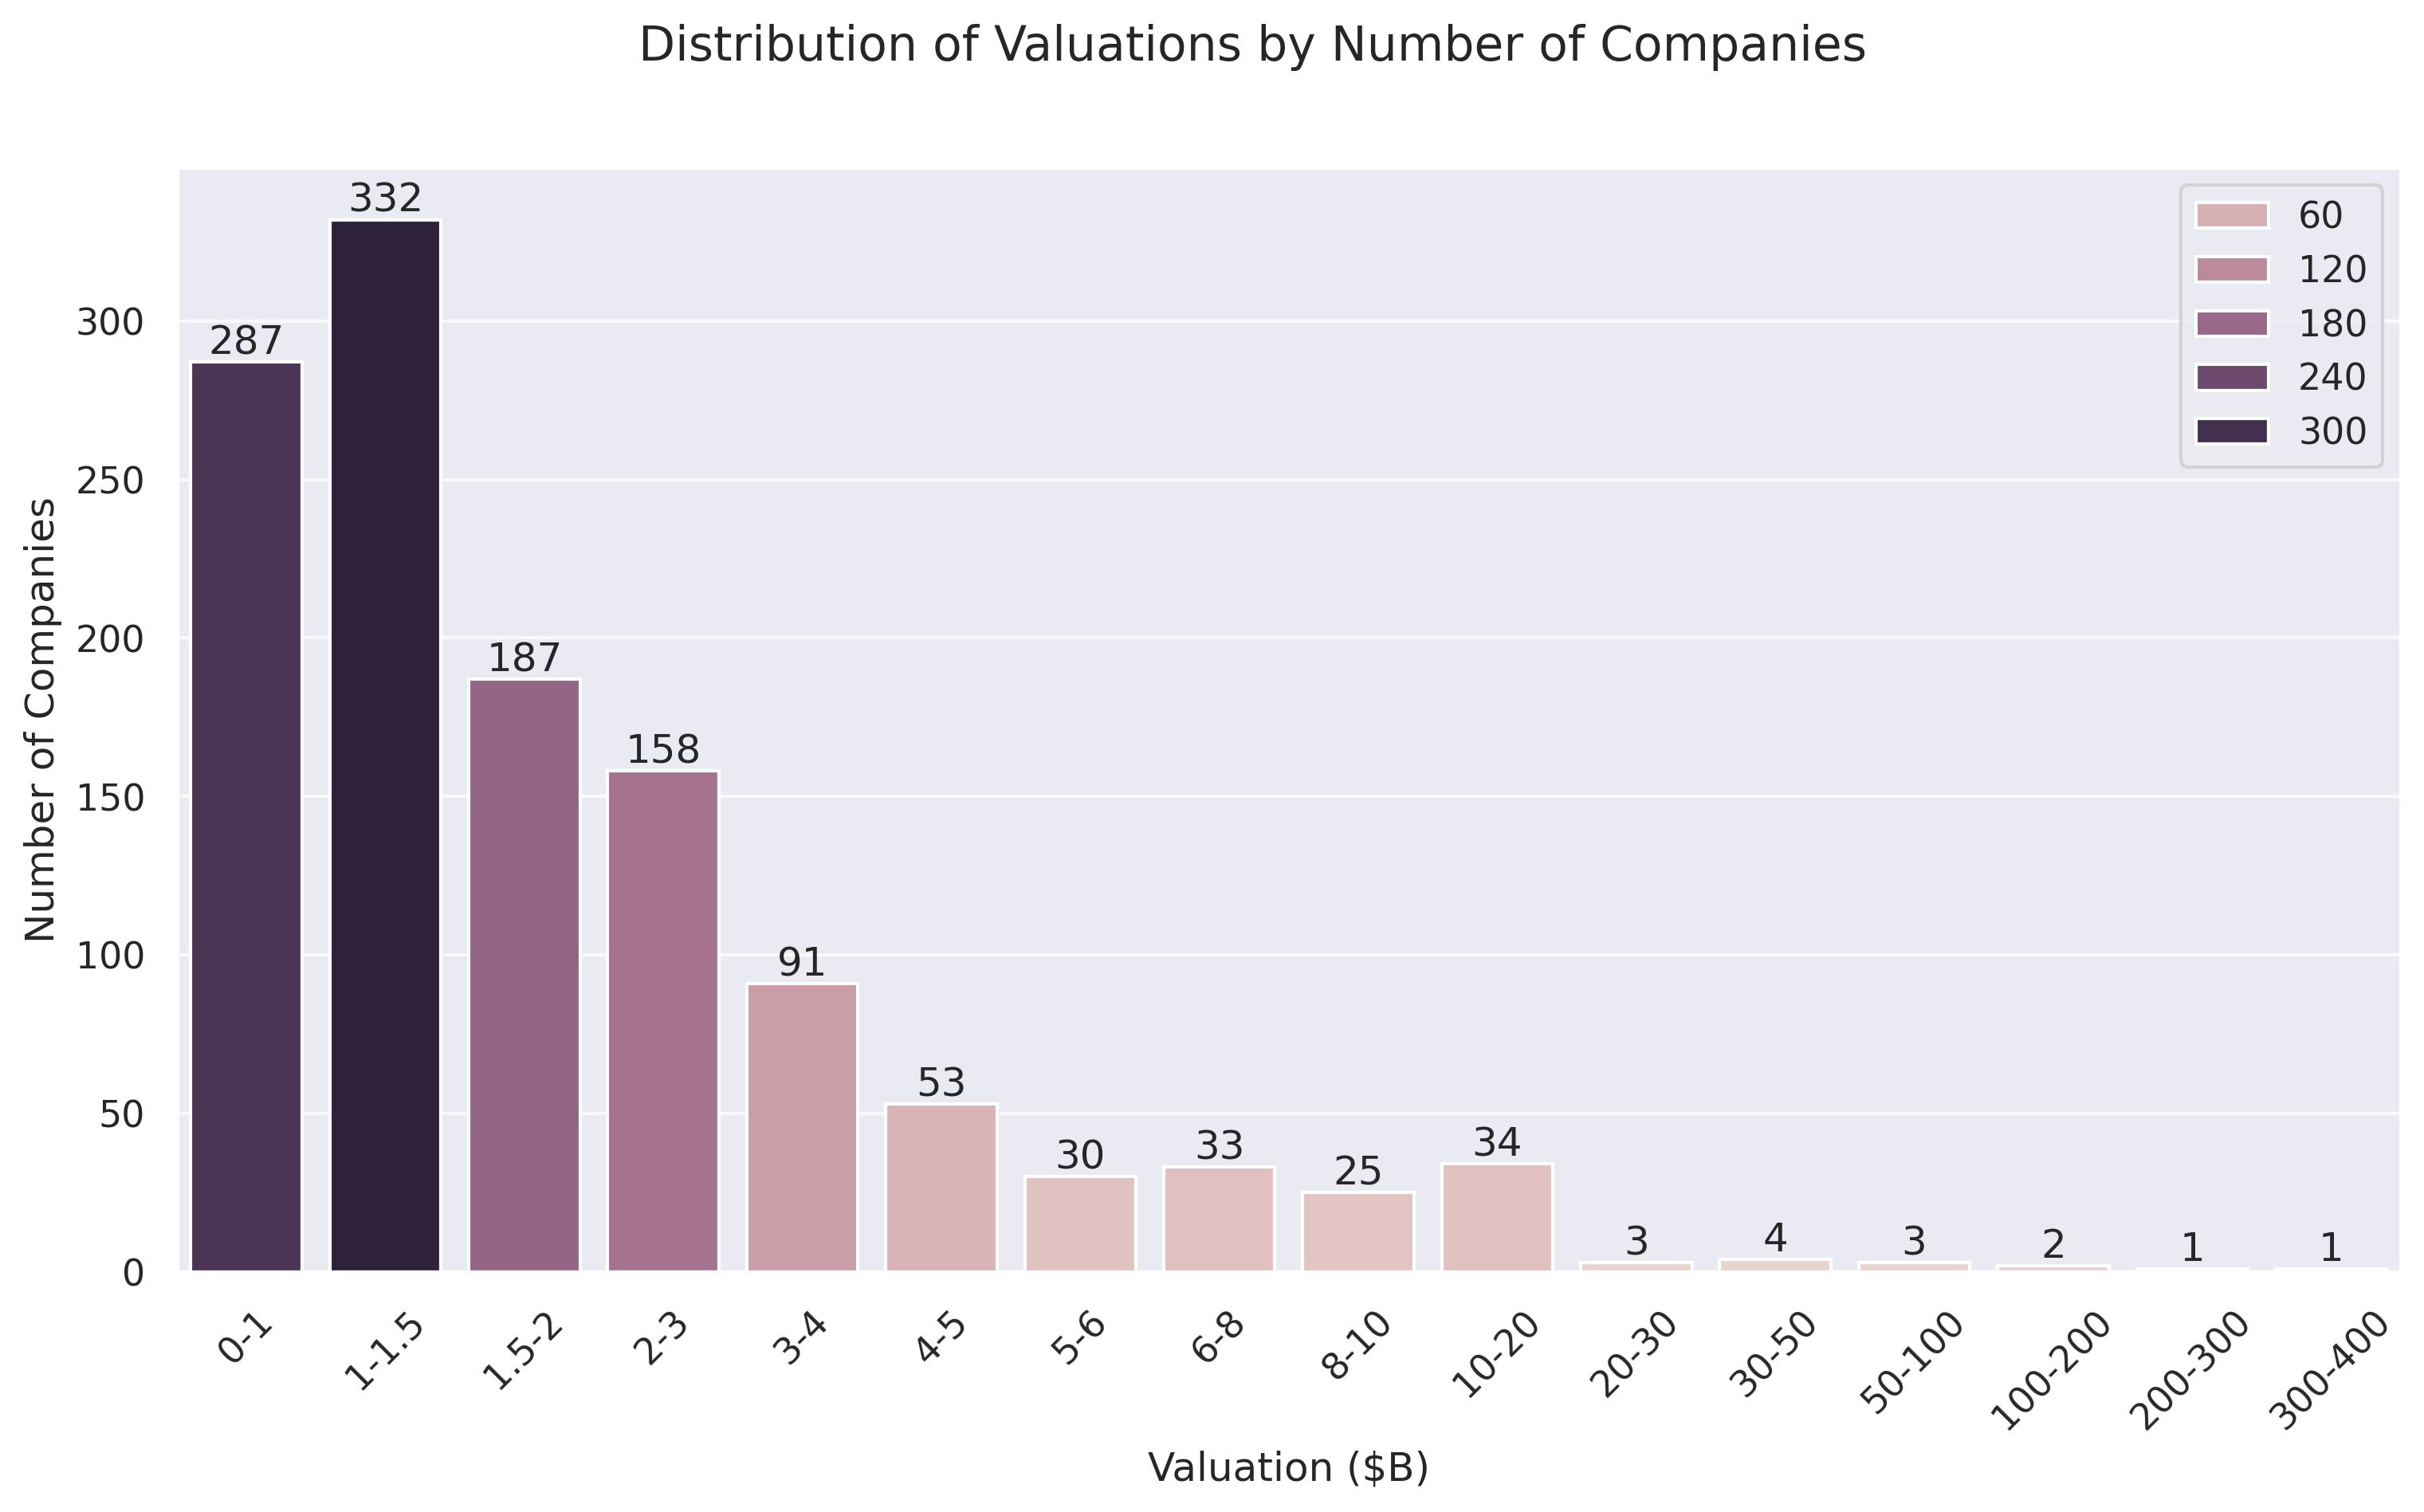

### Funding

#### Distribution of Funding across Different Industries

In [ ]:
# Group by industry and sum valuations
industry_funding_df = df.groupby('Industry')['Funding ($B)'].sum().reset_index().sort_values('Funding ($B)', ascending=False)
industry_funding_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Industry</th>
      <th>Funding ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Enterprise Tech</td>
      <td>254.609</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Financial Services</td>
      <td>128.215</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Industrials</td>
      <td>122.847</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Consumer &amp; Retail</td>
      <td>116.818</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Healthcare &amp; Life Sciences</td>
      <td>59.958</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Media &amp; Entertainment</td>
      <td>49.003</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Insurance</td>
      <td>13.096</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(industry_funding_df,
            y='Industry', x='Funding ($B)', hue='Industry')
plt.suptitle('Distribution of Funding across Different Industries')
plt.xlabel('Total Funding ($B)')
plt.ylabel('Industry')
plt.grid(axis='x', alpha=0.75)


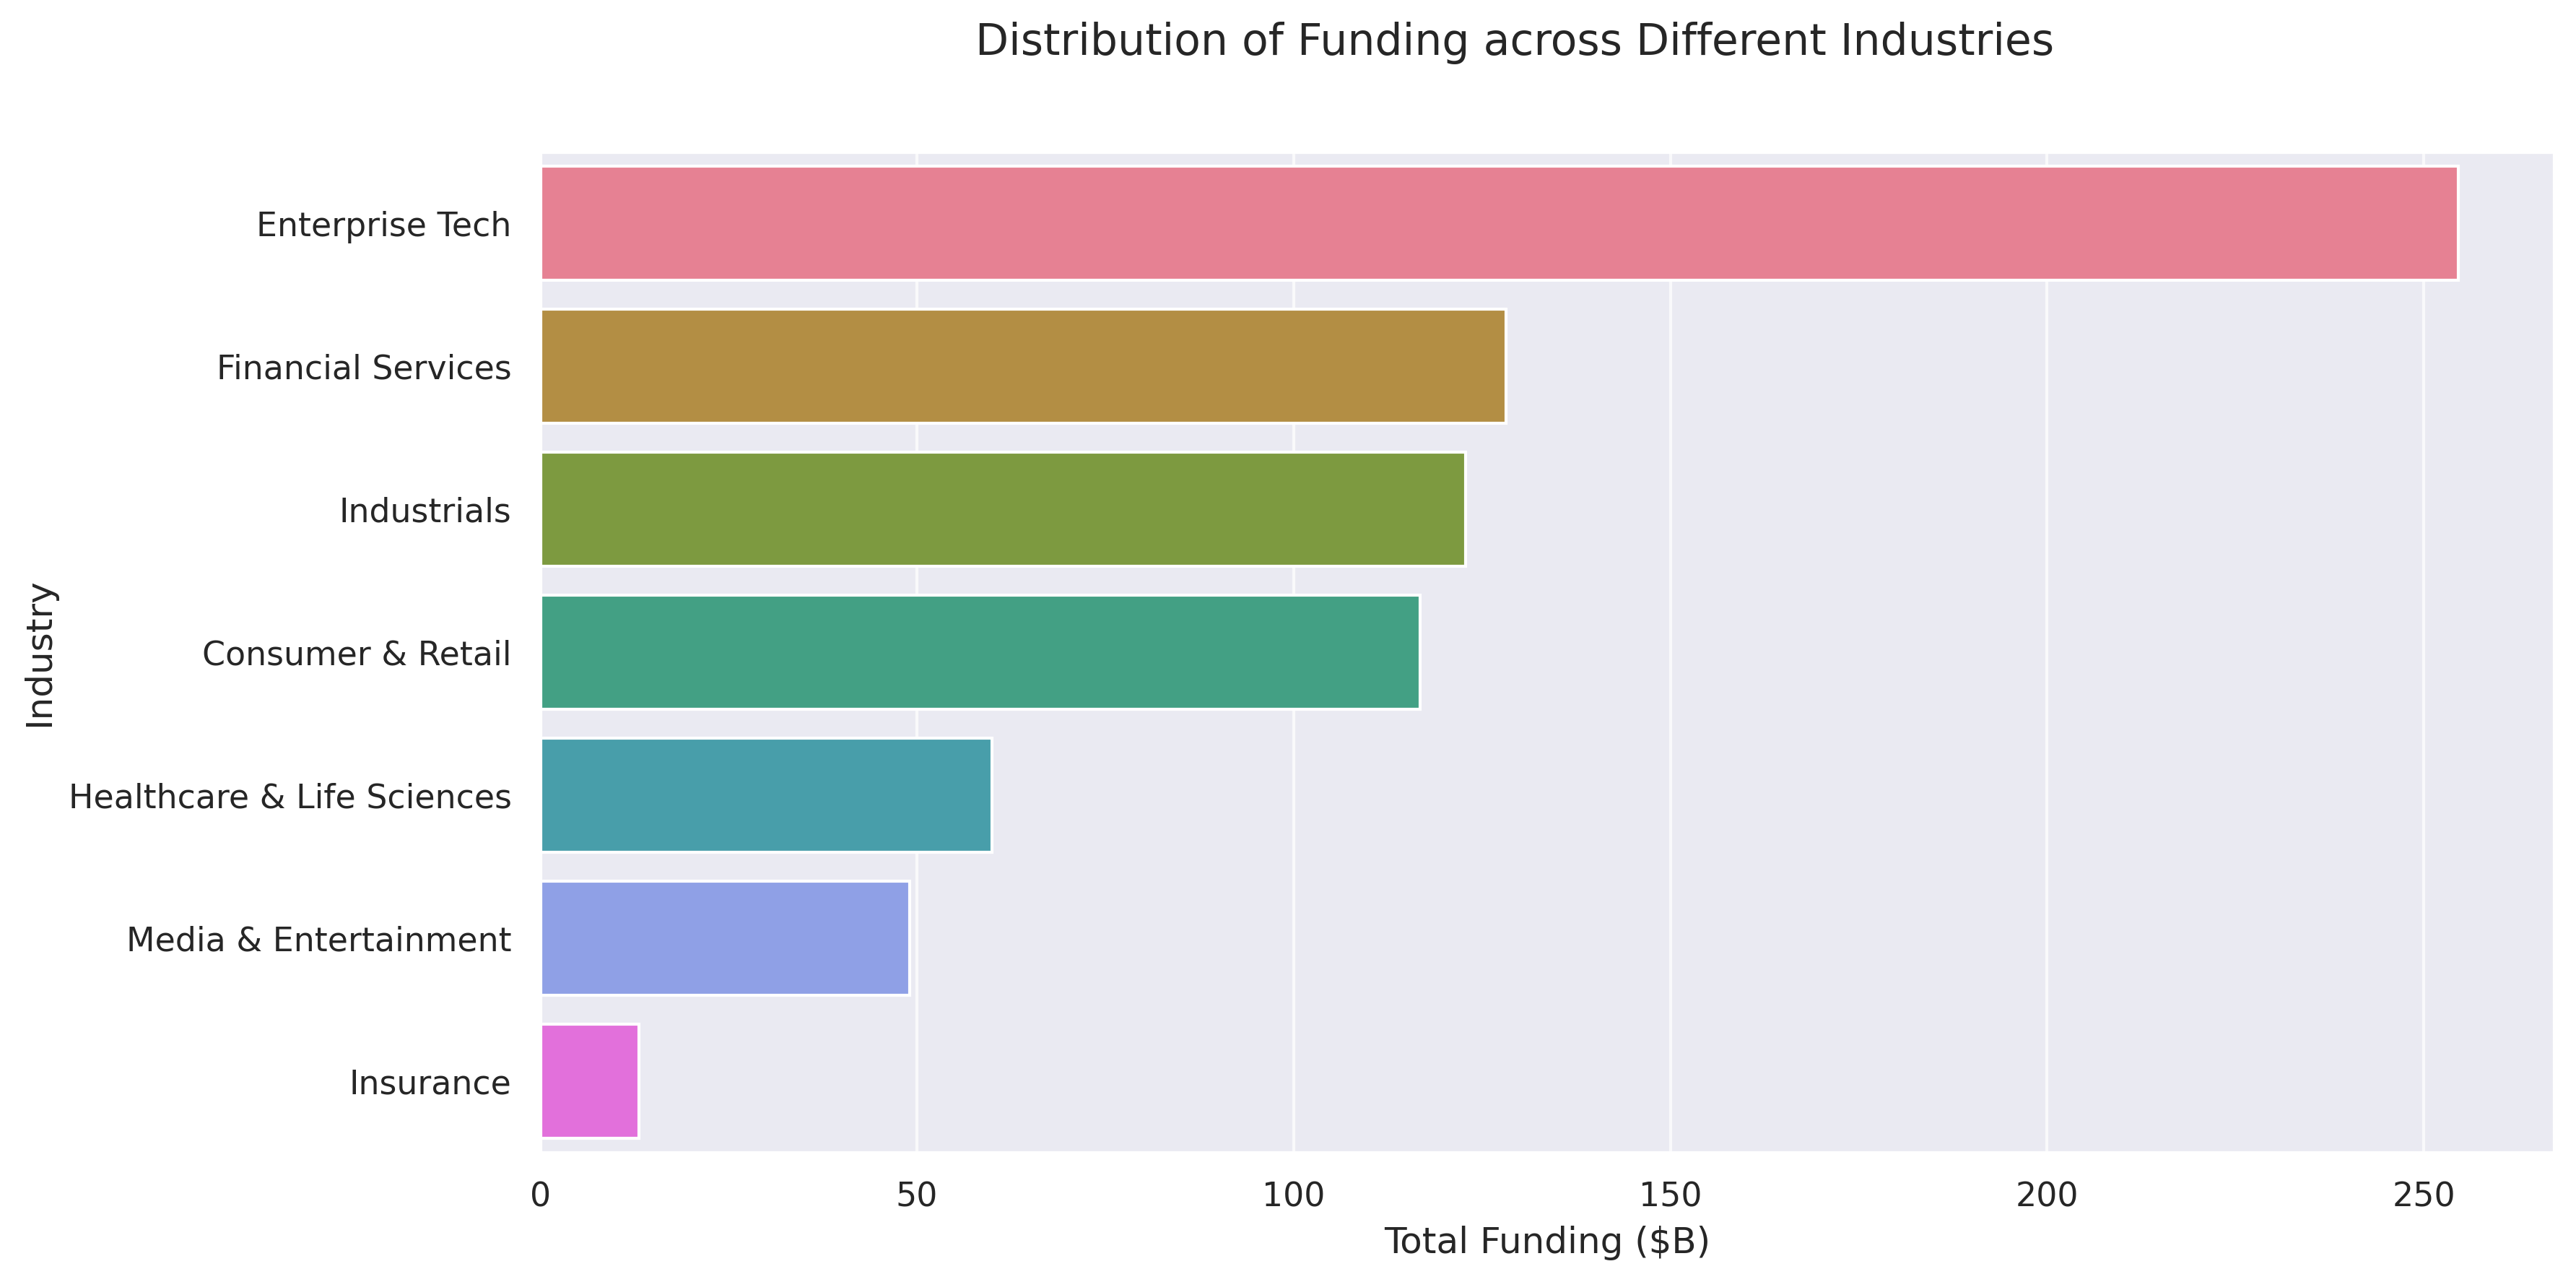

#### Mean Distribution of Funding across Different Industries

In [ ]:
industry_funding_df = df.groupby('Industry')['Total Equity Funding ($)'].mean().reset_index().sort_values('Total Equity Funding ($)', ascending=False)
industry_funding_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Industry</th>
      <th>Total Equity Funding ($)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4</th>
      <td>Industrials</td>
      <td>6.712951e+08</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Enterprise Tech</td>
      <td>6.286642e+08</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Consumer &amp; Retail</td>
      <td>5.783069e+08</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Media &amp; Entertainment</td>
      <td>5.765059e+08</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Financial Services</td>
      <td>5.673230e+08</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Insurance</td>
      <td>5.238400e+08</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Healthcare &amp; Life Sciences</td>
      <td>5.081186e+08</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(industry_funding_df,
            y='Industry',
            x='Total Equity Funding ($)',
            hue='Industry')
plt.title('Distribution of Funding across Different Industries')
plt.xlabel('Mean Funding ($)')
plt.ylabel('Industry')
plt.grid(axis='x', alpha=0.75)
plt.show()


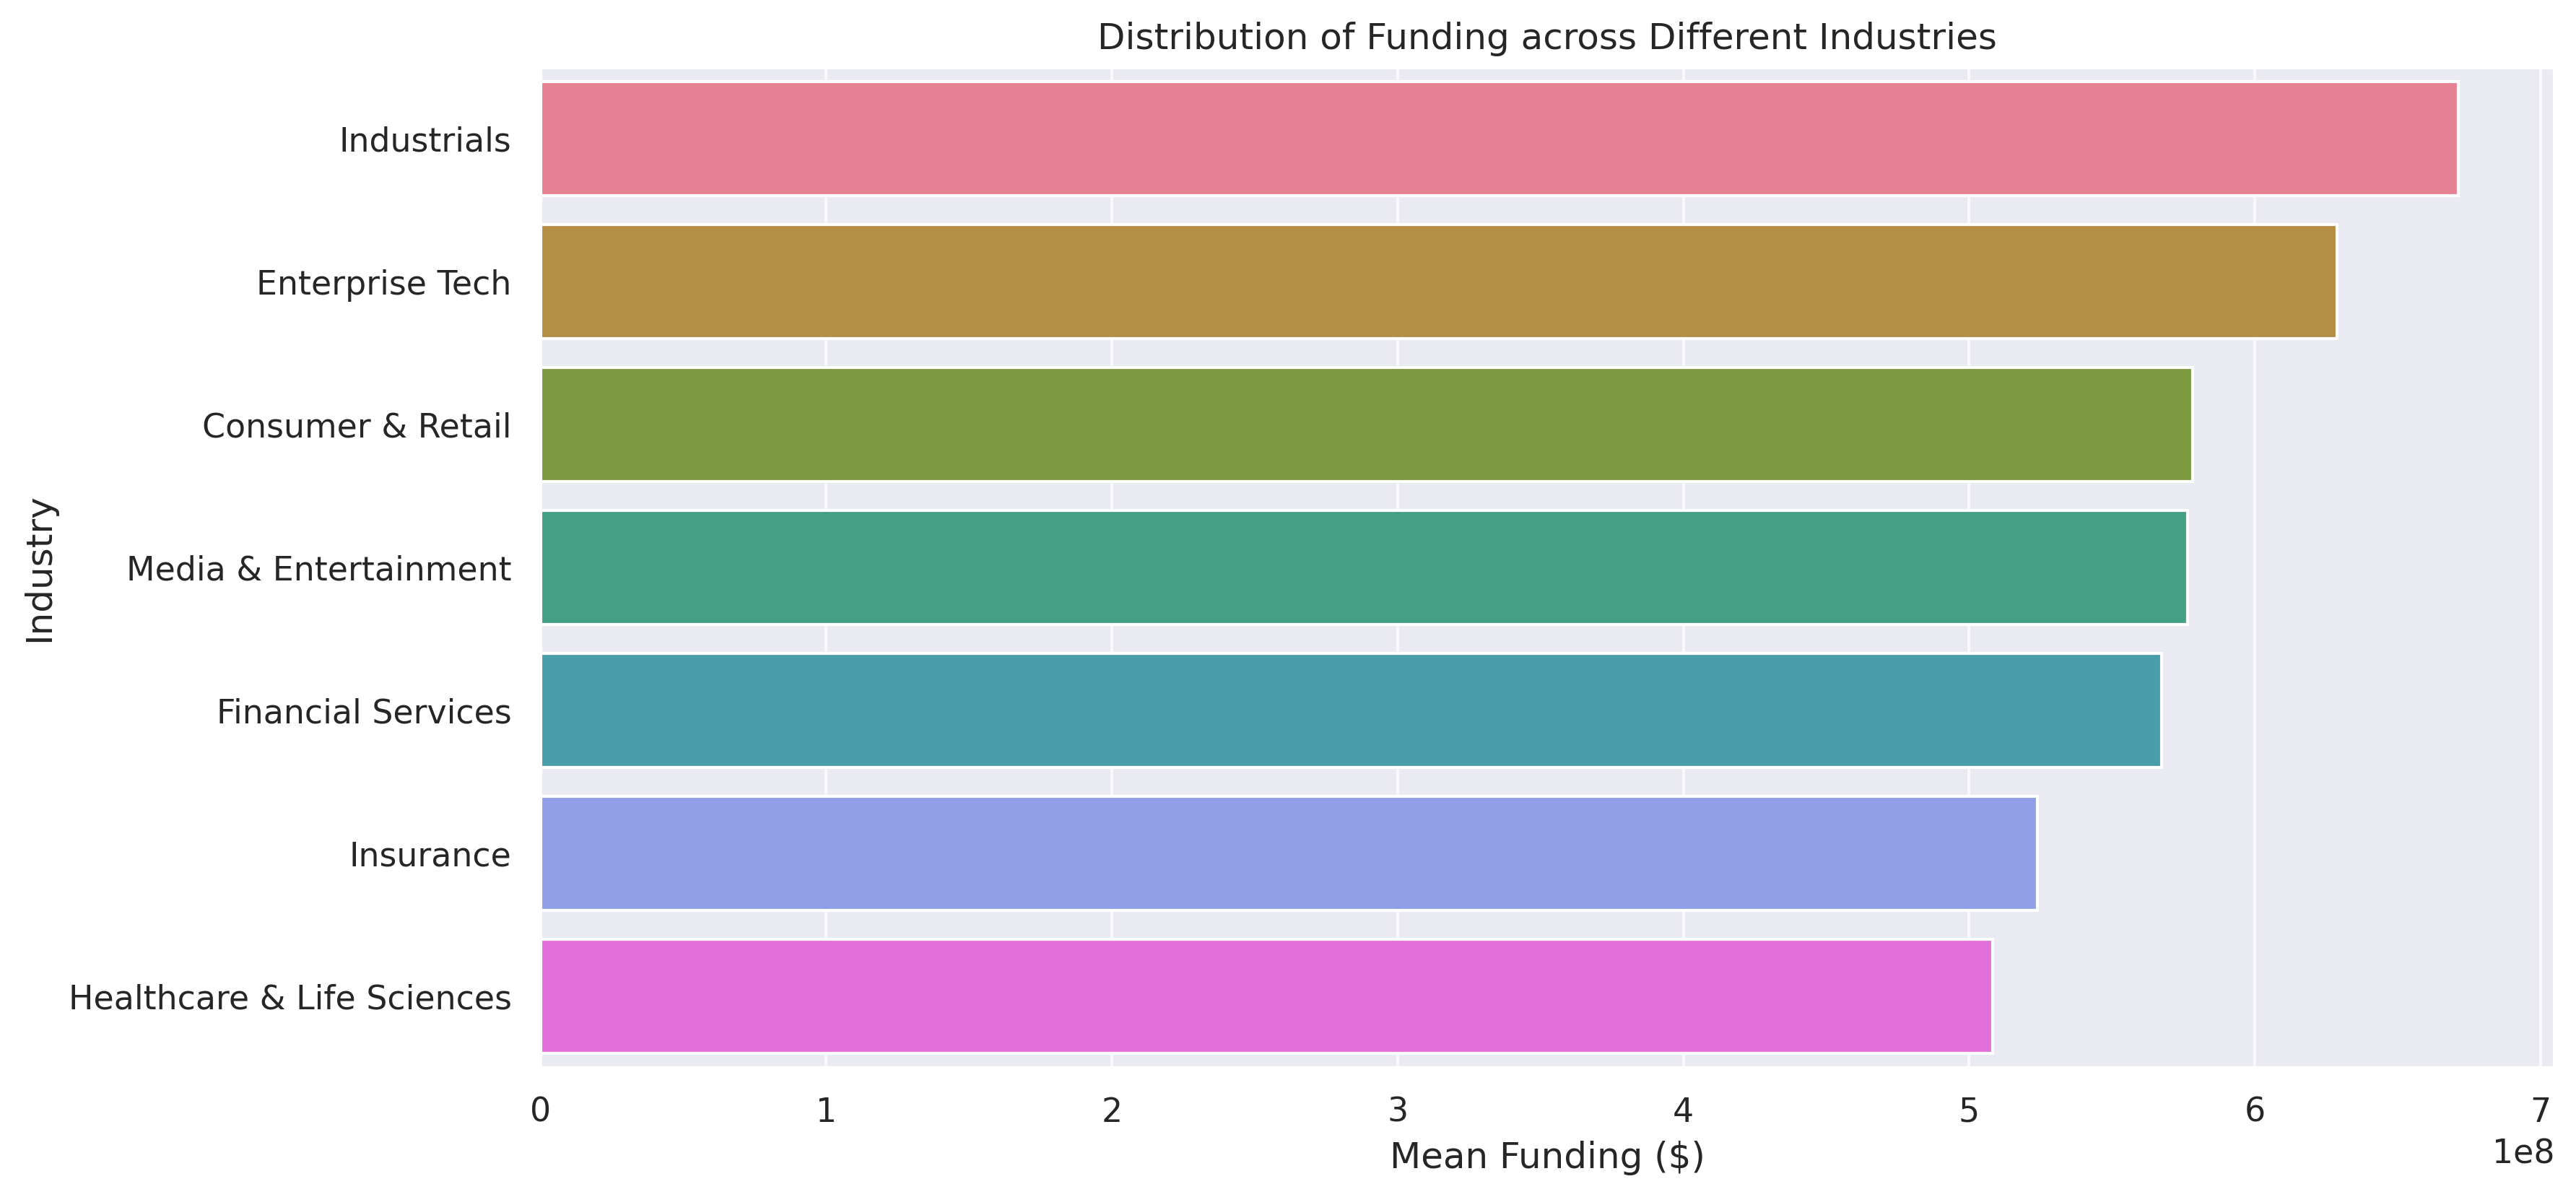

#### Distribution of Funding across Different Countries

In [ ]:
# Group by Country and sum valuations
country_funding_df = df.groupby('Country')['Total Equity Funding ($)'].sum().reset_index().sort_values('Total Equity Funding ($)', ascending=False).head(20)
country_funding_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>Total Equity Funding ($)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>53</th>
      <td>United States</td>
      <td>402858000000</td>
    </tr>
    <tr>
      <th>10</th>
      <td>China</td>
      <td>119010000000</td>
    </tr>
    <tr>
      <th>24</th>
      <td>India</td>
      <td>44207000000</td>
    </tr>
    <tr>
      <th>52</th>
      <td>United Kingdom</td>
      <td>34566000000</td>
    </tr>
    <tr>
      <th>21</th>
      <td>Germany</td>
      <td>23249000000</td>
    </tr>
    <tr>
      <th>20</th>
      <td>France</td>
      <td>15458000000</td>
    </tr>
    <tr>
      <th>43</th>
      <td>Singapore</td>
      <td>11893000000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Brazil</td>
      <td>10591000000</td>
    </tr>
    <tr>
      <th>47</th>
      <td>Sweden</td>
      <td>10433000000</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Canada</td>
      <td>9817000000</td>
    </tr>
    <tr>
      <th>27</th>
      <td>Israel</td>
      <td>8695000426</td>
    </tr>
    <tr>
      <th>45</th>
      <td>South Korea</td>
      <td>4607000000</td>
    </tr>
    <tr>
      <th>35</th>
      <td>Mexico</td>
      <td>4268000000</td>
    </tr>
    <tr>
      <th>25</th>
      <td>Indonesia</td>
      <td>3617000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Australia</td>
      <td>3475000000</td>
    </tr>
    <tr>
      <th>36</th>
      <td>Netherlands</td>
      <td>2865000000</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Colombia</td>
      <td>2659000000</td>
    </tr>
    <tr>
      <th>23</th>
      <td>Hong Kong</td>
      <td>2399000000</td>
    </tr>
    <tr>
      <th>29</th>
      <td>Japan</td>
      <td>2347000000</td>
    </tr>
    <tr>
      <th>46</th>
      <td>Spain</td>
      <td>2212000000</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(country_funding_df, y='Country', x='Total Equity Funding ($)', hue='Country')
plt.suptitle('Distribution of Funding across Different Countries')
plt.xlabel('Total Equity Funding ($)')
plt.ylabel('Countries')
plt.grid(axis='x', alpha=0.75)
plt.xscale('log')
plt.show()


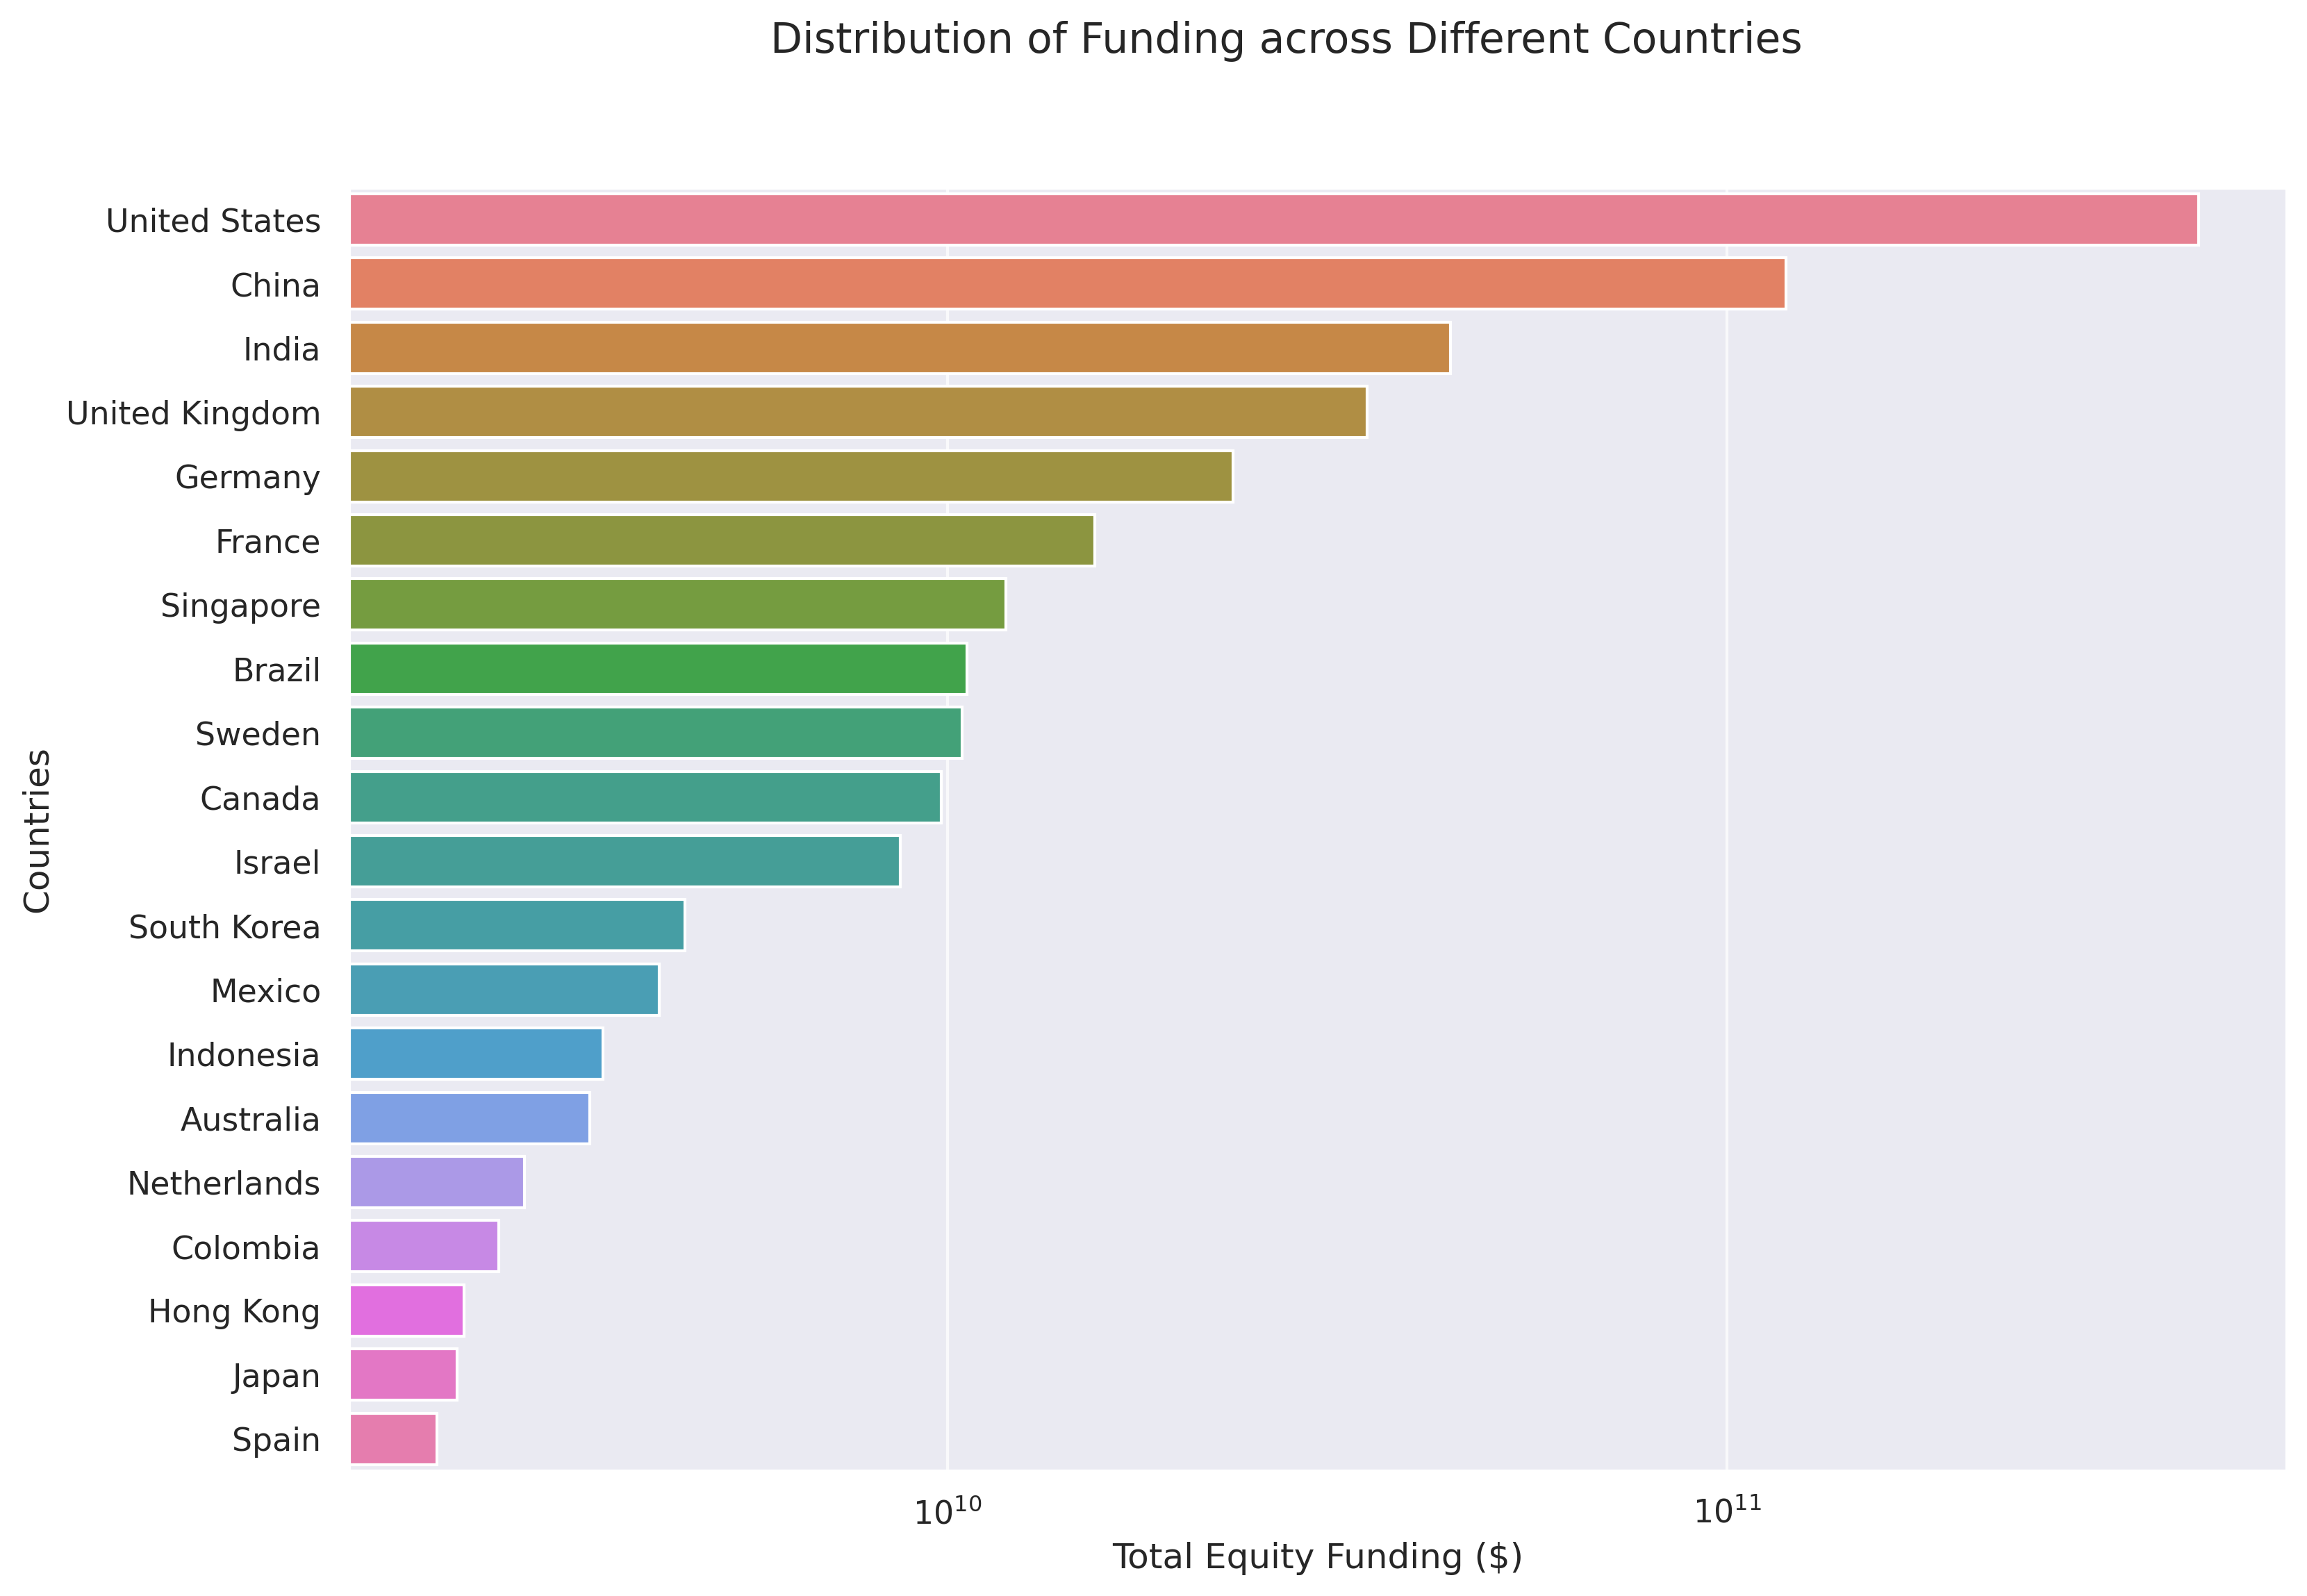

#### Mean Distribution of Funding across Different Countries

In [ ]:
# Group by Country and sum valuations
mean_country_funding_df = df[df['Country'].isin(country_funding_df['Country'])].groupby('Country')['Total Equity Funding ($)'].mean().reset_index().sort_values('Total Equity Funding ($)', ascending=False).head(20)
mean_country_funding_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Country</th>
      <th>Total Equity Funding ($)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>17</th>
      <td>Sweden</td>
      <td>1.738833e+09</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Colombia</td>
      <td>8.863333e+08</td>
    </tr>
    <tr>
      <th>3</th>
      <td>China</td>
      <td>7.778431e+08</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Germany</td>
      <td>7.499677e+08</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Singapore</td>
      <td>7.433125e+08</td>
    </tr>
    <tr>
      <th>8</th>
      <td>India</td>
      <td>6.501029e+08</td>
    </tr>
    <tr>
      <th>18</th>
      <td>United Kingdom</td>
      <td>6.284727e+08</td>
    </tr>
    <tr>
      <th>19</th>
      <td>United States</td>
      <td>5.889737e+08</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Brazil</td>
      <td>5.883889e+08</td>
    </tr>
    <tr>
      <th>5</th>
      <td>France</td>
      <td>5.520714e+08</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Mexico</td>
      <td>5.335000e+08</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Indonesia</td>
      <td>5.167143e+08</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Canada</td>
      <td>4.674762e+08</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Spain</td>
      <td>4.424000e+08</td>
    </tr>
    <tr>
      <th>0</th>
      <td>Australia</td>
      <td>3.861111e+08</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Israel</td>
      <td>3.780435e+08</td>
    </tr>
    <tr>
      <th>15</th>
      <td>South Korea</td>
      <td>3.543846e+08</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Hong Kong</td>
      <td>3.427143e+08</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Netherlands</td>
      <td>3.183333e+08</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Japan</td>
      <td>2.933750e+08</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(mean_country_funding_df,
            y='Country',
            x='Total Equity Funding ($)',
            hue='Country')
plt.suptitle('Mean Distribution of Funding across Different Countries')
plt.xlabel('Mean Funding ($)')
plt.ylabel('Countries')
plt.grid(axis='x', alpha=0.75)
plt.show()


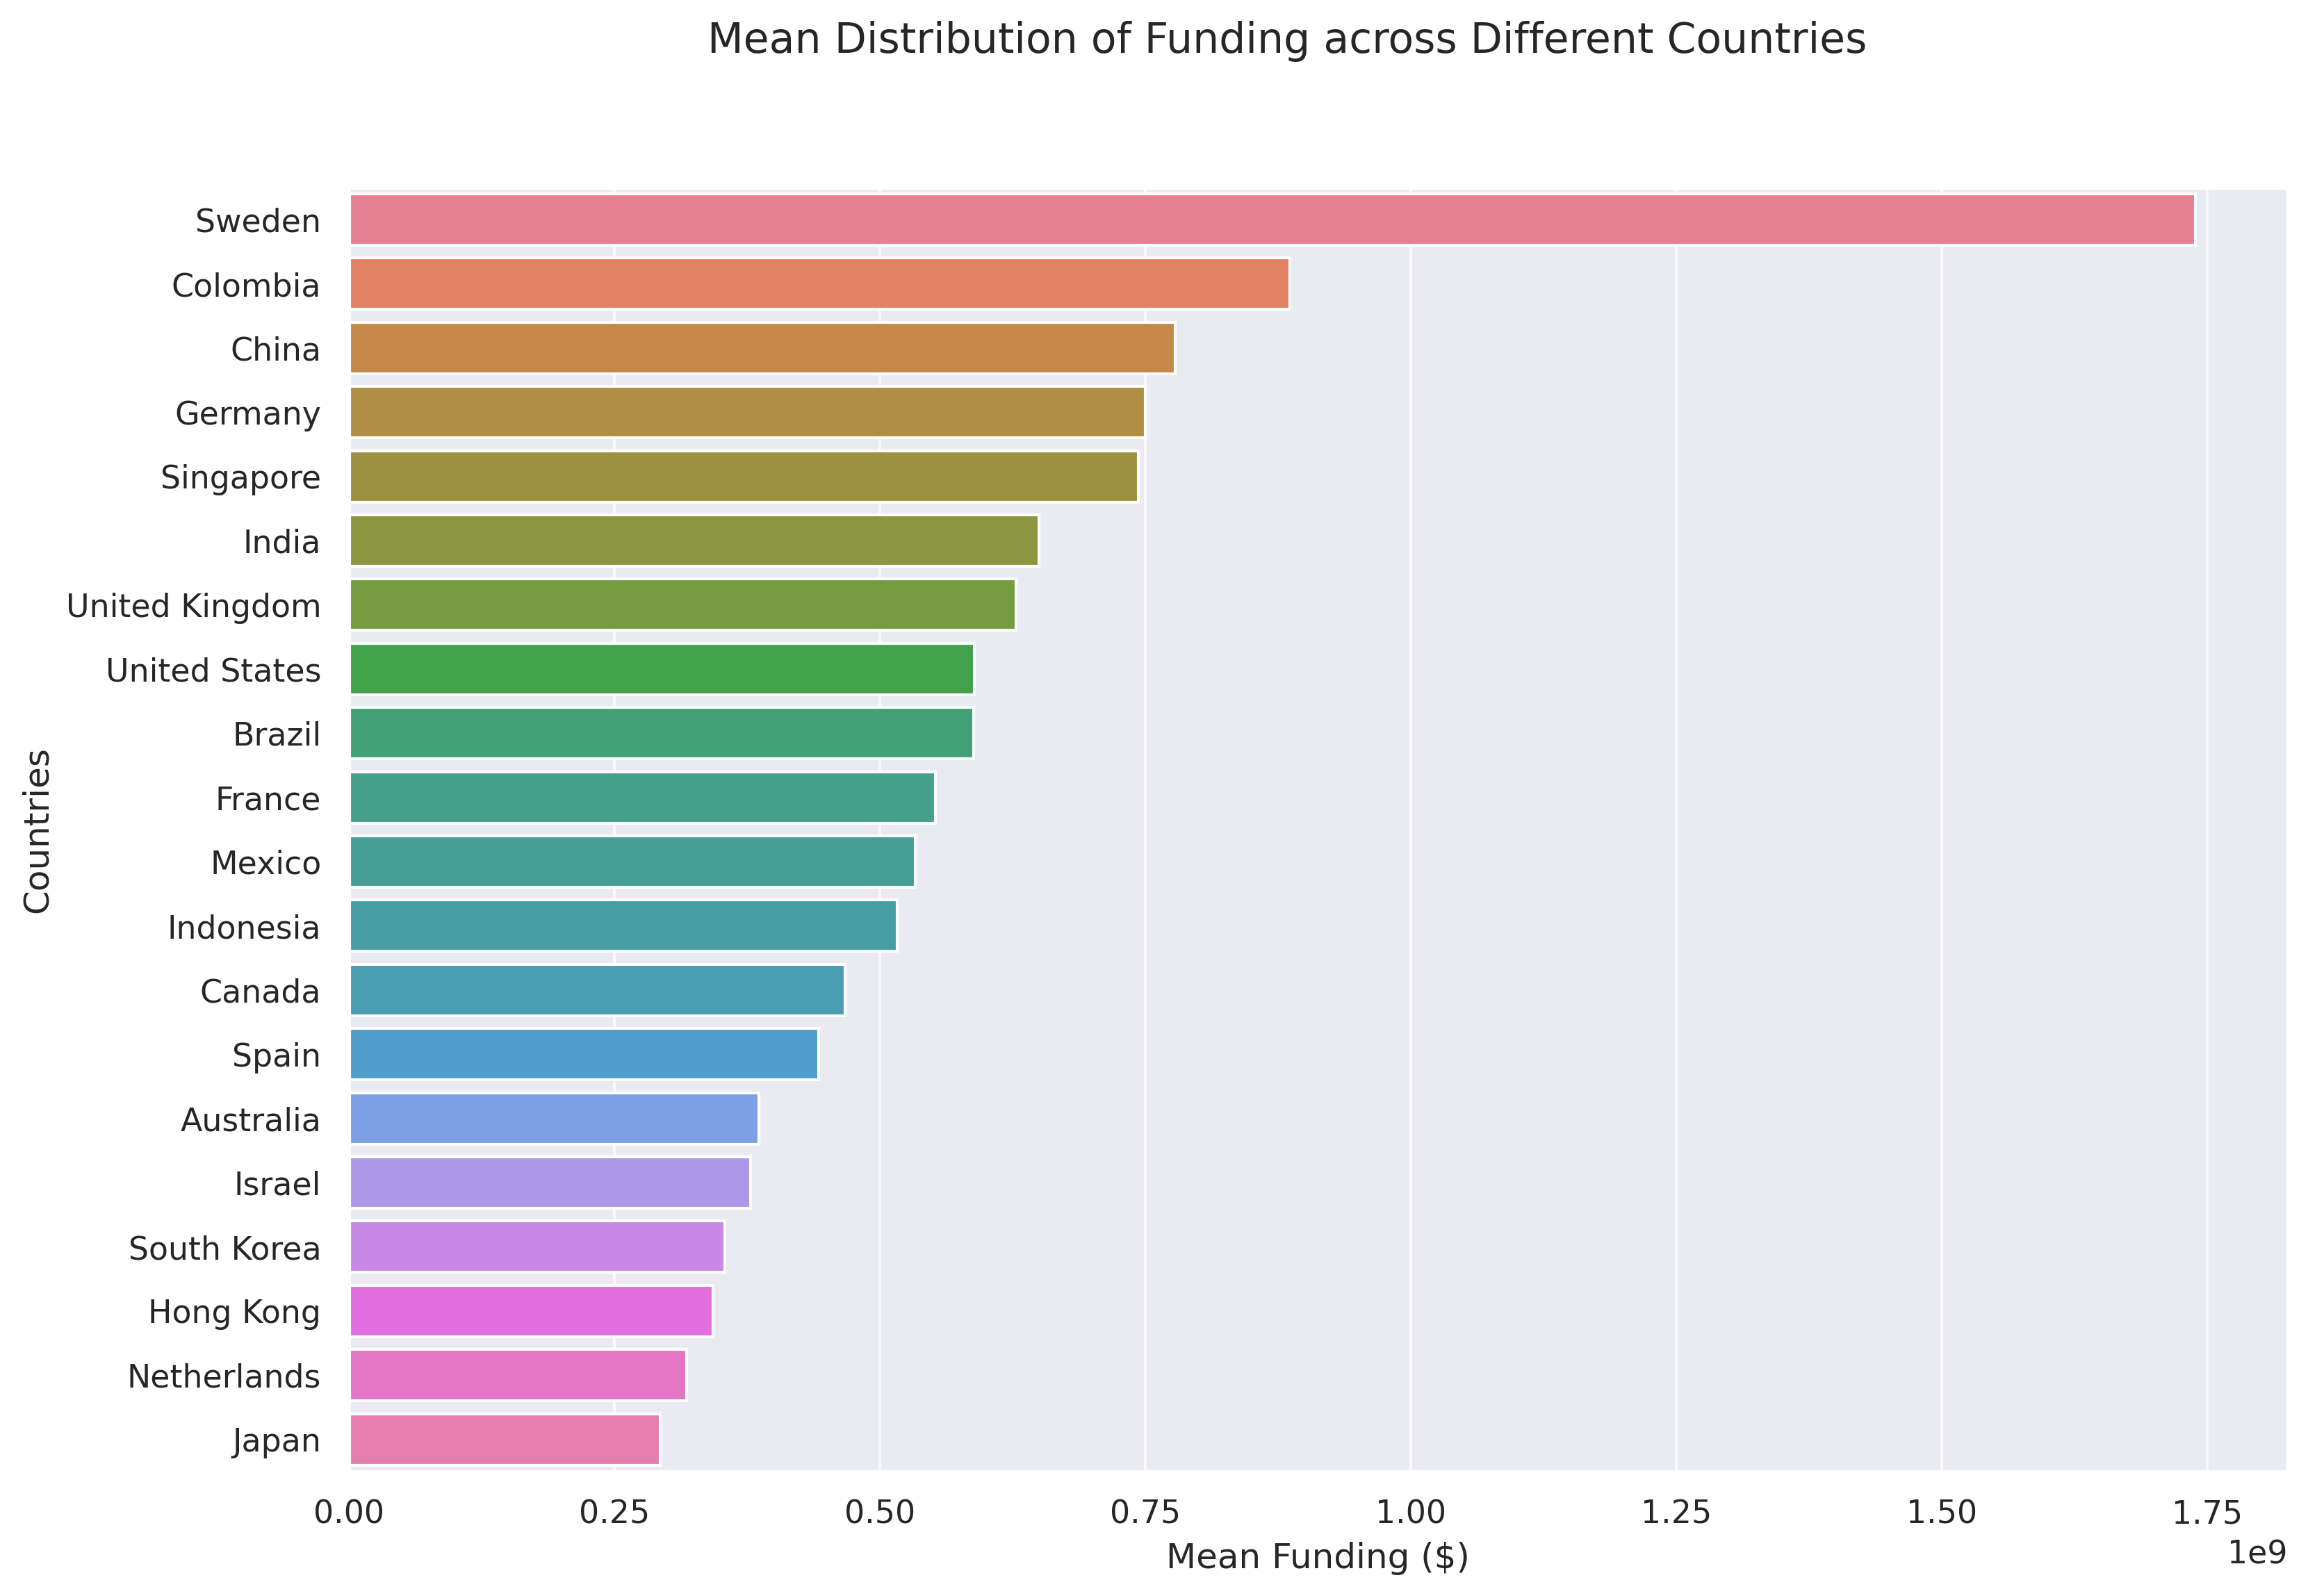

#### Distribution of Funding by Number of Companies

In [ ]:
# Define the bins for funding ranges
bins = [0, 0.2, 0.3, 0.5, 0.8, 1, 2, 4, 6, 8, 10, 12, 15, 20]
labels =  [f'{a}-{b}' for a, b in zip(bins[:-1], bins[1:])]
cuts = pd.cut(df['Funding ($B)'], bins=bins, labels=labels)

# Count the number of companies in each bin
funding_distribution = cuts.value_counts().sort_index()

# Plot the Bar Chart
plt.figure(figsize=(12, 6), dpi=300)
ax = sns.barplot(x=funding_distribution.index,
                 y=funding_distribution.values, hue=funding_distribution.values)
for i in ax.containers:
    ax.bar_label(i)
plt.suptitle('Distribution of Funding by Number of Companies')
plt.xlabel('Funding ($B)')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.yscale('log')
plt.show()


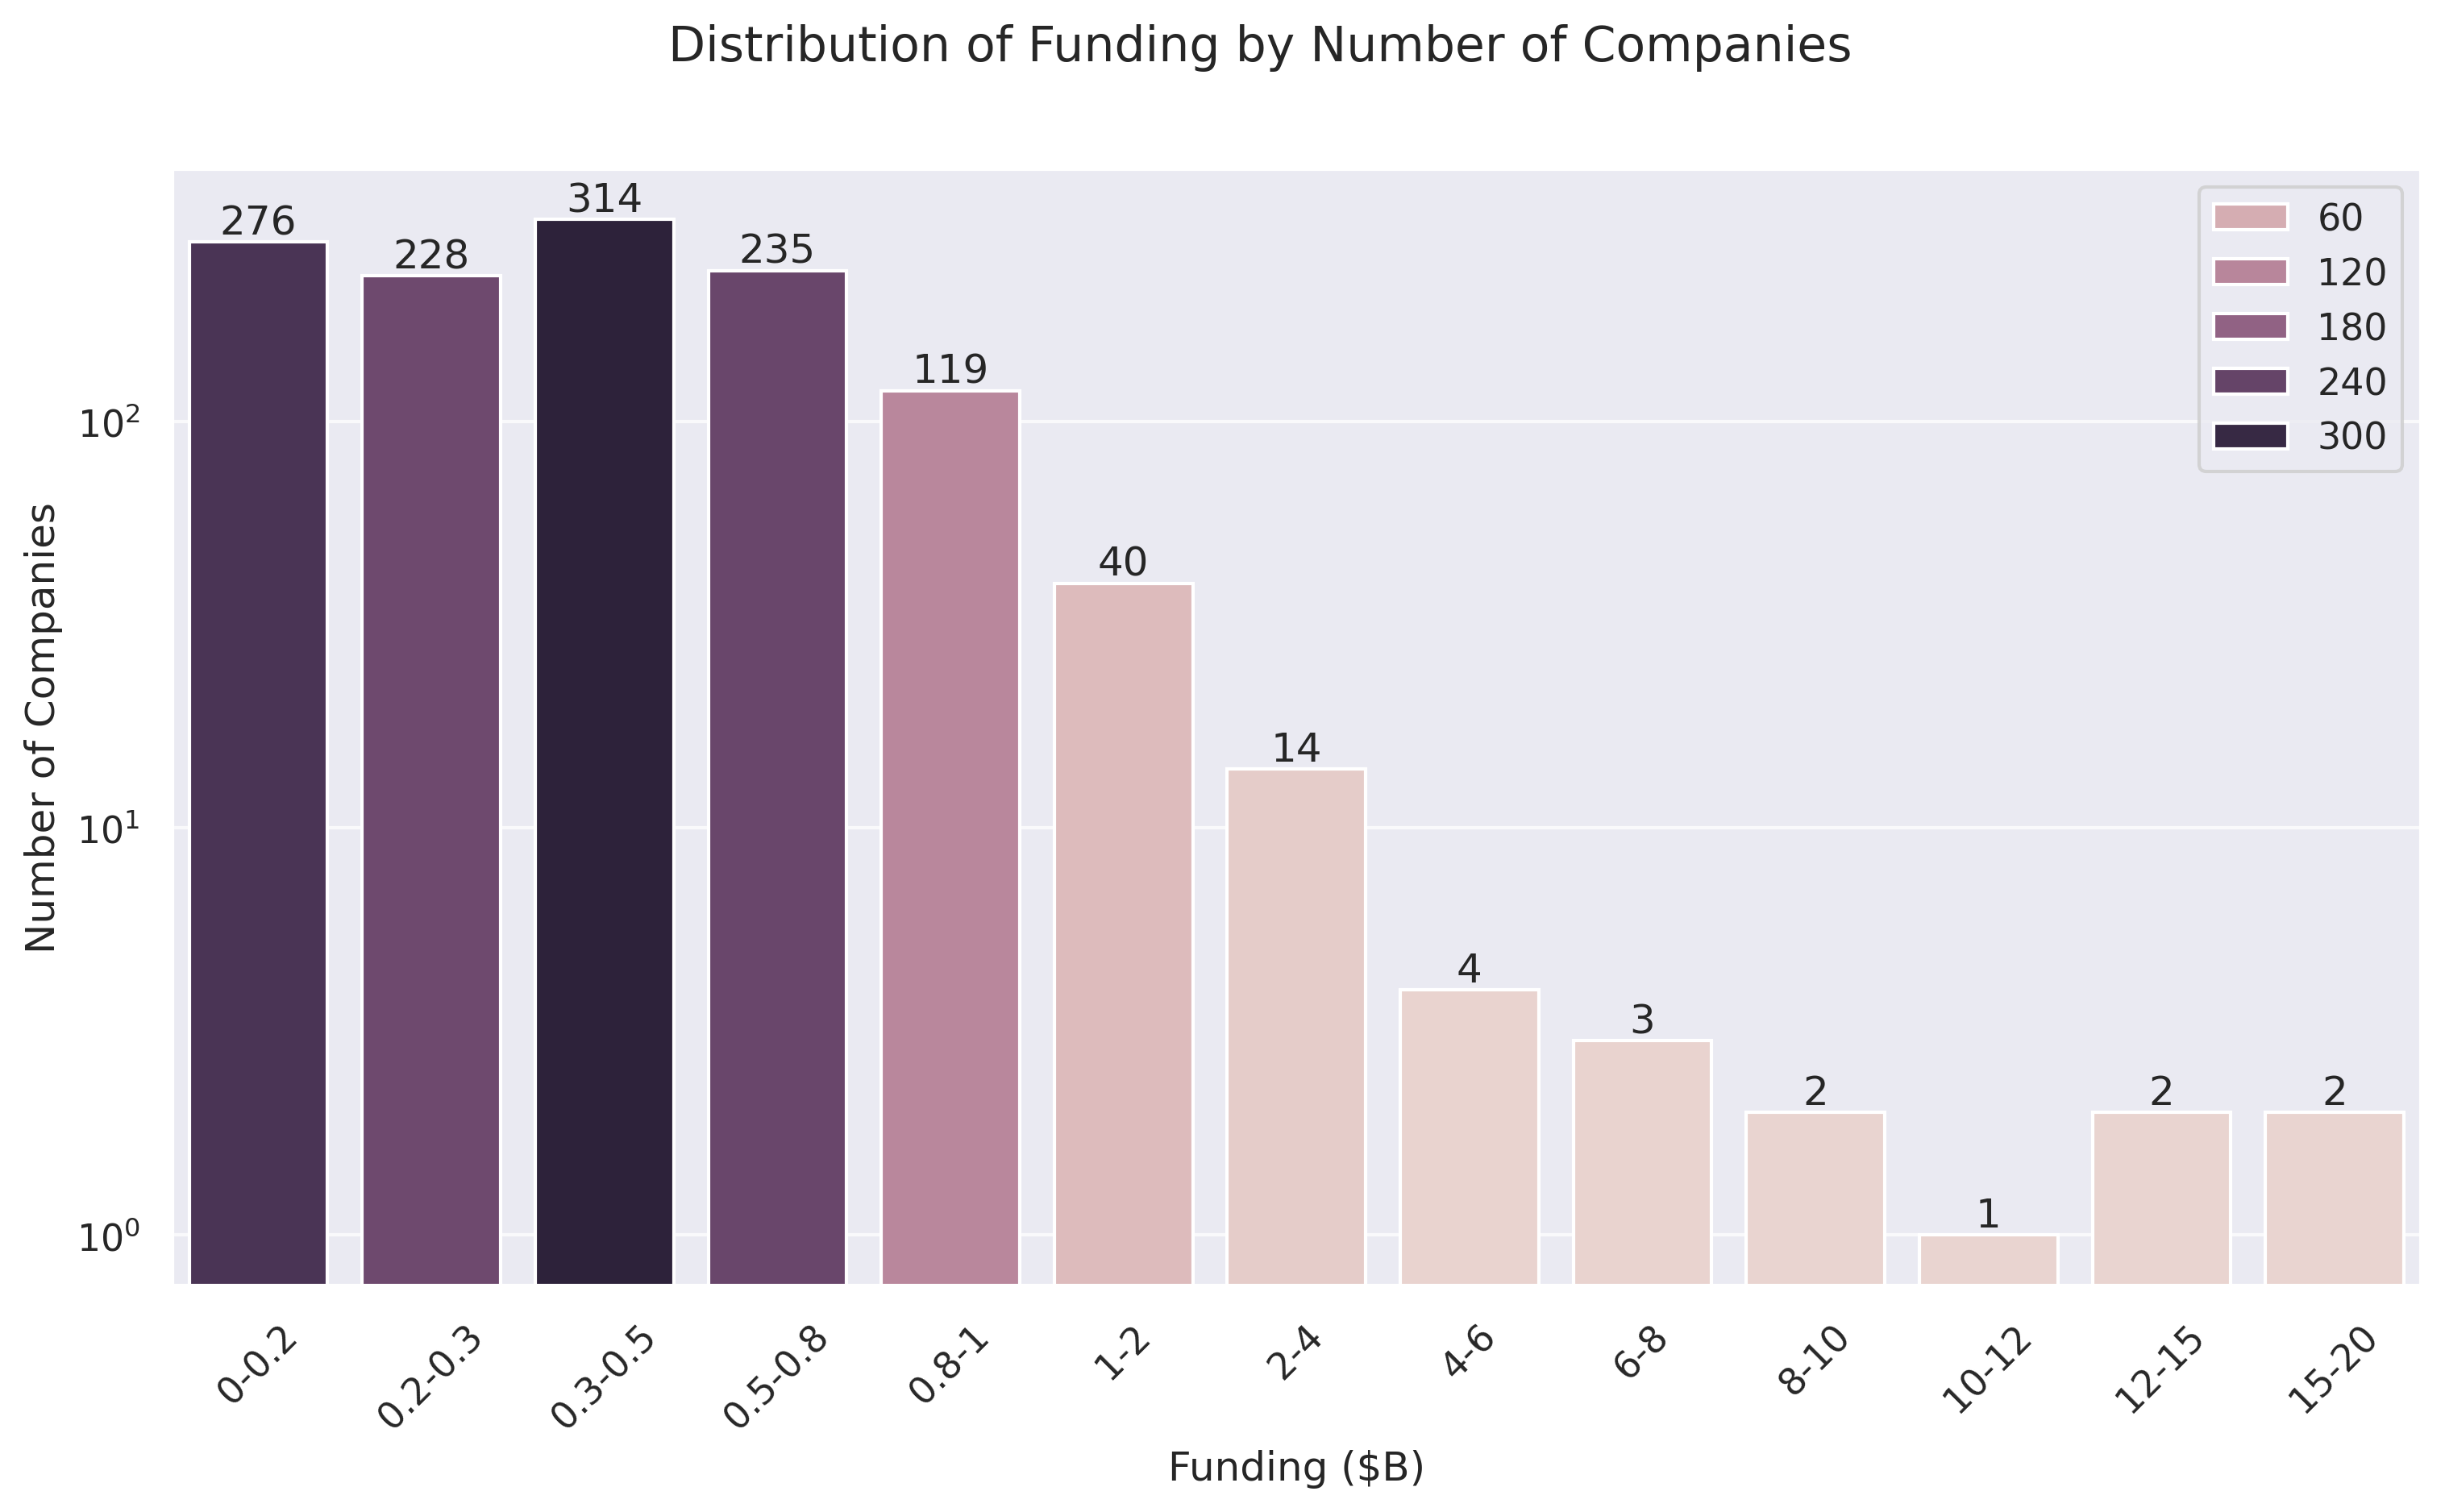

# Comparative Analysis

## By Company

### Top Companies by Valuation

In [ ]:
top_companies = df.sort_values(by='Latest Valuation ($B)', ascending=False).head(20)
top_companies


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Unicorn Year</th>
      <th>Funding ($B)</th>
      <th>Latest Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.00</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>2012</td>
      <td>9.000</td>
      <td>350.00</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.00</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>2017</td>
      <td>8.000</td>
      <td>315.00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.00</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>2019</td>
      <td>18.000</td>
      <td>300.00</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.00</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>2017</td>
      <td>19.000</td>
      <td>150.00</td>
    </tr>
    <tr>
      <th>7</th>
      <td>xAI</td>
      <td>50.00</td>
      <td>12000000000</td>
      <td>2024-05-26</td>
      <td>2006</td>
      <td>18y4m</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>Burlingame</td>
      <td>Prysm Capital, Baillie Gifford &amp; Co., TDM Grow...</td>
      <td>2024</td>
      <td>12.000</td>
      <td>113.00</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.00</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>2014</td>
      <td>9.000</td>
      <td>91.50</td>
    </tr>
    <tr>
      <th>5</th>
      <td>SHEIN</td>
      <td>66.00</td>
      <td>4000000000</td>
      <td>2018-07-03</td>
      <td>2008</td>
      <td>10y6m</td>
      <td>Financial Services</td>
      <td>Singapore</td>
      <td>Singapore</td>
      <td>369 Growth Partners, GTM Capital, Berkeley Hil...</td>
      <td>2018</td>
      <td>4.000</td>
      <td>66.00</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Databricks</td>
      <td>62.00</td>
      <td>14000000000</td>
      <td>2019-02-05</td>
      <td>2013</td>
      <td>6y1m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Holtzbrinck Ventures, Unternehmertum Venture C...</td>
      <td>2019</td>
      <td>14.000</td>
      <td>62.00</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Anthropic</td>
      <td>16.05</td>
      <td>8000000000</td>
      <td>2023-02-03</td>
      <td>2021</td>
      <td>2y2m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>New Enterprise Associates, Institutional Ventu...</td>
      <td>2023</td>
      <td>8.000</td>
      <td>61.50</td>
    </tr>
    <tr>
      <th>150</th>
      <td>Safe Superintelligence</td>
      <td>5.00</td>
      <td>1000000000</td>
      <td>2024-09-04</td>
      <td>1995</td>
      <td>29y8m</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>General Catalyst, Inspired Capital, Flybridge ...</td>
      <td>2024</td>
      <td>1.000</td>
      <td>32.00</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Canva</td>
      <td>32.00</td>
      <td>580000000</td>
      <td>2018-01-08</td>
      <td>2012</td>
      <td>6y</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>Australia</td>
      <td>Surry Hills</td>
      <td>Index Ventures, Temasek, Portag3 Ventures</td>
      <td>2018</td>
      <td>0.580</td>
      <td>32.00</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Epic Games</td>
      <td>22.50</td>
      <td>8000000000</td>
      <td>2018-10-26</td>
      <td>1991</td>
      <td>27y9m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Cary</td>
      <td>Warburg Pincus, The Rise Fund, HarbourVest Par...</td>
      <td>2018</td>
      <td>8.000</td>
      <td>31.50</td>
    </tr>
    <tr>
      <th>26</th>
      <td>Scale AI</td>
      <td>13.80</td>
      <td>2000000000</td>
      <td>2019-08-05</td>
      <td>2016</td>
      <td>3y7m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Accel,Y Combinator, Index Ventures, Founders Fund</td>
      <td>2019</td>
      <td>2.000</td>
      <td>29.00</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Fanatics</td>
      <td>31.00</td>
      <td>5000000000</td>
      <td>2012-06-06</td>
      <td>2011</td>
      <td>1y5m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Jacksonville</td>
      <td>Liberty City Ventures, RRE Ventures, Mithril C...</td>
      <td>2012</td>
      <td>5.000</td>
      <td>27.00</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Chime</td>
      <td>25.00</td>
      <td>2000000000</td>
      <td>2019-03-05</td>
      <td>2012</td>
      <td>7y2m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Blackstone, ICONIQ Growth, General Atlantic</td>
      <td>2019</td>
      <td>2.000</td>
      <td>25.00</td>
    </tr>
    <tr>
      <th>12</th>
      <td>CoreWeave</td>
      <td>23.00</td>
      <td>2000000000</td>
      <td>2023-04-20</td>
      <td>2019</td>
      <td>4y3m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>United States</td>
      <td>Roseland</td>
      <td>The Column Group, Foresite Capital, Foresite C...</td>
      <td>2023</td>
      <td>2.000</td>
      <td>23.00</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Revolut</td>
      <td>45.00</td>
      <td>2000000000</td>
      <td>2018-04-26</td>
      <td>2015</td>
      <td>3y3m</td>
      <td>Insurance</td>
      <td>United Kingdom</td>
      <td>London</td>
      <td>CMFG Ventures, Accomplice, Moderne Ventures</td>
      <td>2018</td>
      <td>2.000</td>
      <td>17.75</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Miro</td>
      <td>17.50</td>
      <td>476000000</td>
      <td>2022-01-05</td>
      <td>2012</td>
      <td>1y0m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, China Life Investment H...</td>
      <td>2022</td>
      <td>0.476</td>
      <td>17.50</td>
    </tr>
    <tr>
      <th>1119</th>
      <td>Nature's Fynd</td>
      <td>1.00</td>
      <td>463000000</td>
      <td>2021-07-19</td>
      <td>2009</td>
      <td>12y6m</td>
      <td>Media &amp; Entertainment</td>
      <td>United States</td>
      <td>Chicago</td>
      <td>Lightspeed Venture Partners, Access Industries...</td>
      <td>2021</td>
      <td>0.463</td>
      <td>17.00</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Yuanfudao</td>
      <td>15.50</td>
      <td>4000000000</td>
      <td>2017-05-31</td>
      <td>2012</td>
      <td>5y4m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Craft Ventures, F-Prime Capital, Sound Ventures</td>
      <td>2017</td>
      <td>4.000</td>
      <td>15.50</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# Set the positions and width for the bars
N = len(top_companies)
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

# Create the bars for valuation and funding
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
bars1 = ax.bar(ind, top_companies['Valuation ($B)'], width, label='2024')
bars2 = ax.bar(ind + width, top_companies['Latest Valuation ($B)'], width, label='2025')

# Add labels and title
ax.set(xlabel='Companies',
       ylabel='Valuation ($B)')
ax.set_xticks(ind+width/2, top_companies['Company'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.75)
plt.suptitle('Top Companies by Valuation')
plt.show()


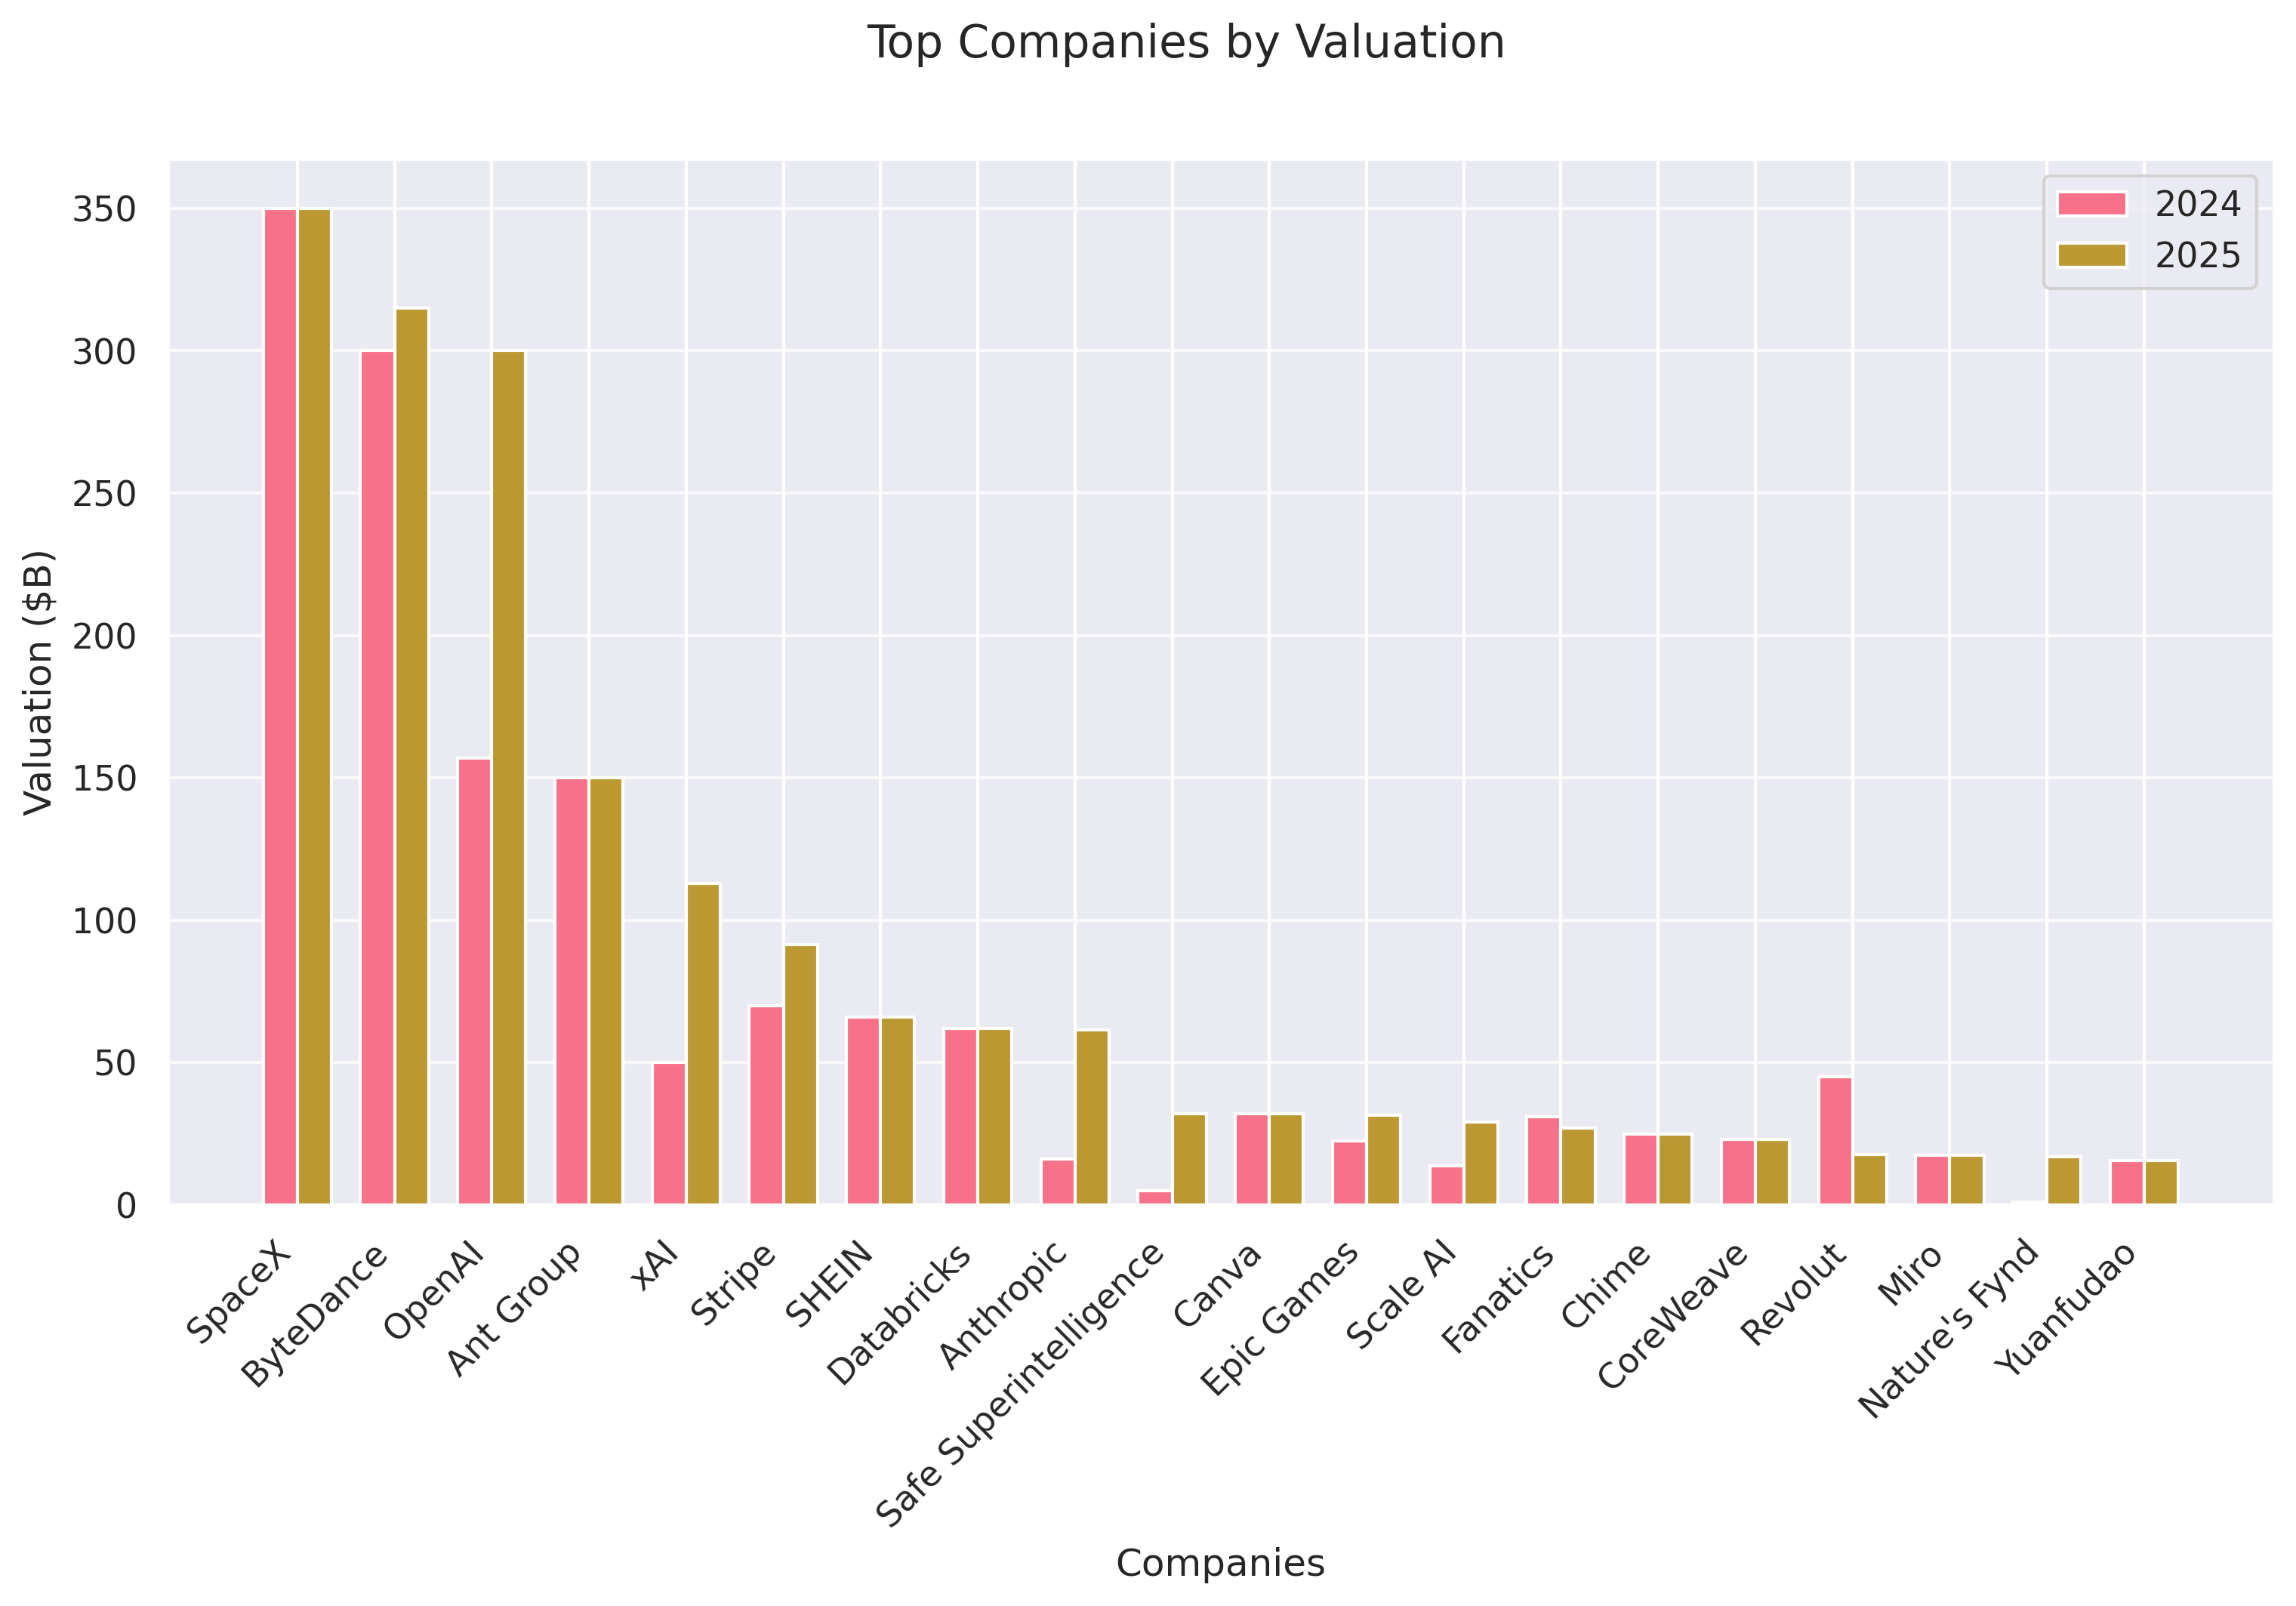

### Companies Received Most Funding

In [ ]:
top_companies = df.sort_values(by='Funding ($B)', ascending=False).head(20)
top_companies


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Unicorn Year</th>
      <th>Funding ($B)</th>
      <th>Latest Valuation ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.00</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>2017</td>
      <td>19.0</td>
      <td>150.00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.00</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>2019</td>
      <td>18.0</td>
      <td>300.00</td>
    </tr>
    <tr>
      <th>38</th>
      <td>JUUL Labs</td>
      <td>12.00</td>
      <td>15000000000</td>
      <td>2017-12-20</td>
      <td>2011</td>
      <td>6y11m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Boxin Capital, DT Capital Partners, IDG Capital</td>
      <td>2017</td>
      <td>15.0</td>
      <td>5.00</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Databricks</td>
      <td>62.00</td>
      <td>14000000000</td>
      <td>2019-02-05</td>
      <td>2013</td>
      <td>6y1m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Holtzbrinck Ventures, Unternehmertum Venture C...</td>
      <td>2019</td>
      <td>14.0</td>
      <td>62.00</td>
    </tr>
    <tr>
      <th>7</th>
      <td>xAI</td>
      <td>50.00</td>
      <td>12000000000</td>
      <td>2024-05-26</td>
      <td>2006</td>
      <td>18y4m</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>Burlingame</td>
      <td>Prysm Capital, Baillie Gifford &amp; Co., TDM Grow...</td>
      <td>2024</td>
      <td>12.0</td>
      <td>113.00</td>
    </tr>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.00</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>2012</td>
      <td>9.0</td>
      <td>350.00</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.00</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>2014</td>
      <td>9.0</td>
      <td>91.50</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Anthropic</td>
      <td>16.05</td>
      <td>8000000000</td>
      <td>2023-02-03</td>
      <td>2021</td>
      <td>2y2m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>New Enterprise Associates, Institutional Ventu...</td>
      <td>2023</td>
      <td>8.0</td>
      <td>61.50</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.00</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>2017</td>
      <td>8.0</td>
      <td>315.00</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Epic Games</td>
      <td>22.50</td>
      <td>8000000000</td>
      <td>2018-10-26</td>
      <td>1991</td>
      <td>27y9m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Cary</td>
      <td>Warburg Pincus, The Rise Fund, HarbourVest Par...</td>
      <td>2018</td>
      <td>8.0</td>
      <td>31.50</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Fanatics</td>
      <td>31.00</td>
      <td>5000000000</td>
      <td>2012-06-06</td>
      <td>2011</td>
      <td>1y5m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Jacksonville</td>
      <td>Liberty City Ventures, RRE Ventures, Mithril C...</td>
      <td>2012</td>
      <td>5.0</td>
      <td>27.00</td>
    </tr>
    <tr>
      <th>40</th>
      <td>Xingsheng Selected</td>
      <td>12.00</td>
      <td>5000000000</td>
      <td>2020-07-22</td>
      <td>2009</td>
      <td>11y6m</td>
      <td>Media &amp; Entertainment</td>
      <td>China</td>
      <td>Changsha</td>
      <td>Temasek, Guggenheim Investments, Qatar Investm...</td>
      <td>2020</td>
      <td>5.0</td>
      <td>12.00</td>
    </tr>
    <tr>
      <th>42</th>
      <td>BYJU's</td>
      <td>11.50</td>
      <td>5000000000</td>
      <td>2017-07-25</td>
      <td>2011</td>
      <td>7y8m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>India</td>
      <td>Bengaluru</td>
      <td>Greylock Partners, Venrock, Providence Ventures</td>
      <td>2017</td>
      <td>5.0</td>
      <td>11.50</td>
    </tr>
    <tr>
      <th>44</th>
      <td>Global Switch</td>
      <td>11.10</td>
      <td>5000000000</td>
      <td>2016-12-22</td>
      <td>1998</td>
      <td>19y2m</td>
      <td>Enterprise Tech</td>
      <td>United Kingdom</td>
      <td>London</td>
      <td>Jiangsu Shagang Group, IDC, Barclays, Credit S...</td>
      <td>2016</td>
      <td>5.0</td>
      <td>11.10</td>
    </tr>
    <tr>
      <th>48</th>
      <td>Chehaoduo</td>
      <td>10.00</td>
      <td>4000000000</td>
      <td>2016-03-12</td>
      <td>2014</td>
      <td>2y2m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>China</td>
      <td>Beijing</td>
      <td>China Health Industry Investment Fund, China R...</td>
      <td>2016</td>
      <td>4.0</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>24</th>
      <td>Anduril</td>
      <td>14.00</td>
      <td>4000000000</td>
      <td>2019-09-11</td>
      <td>2017</td>
      <td>2y8m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Irvine</td>
      <td>Norwest Venture Partners, Goldman Sachs, Dell ...</td>
      <td>2019</td>
      <td>4.0</td>
      <td>14.00</td>
    </tr>
    <tr>
      <th>23</th>
      <td>Klarna</td>
      <td>14.50</td>
      <td>4000000000</td>
      <td>2011-12-12</td>
      <td>2005</td>
      <td>9y2m</td>
      <td>Enterprise Tech</td>
      <td>Sweden</td>
      <td>Stockholm</td>
      <td>OneVentures, AirTree Ventures, AMP New Ventures</td>
      <td>2011</td>
      <td>4.0</td>
      <td>6.50</td>
    </tr>
    <tr>
      <th>5</th>
      <td>SHEIN</td>
      <td>66.00</td>
      <td>4000000000</td>
      <td>2018-07-03</td>
      <td>2008</td>
      <td>10y6m</td>
      <td>Financial Services</td>
      <td>Singapore</td>
      <td>Singapore</td>
      <td>369 Growth Partners, GTM Capital, Berkeley Hil...</td>
      <td>2018</td>
      <td>4.0</td>
      <td>66.00</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Yuanfudao</td>
      <td>15.50</td>
      <td>4000000000</td>
      <td>2017-05-31</td>
      <td>2012</td>
      <td>5y4m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Craft Ventures, F-Prime Capital, Sound Ventures</td>
      <td>2017</td>
      <td>4.0</td>
      <td>15.50</td>
    </tr>
    <tr>
      <th>60</th>
      <td>Northvolt</td>
      <td>9.08</td>
      <td>4000000000</td>
      <td>2019-06-12</td>
      <td>2016</td>
      <td>3y5m</td>
      <td>Industrials</td>
      <td>Sweden</td>
      <td>Stockholm</td>
      <td>Aqua-Spark, Wavemaker Partners, Peak XV Partners</td>
      <td>2019</td>
      <td>4.0</td>
      <td>11.75</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.subplots(figsize=(12, 8), dpi=300)
sns.barplot(top_companies, y='Company', x='Funding ($B)', hue='Company')
plt.suptitle('Companies Received Most Funding')
plt.xlabel('Amount ($B)')
plt.grid(axis='x', alpha=0.75)
plt.show()


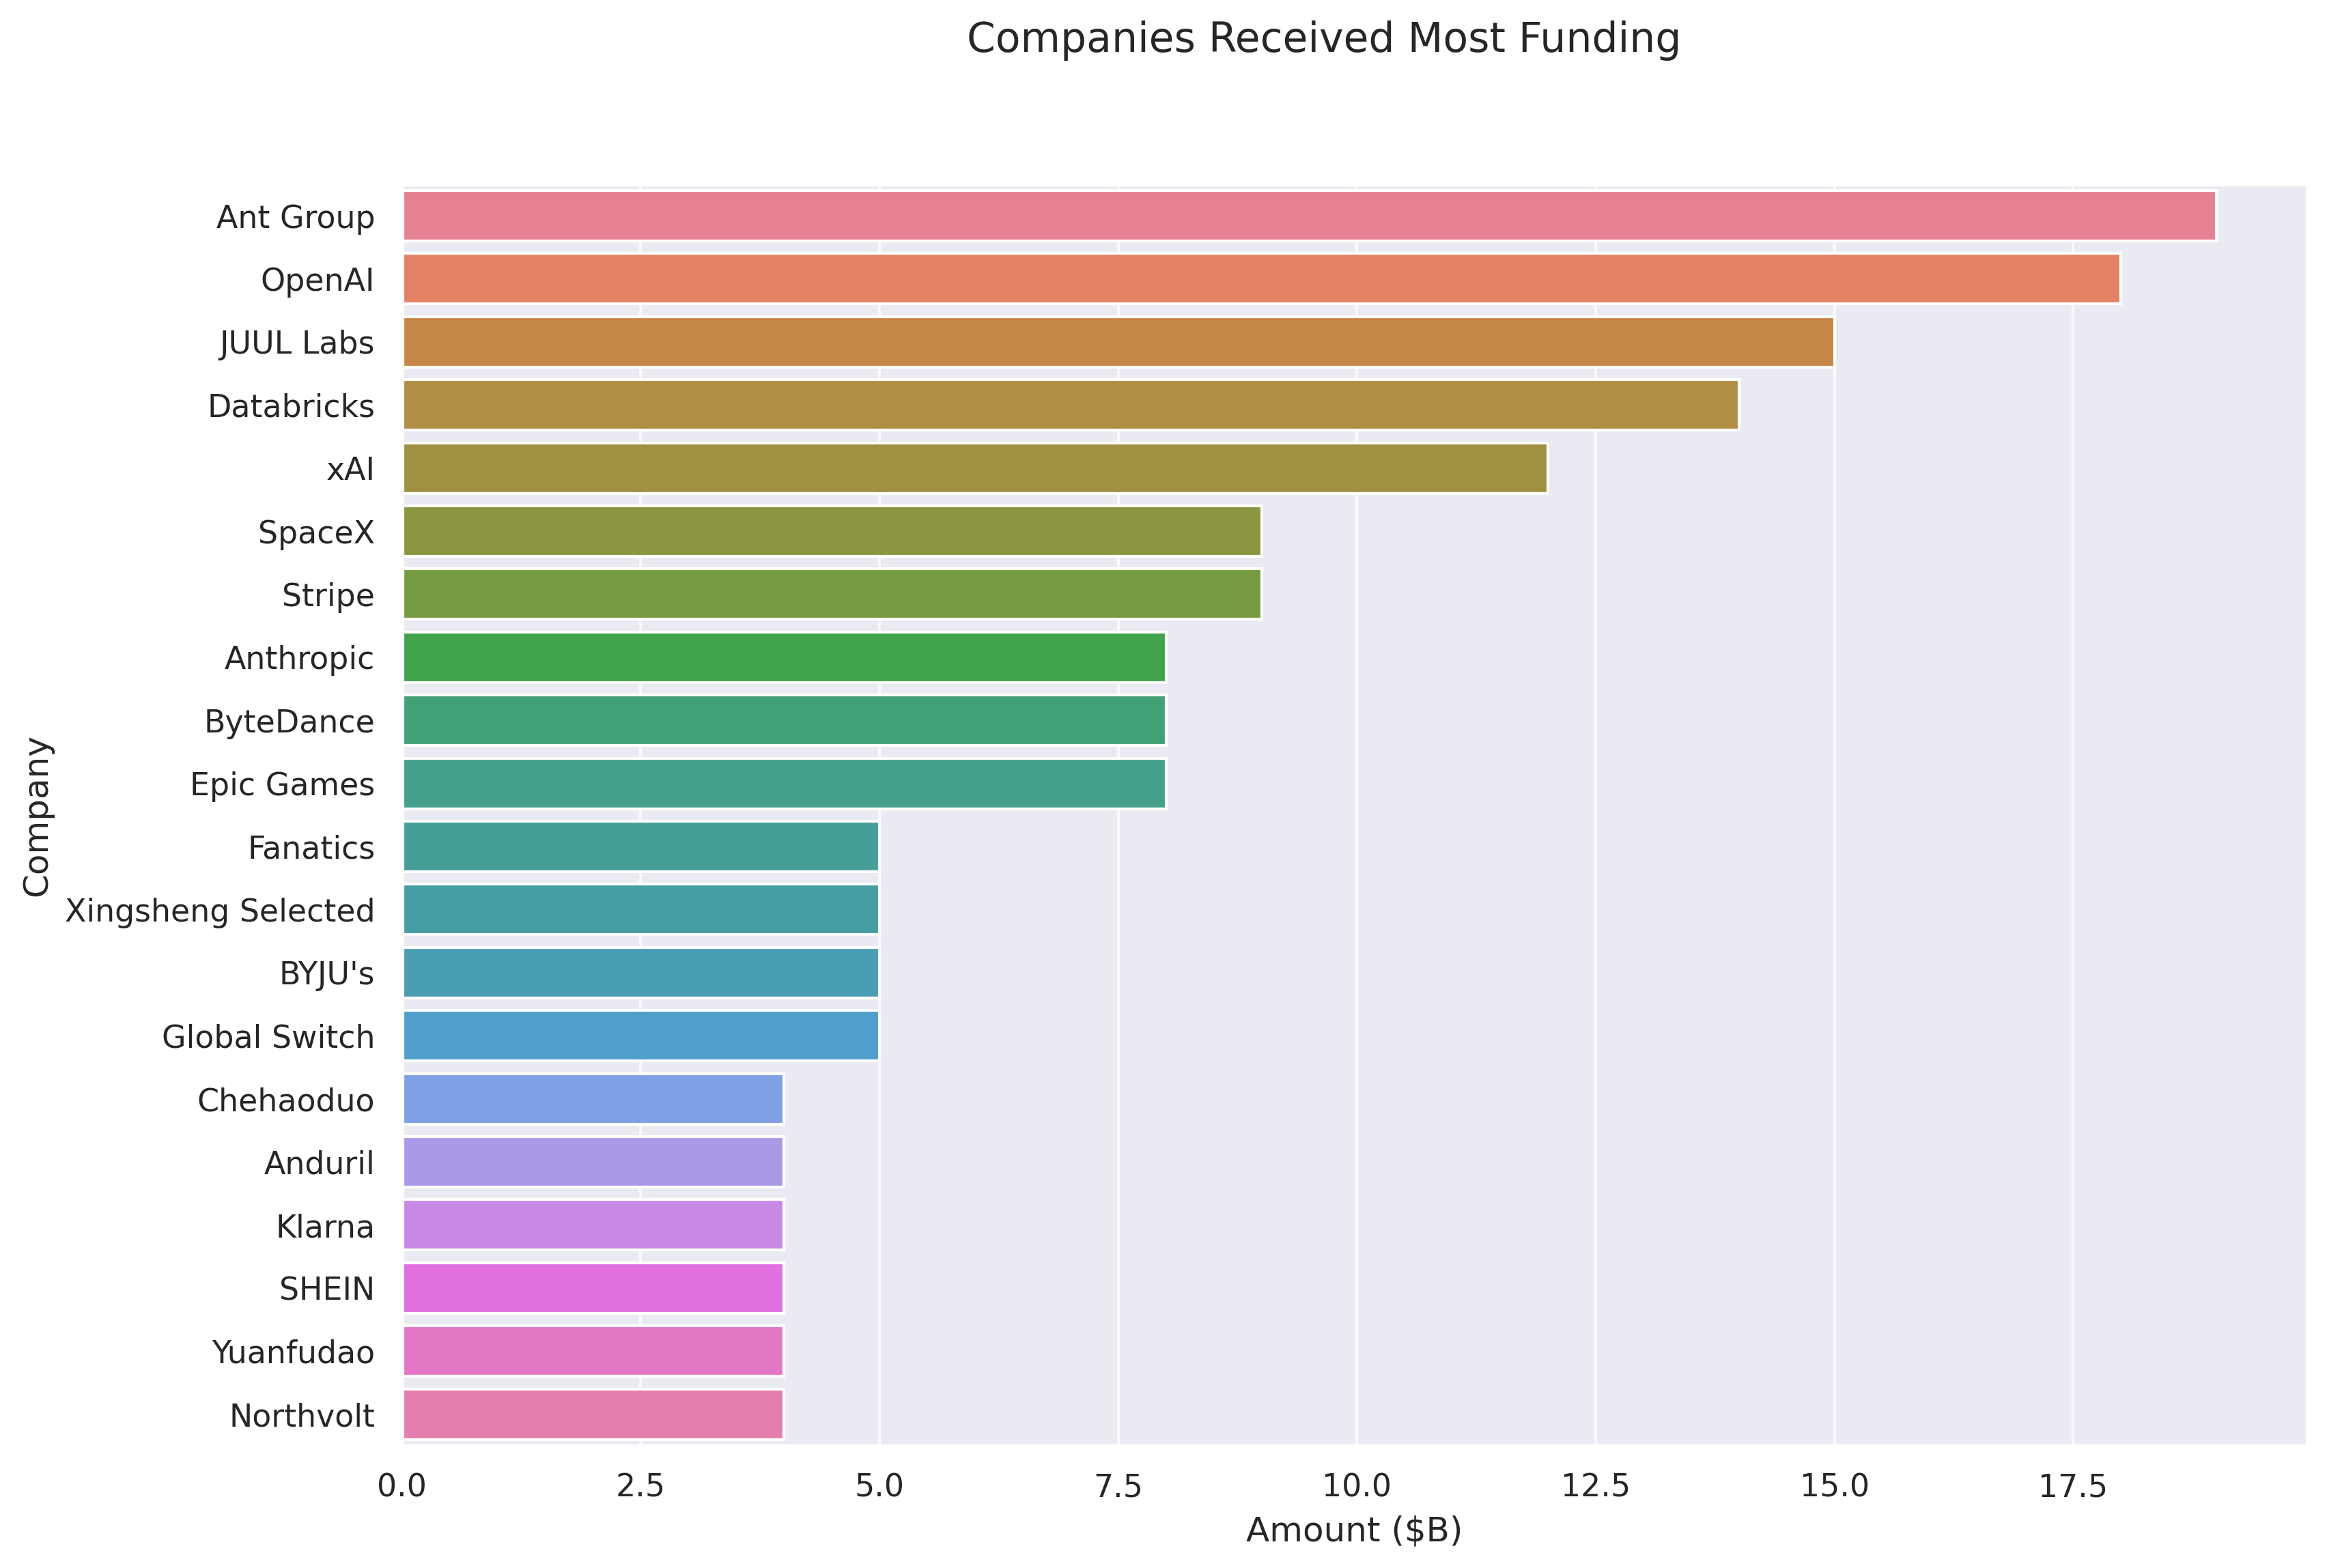

## By Country

In [ ]:
top_countries = df['Country'].value_counts().nlargest(5).index
top_countries


``` example
Index(['United States', 'China', 'India', 'United Kingdom', 'Germany'], dtype='object', name='Country')
```

### Top Countries by Number of Companies

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
sns.countplot(x=df['Country'],
              order=df['Country'].value_counts().nlargest(20).index,
              hue=df['Country'])
plt.suptitle('Top Countries by Number of Companies')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


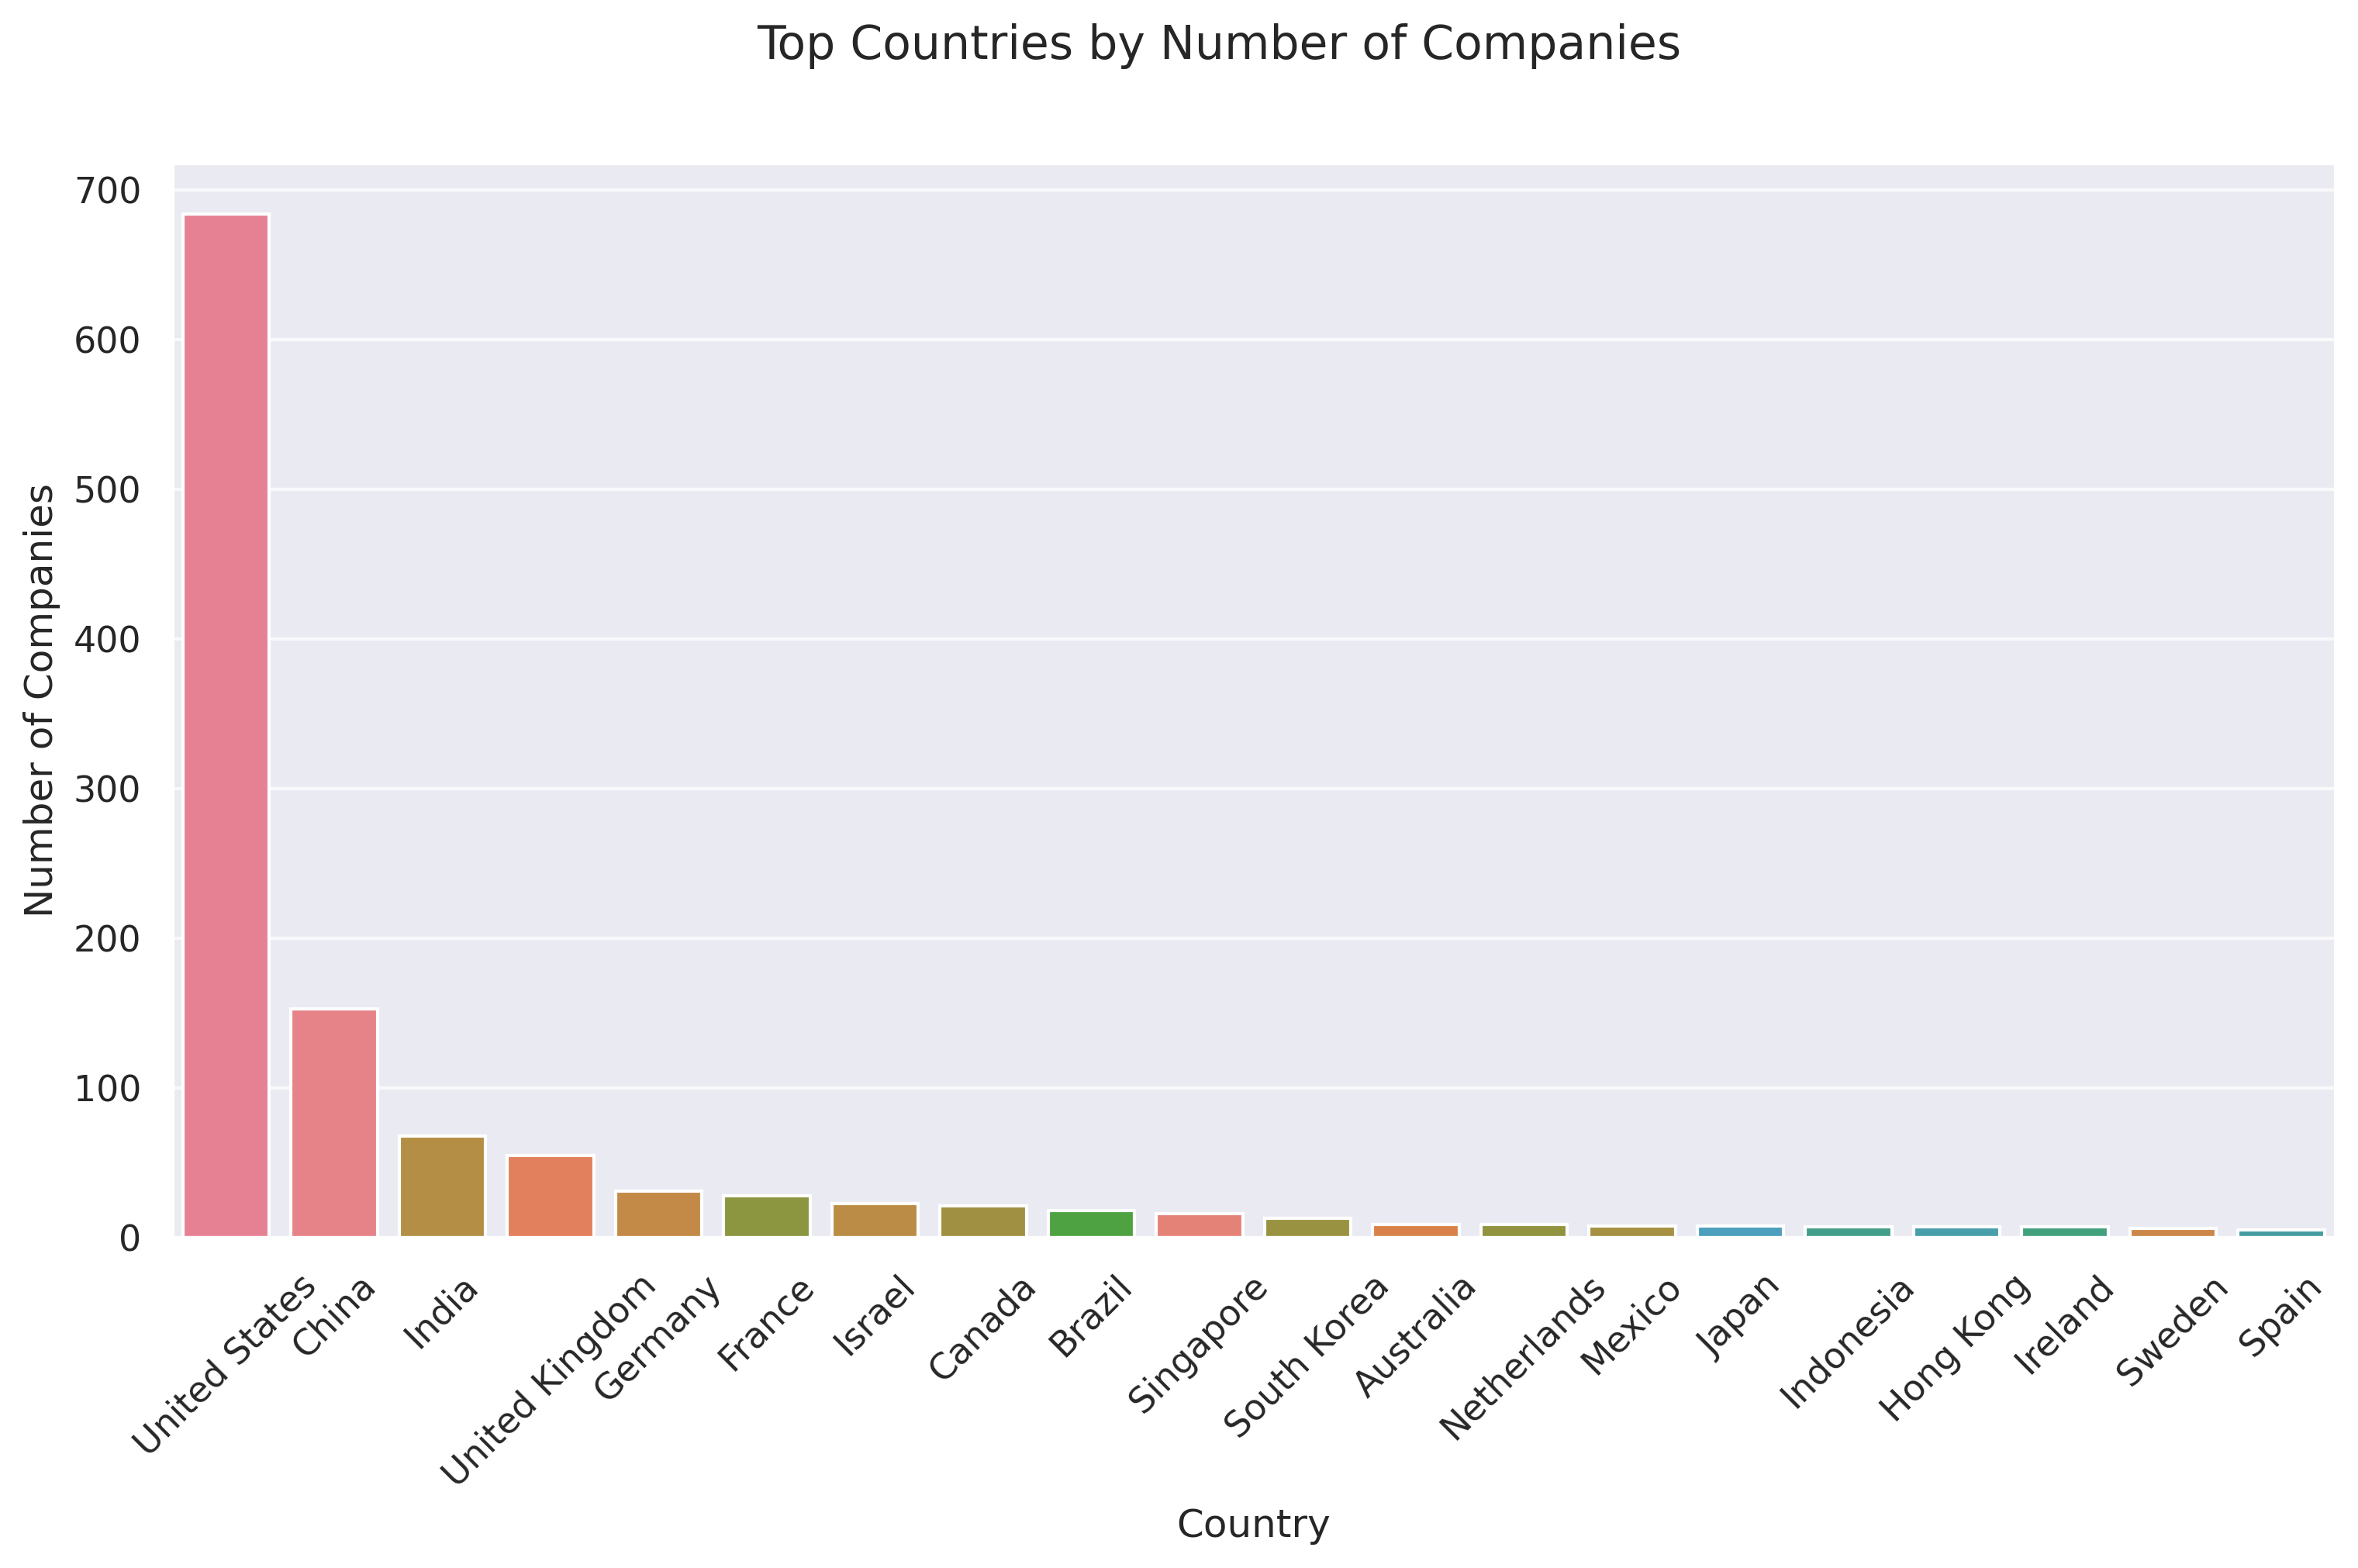

### Top Countries by Number of Companies across Different Industries

In [ ]:
grouped_df = df[df['Country'].isin(top_countries)].groupby(['Country', 'Industry']).size().unstack(fill_value=0)
grouped_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Industry</th>
      <th>Consumer &amp; Retail</th>
      <th>Enterprise Tech</th>
      <th>Financial Services</th>
      <th>Healthcare &amp; Life Sciences</th>
      <th>Industrials</th>
      <th>Insurance</th>
      <th>Media &amp; Entertainment</th>
    </tr>
    <tr>
      <th>Country</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>China</th>
      <td>19</td>
      <td>59</td>
      <td>27</td>
      <td>14</td>
      <td>22</td>
      <td>2</td>
      <td>10</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>7</td>
      <td>10</td>
      <td>2</td>
      <td>3</td>
      <td>8</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>India</th>
      <td>10</td>
      <td>22</td>
      <td>12</td>
      <td>7</td>
      <td>8</td>
      <td>1</td>
      <td>8</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>9</td>
      <td>16</td>
      <td>12</td>
      <td>6</td>
      <td>5</td>
      <td>2</td>
      <td>5</td>
    </tr>
    <tr>
      <th>United States</th>
      <td>116</td>
      <td>214</td>
      <td>128</td>
      <td>68</td>
      <td>94</td>
      <td>15</td>
      <td>49</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
grouped_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.suptitle('Number of Companies accross Different Industries')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(ncol=4, loc="upper center", bbox_to_anchor=(0.5,-0.08))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


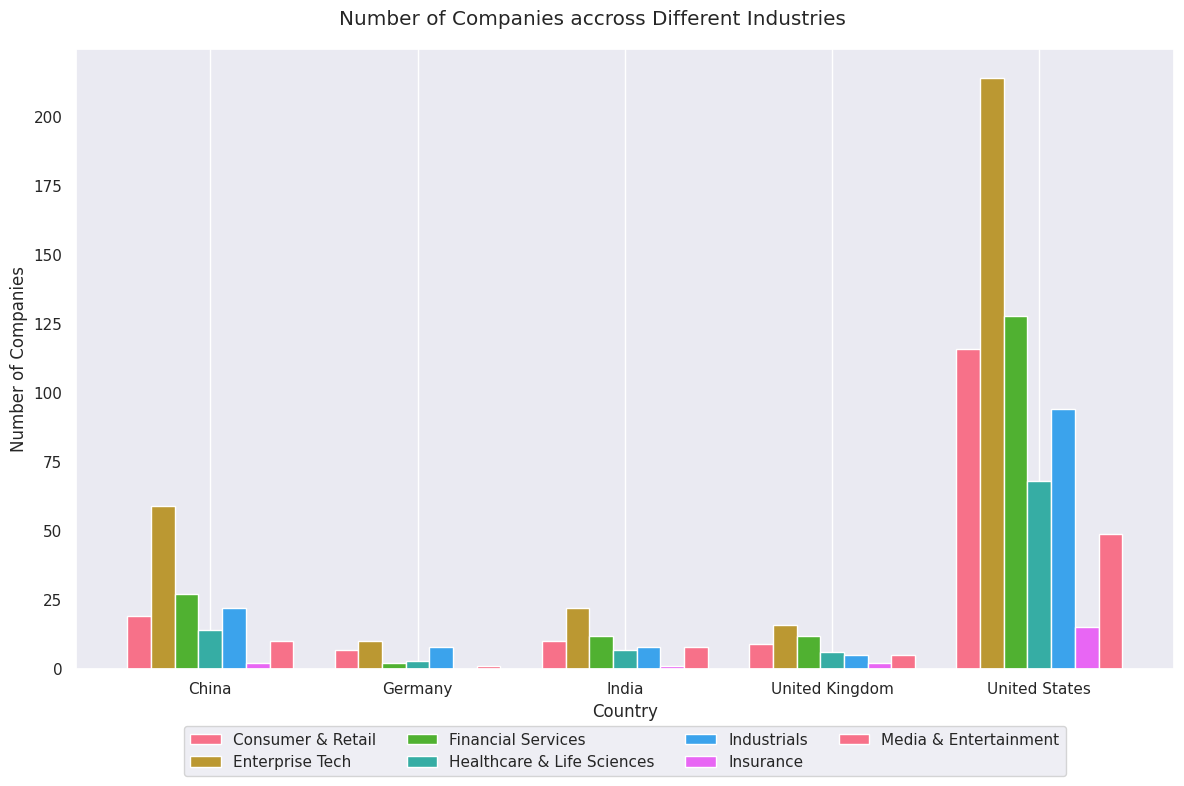

### Top Countries by Company Valuations across Different Industries

In [ ]:
grouped_df = df[df['Country'].isin(top_countries)].groupby(['Country', 'Industry'])['Valuation ($B)'].sum().unstack(fill_value=0)
grouped_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Industry</th>
      <th>Consumer &amp; Retail</th>
      <th>Enterprise Tech</th>
      <th>Financial Services</th>
      <th>Healthcare &amp; Life Sciences</th>
      <th>Industrials</th>
      <th>Insurance</th>
      <th>Media &amp; Entertainment</th>
    </tr>
    <tr>
      <th>Country</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>China</th>
      <td>47.84</td>
      <td>452.44</td>
      <td>207.12</td>
      <td>33.94</td>
      <td>49.77</td>
      <td>4.93</td>
      <td>39.61</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>22.54</td>
      <td>27.92</td>
      <td>2.07</td>
      <td>17.87</td>
      <td>14.50</td>
      <td>0.00</td>
      <td>1.00</td>
    </tr>
    <tr>
      <th>India</th>
      <td>34.44</td>
      <td>60.65</td>
      <td>19.85</td>
      <td>20.00</td>
      <td>13.01</td>
      <td>3.40</td>
      <td>20.72</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>25.09</td>
      <td>50.58</td>
      <td>27.97</td>
      <td>26.05</td>
      <td>13.56</td>
      <td>46.00</td>
      <td>8.10</td>
    </tr>
    <tr>
      <th>United States</th>
      <td>386.06</td>
      <td>962.37</td>
      <td>343.05</td>
      <td>233.18</td>
      <td>478.08</td>
      <td>55.40</td>
      <td>106.00</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
grouped_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.suptitle('Company Valuations accross Different Industries')
plt.xlabel('Country')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(ncol=4, loc="upper center", bbox_to_anchor=(0.5,-0.08))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


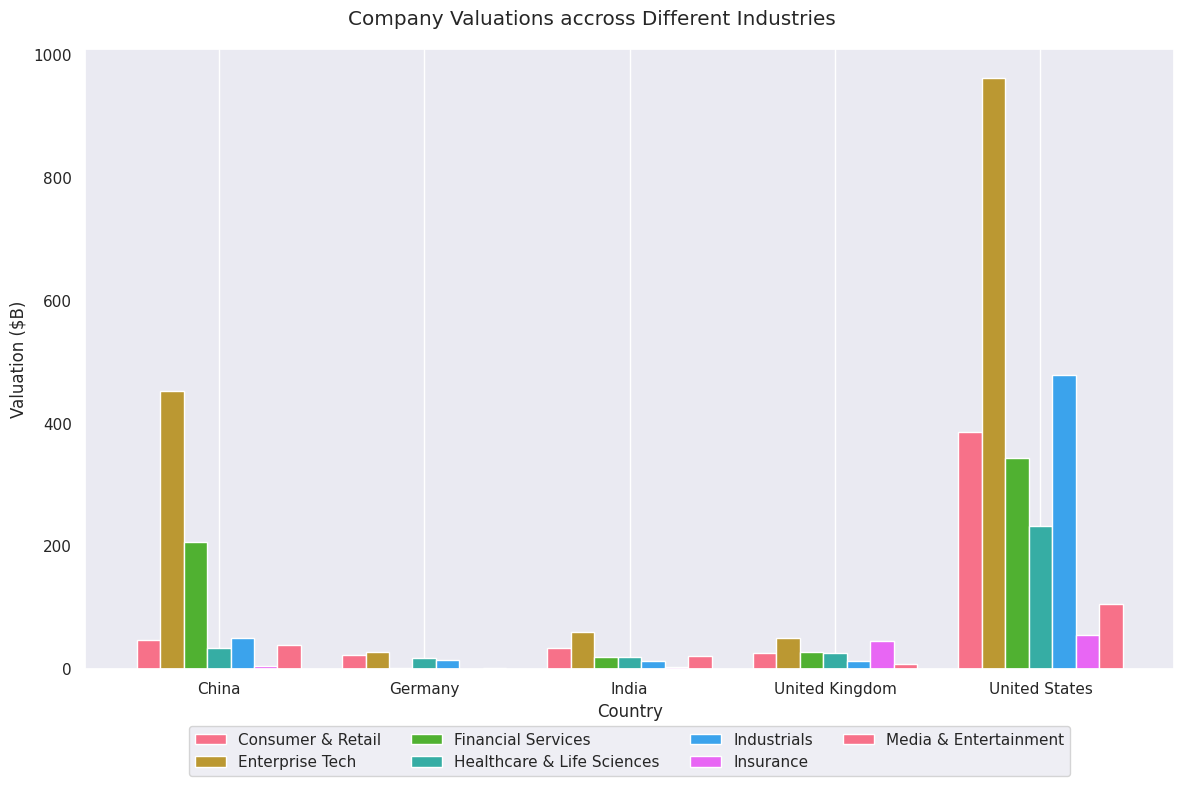

# Time-Based Analysis

## Unicorn Growth Over Time

In [ ]:
grouped_df = df.groupby('Unicorn Year').size().reset_index(name='Count')
grouped_df['Accumulated Count'] = grouped_df['Count'].cumsum()
grouped_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unicorn Year</th>
      <th>Count</th>
      <th>Accumulated Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2007</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2011</td>
      <td>1</td>
      <td>2</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2012</td>
      <td>4</td>
      <td>6</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013</td>
      <td>4</td>
      <td>10</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2014</td>
      <td>9</td>
      <td>19</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2015</td>
      <td>32</td>
      <td>51</td>
    </tr>
    <tr>
      <th>6</th>
      <td>2016</td>
      <td>17</td>
      <td>68</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2017</td>
      <td>35</td>
      <td>103</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2018</td>
      <td>83</td>
      <td>186</td>
    </tr>
    <tr>
      <th>9</th>
      <td>2019</td>
      <td>85</td>
      <td>271</td>
    </tr>
    <tr>
      <th>10</th>
      <td>2020</td>
      <td>91</td>
      <td>362</td>
    </tr>
    <tr>
      <th>11</th>
      <td>2021</td>
      <td>484</td>
      <td>846</td>
    </tr>
    <tr>
      <th>12</th>
      <td>2022</td>
      <td>252</td>
      <td>1098</td>
    </tr>
    <tr>
      <th>13</th>
      <td>2023</td>
      <td>68</td>
      <td>1166</td>
    </tr>
    <tr>
      <th>14</th>
      <td>2024</td>
      <td>78</td>
      <td>1244</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
sns.barplot(grouped_df, x='Unicorn Year', y='Count', hue='Count')
plt.plot(grouped_df['Accumulated Count'], marker='o', linestyle='dashed')
plt.suptitle('Unicorn Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.grid(axis='y', alpha=0.7)
plt.show()


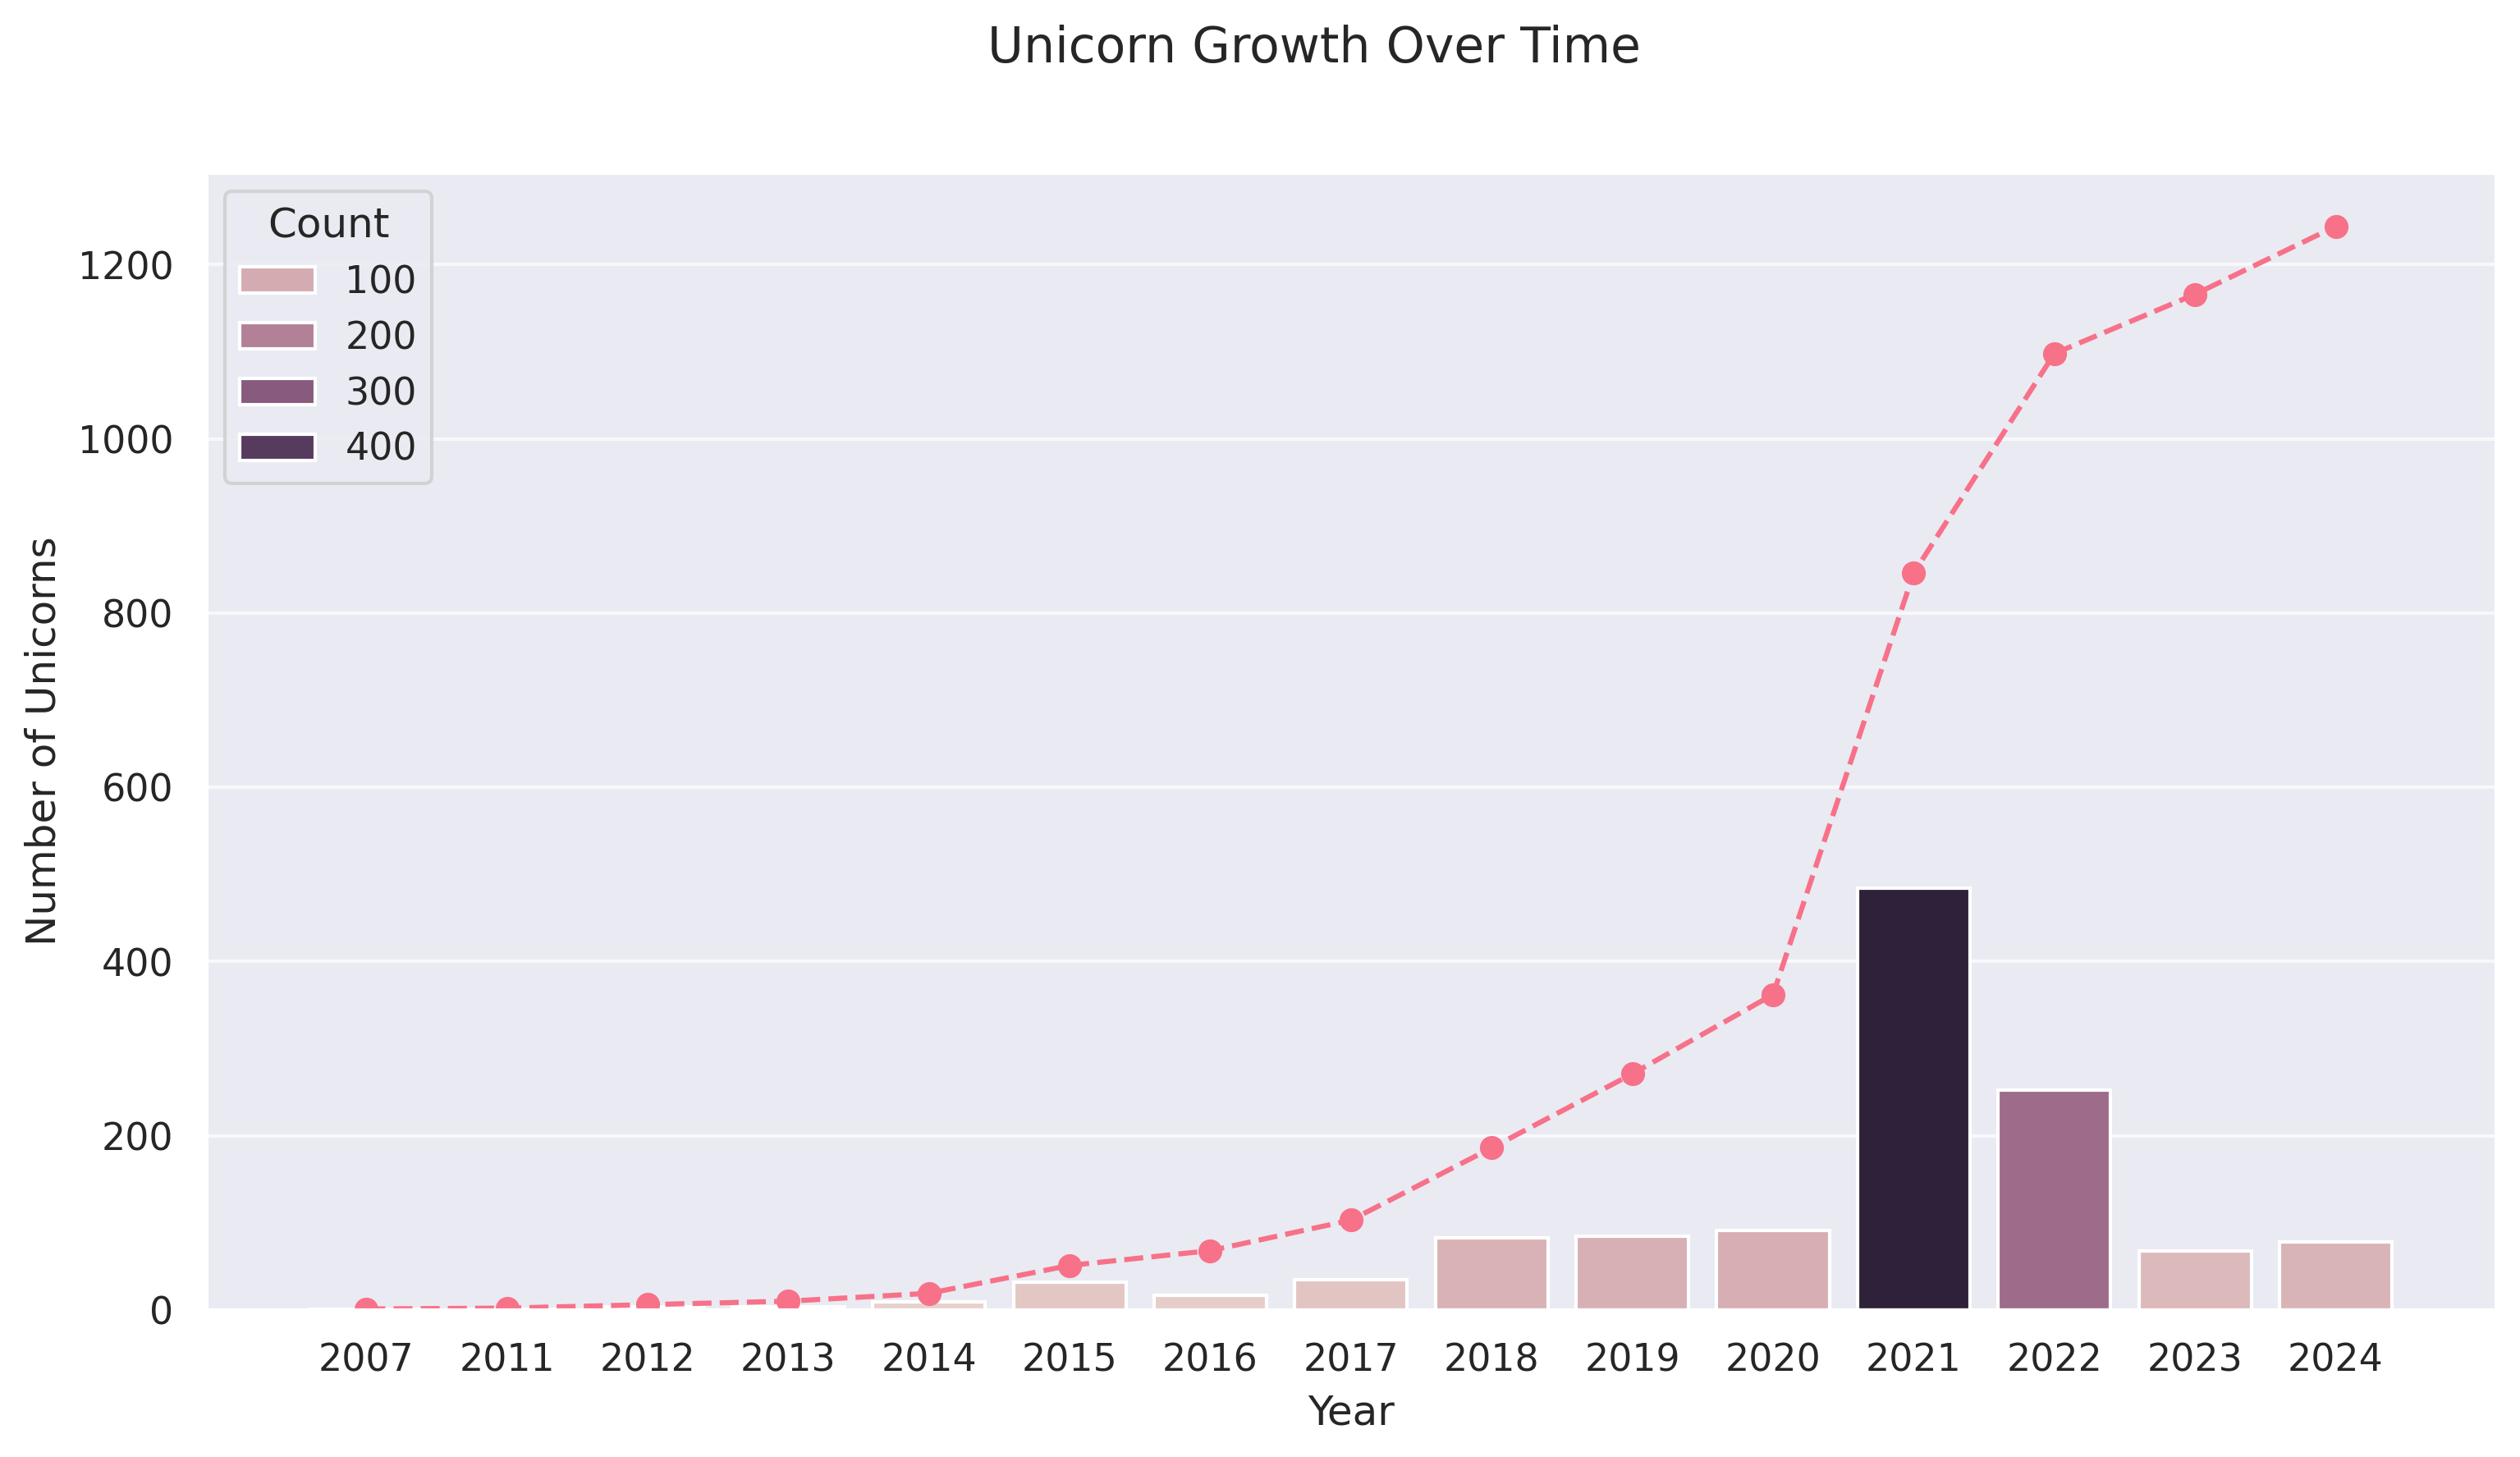

The surge of unicorns was reported as
["meteoric"](https://pitchbook.com/news/articles/us-unicorns-2021-venture-capital-valuations)
for 2021, with \$71 billion invested in 340 new companies, a banner year
for startups and for the US venture capital industry; the unprecedented
number of companies valued at more than \$1 billion during 2021 exceeded
the sum total of the five previous years.

## Time to Unicorn

In [ ]:
# Function to convert "Years to Unicorn" into total months
def convert_years_to_months(years_str):
    if 'y' in years_str and 'm' in years_str:
        years, months = years_str.split('y')
        months = months.replace('m', '').strip()
        return int(years.strip()) * 12 + int(months)
    elif 'y' in years_str:
        years = years_str.replace('y', '').strip()
        return int(years) * 12
    elif 'm' in years_str:
        months = years_str.replace('mo', '').replace('m', '').strip()
        return int(months)
    else:
        return None

df['Years to Unicorn (Months)'] = df['Years to Unicorn'].apply(convert_years_to_months)


In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
plt.hist(df['Years to Unicorn (Months)'].dropna(), bins=300)
plt.suptitle('Distribution of Time to Unicorn')
plt.xlabel('Months')
plt.ylabel('Number of Unicorns')
plt.grid(alpha=0.75)
plt.show()


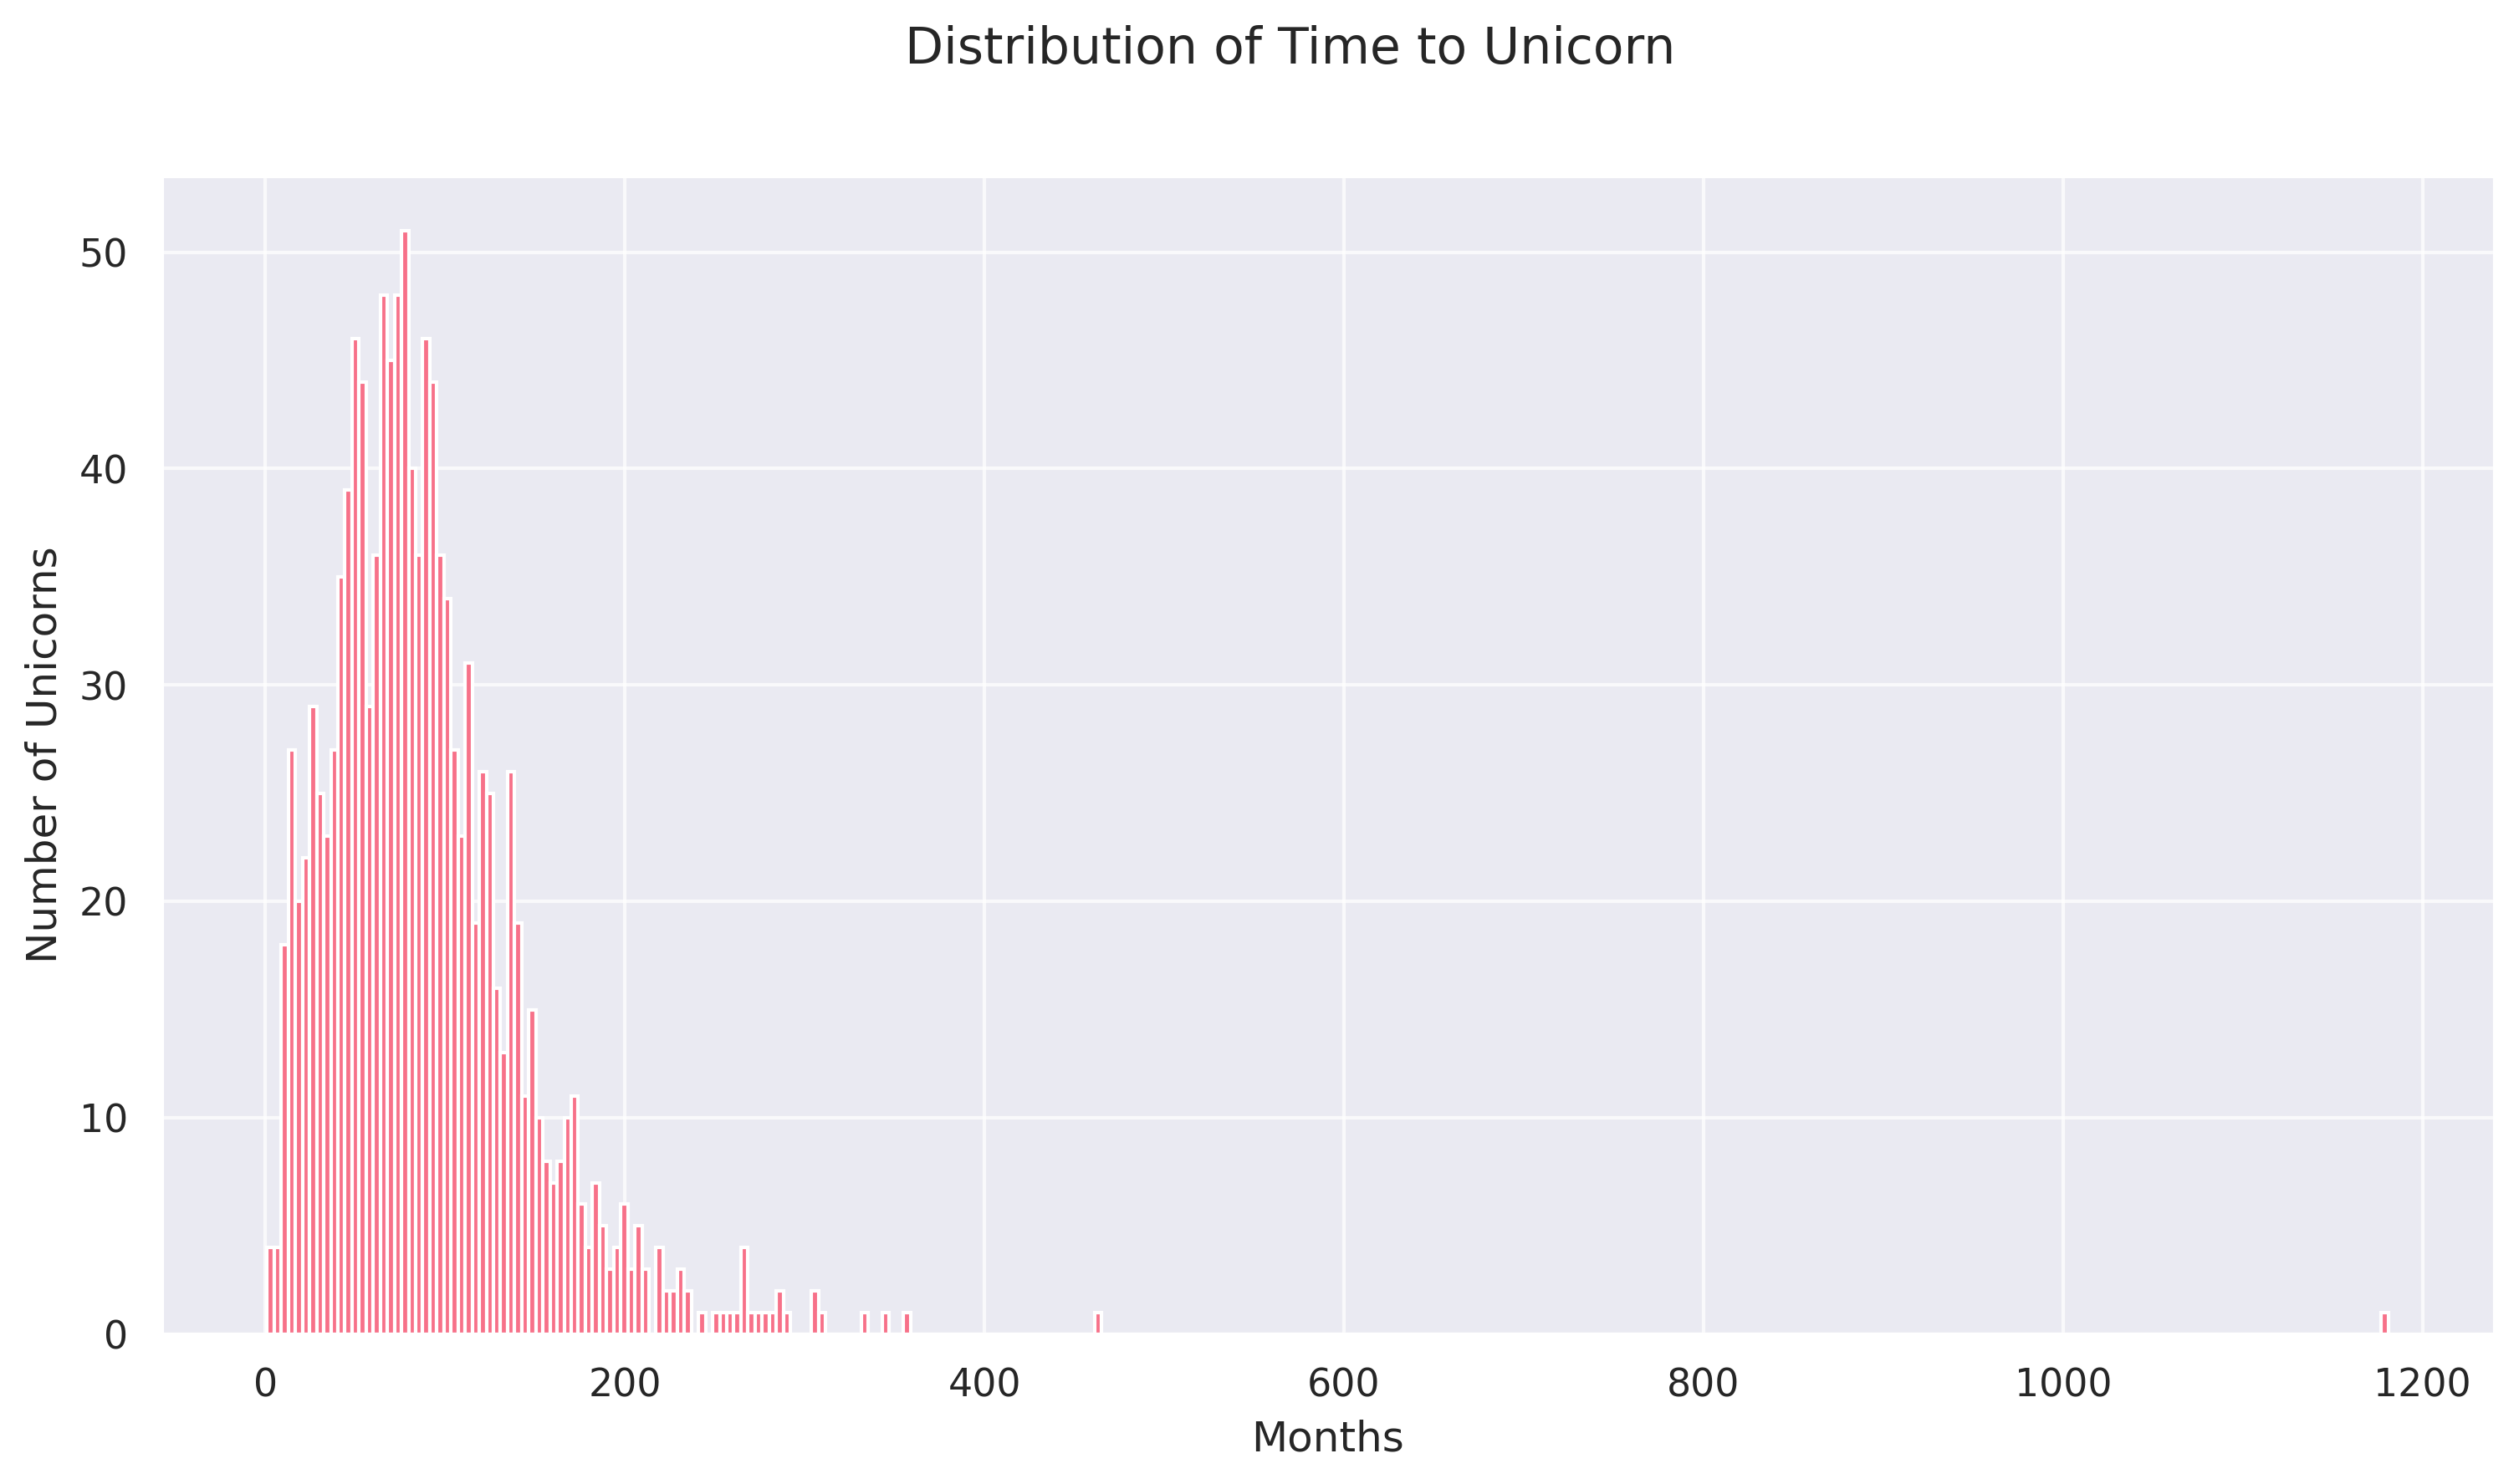

## Distribution of Valuations Over Time

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
sns.scatterplot(df, x='Unicorn Year', y='Valuation ($B)', alpha=.6, hue='Industry')
plt.suptitle('Distribution of Valuations Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($B)')
plt.xticks(df['Unicorn Year'].unique(), rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.yscale('log')
plt.show()


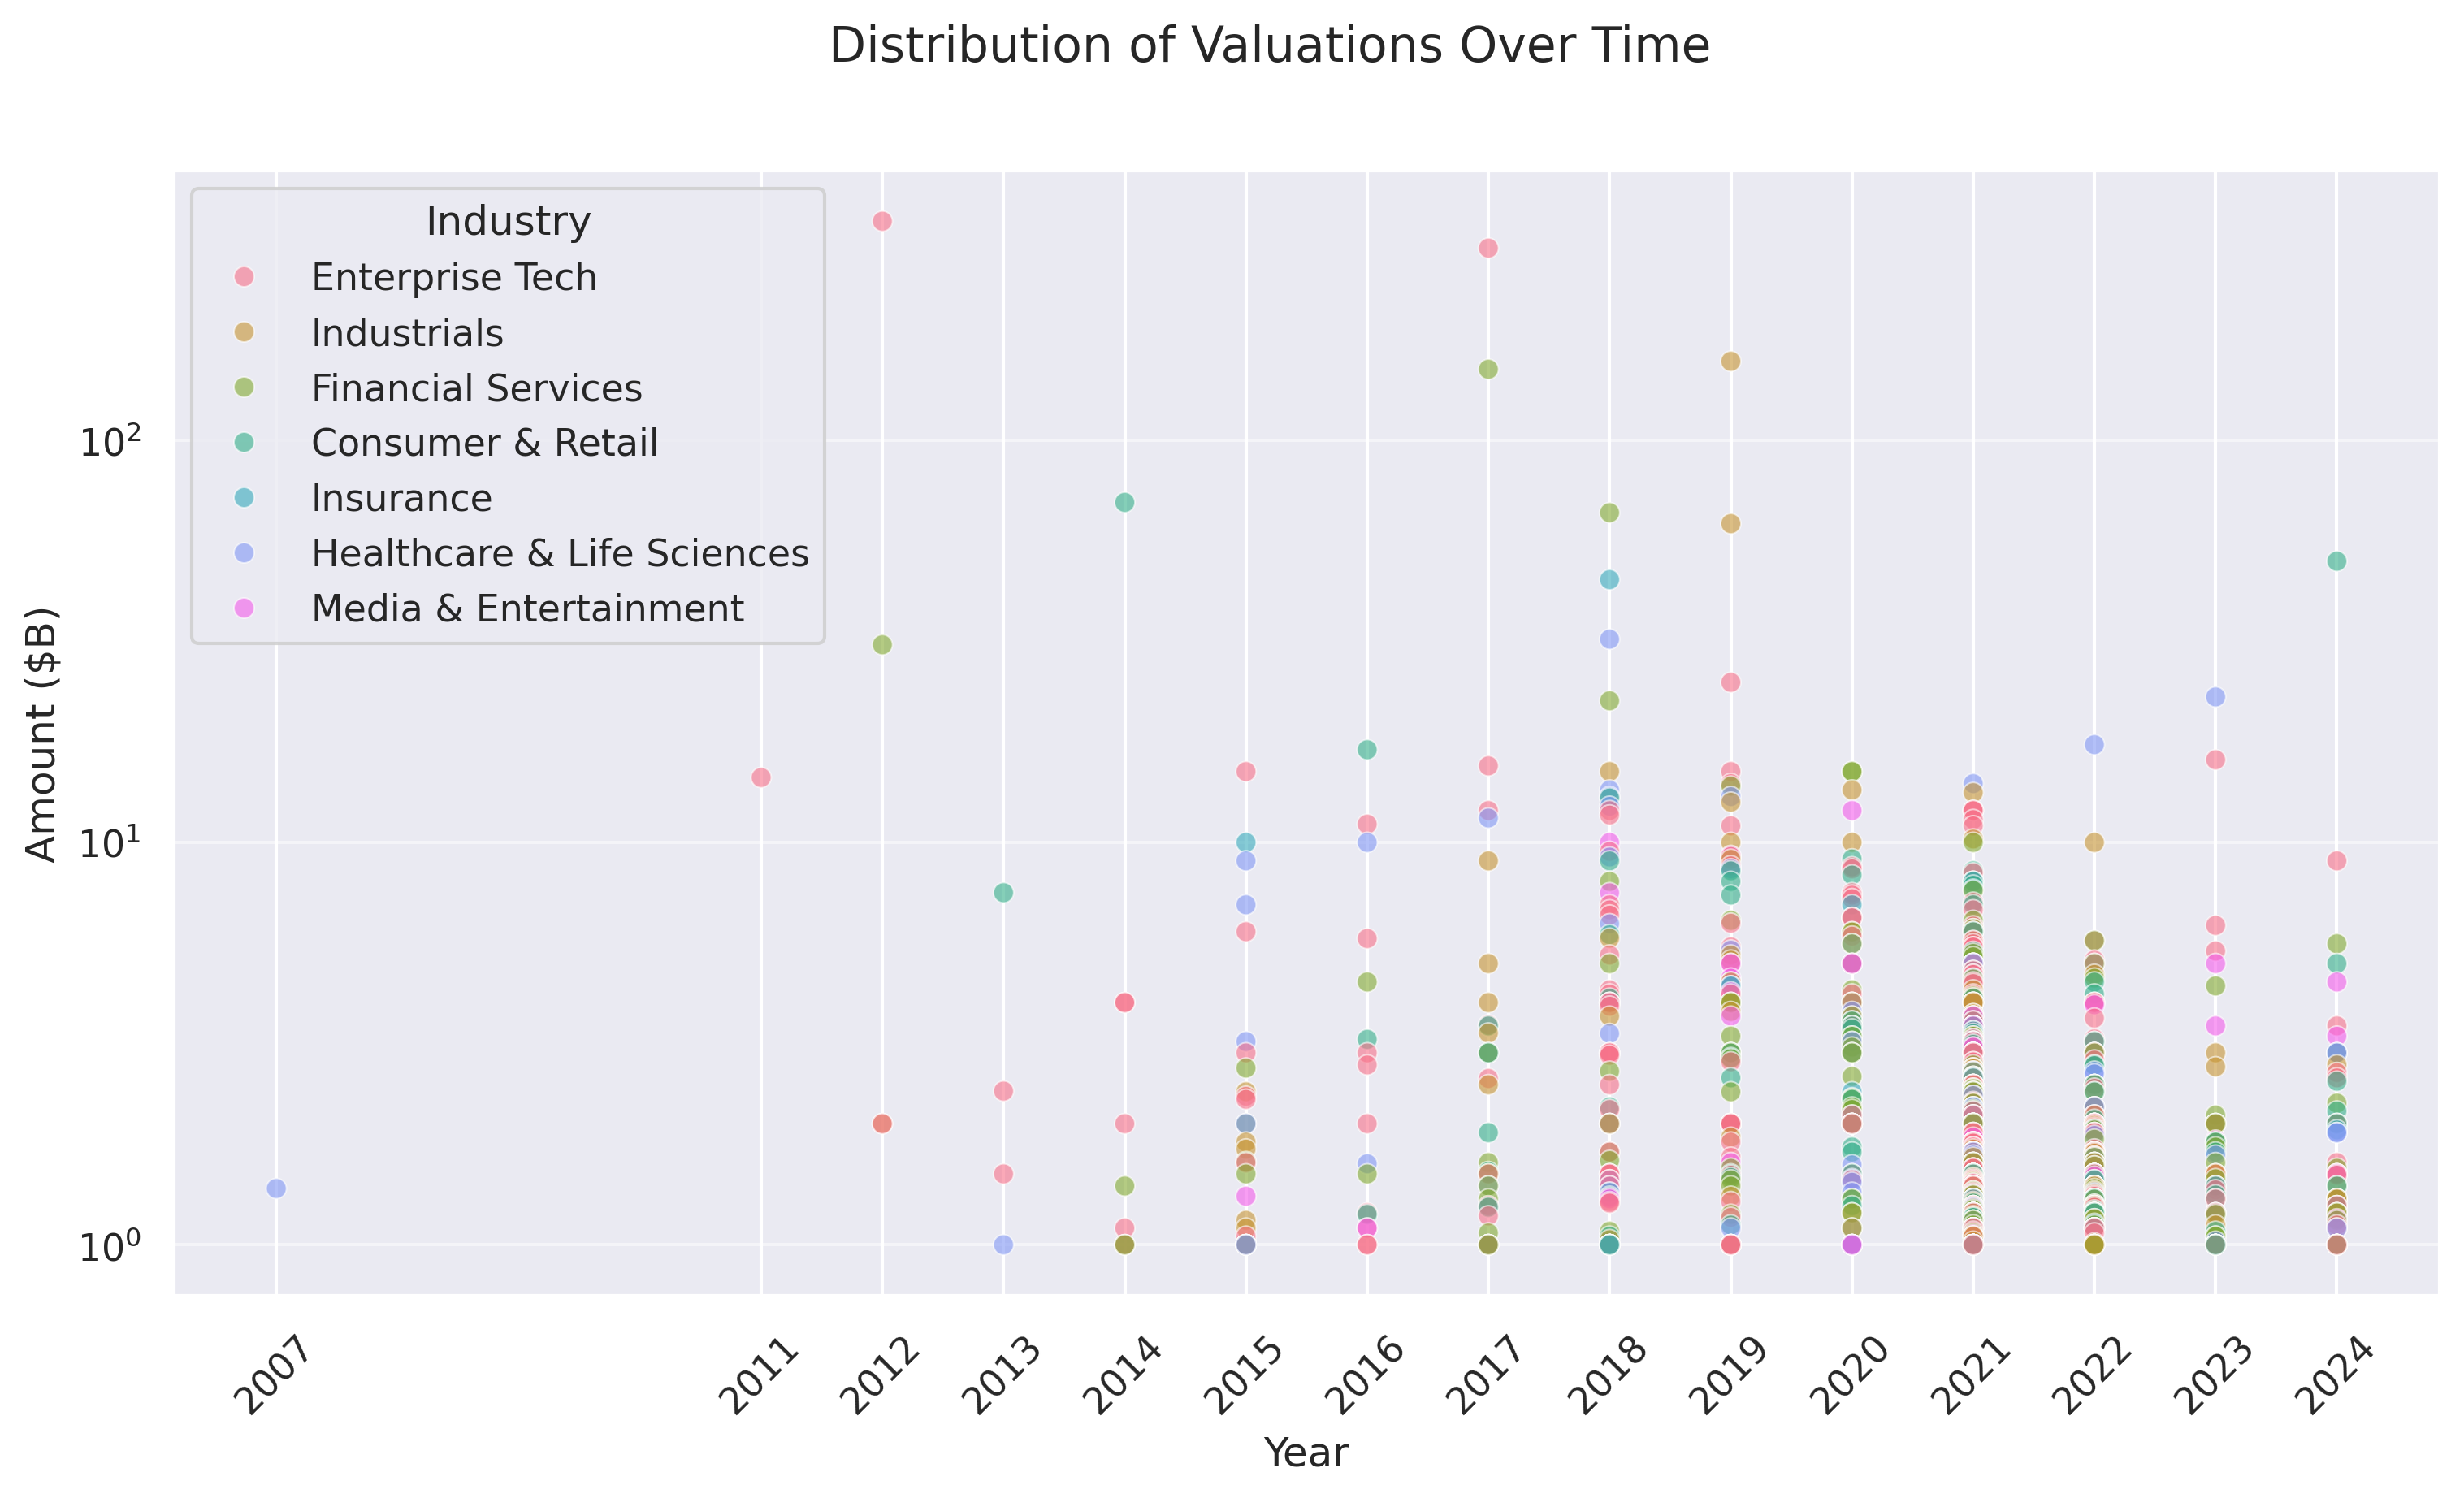

## Distribution of Funding Over Time

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
sns.scatterplot(df, x='Unicorn Year', y=df['Total Equity Funding ($)']/1e6, alpha=0.6, hue='Industry')
plt.suptitle('Distribution of Funding Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($M)')
plt.xticks(df['Unicorn Year'].unique(), rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


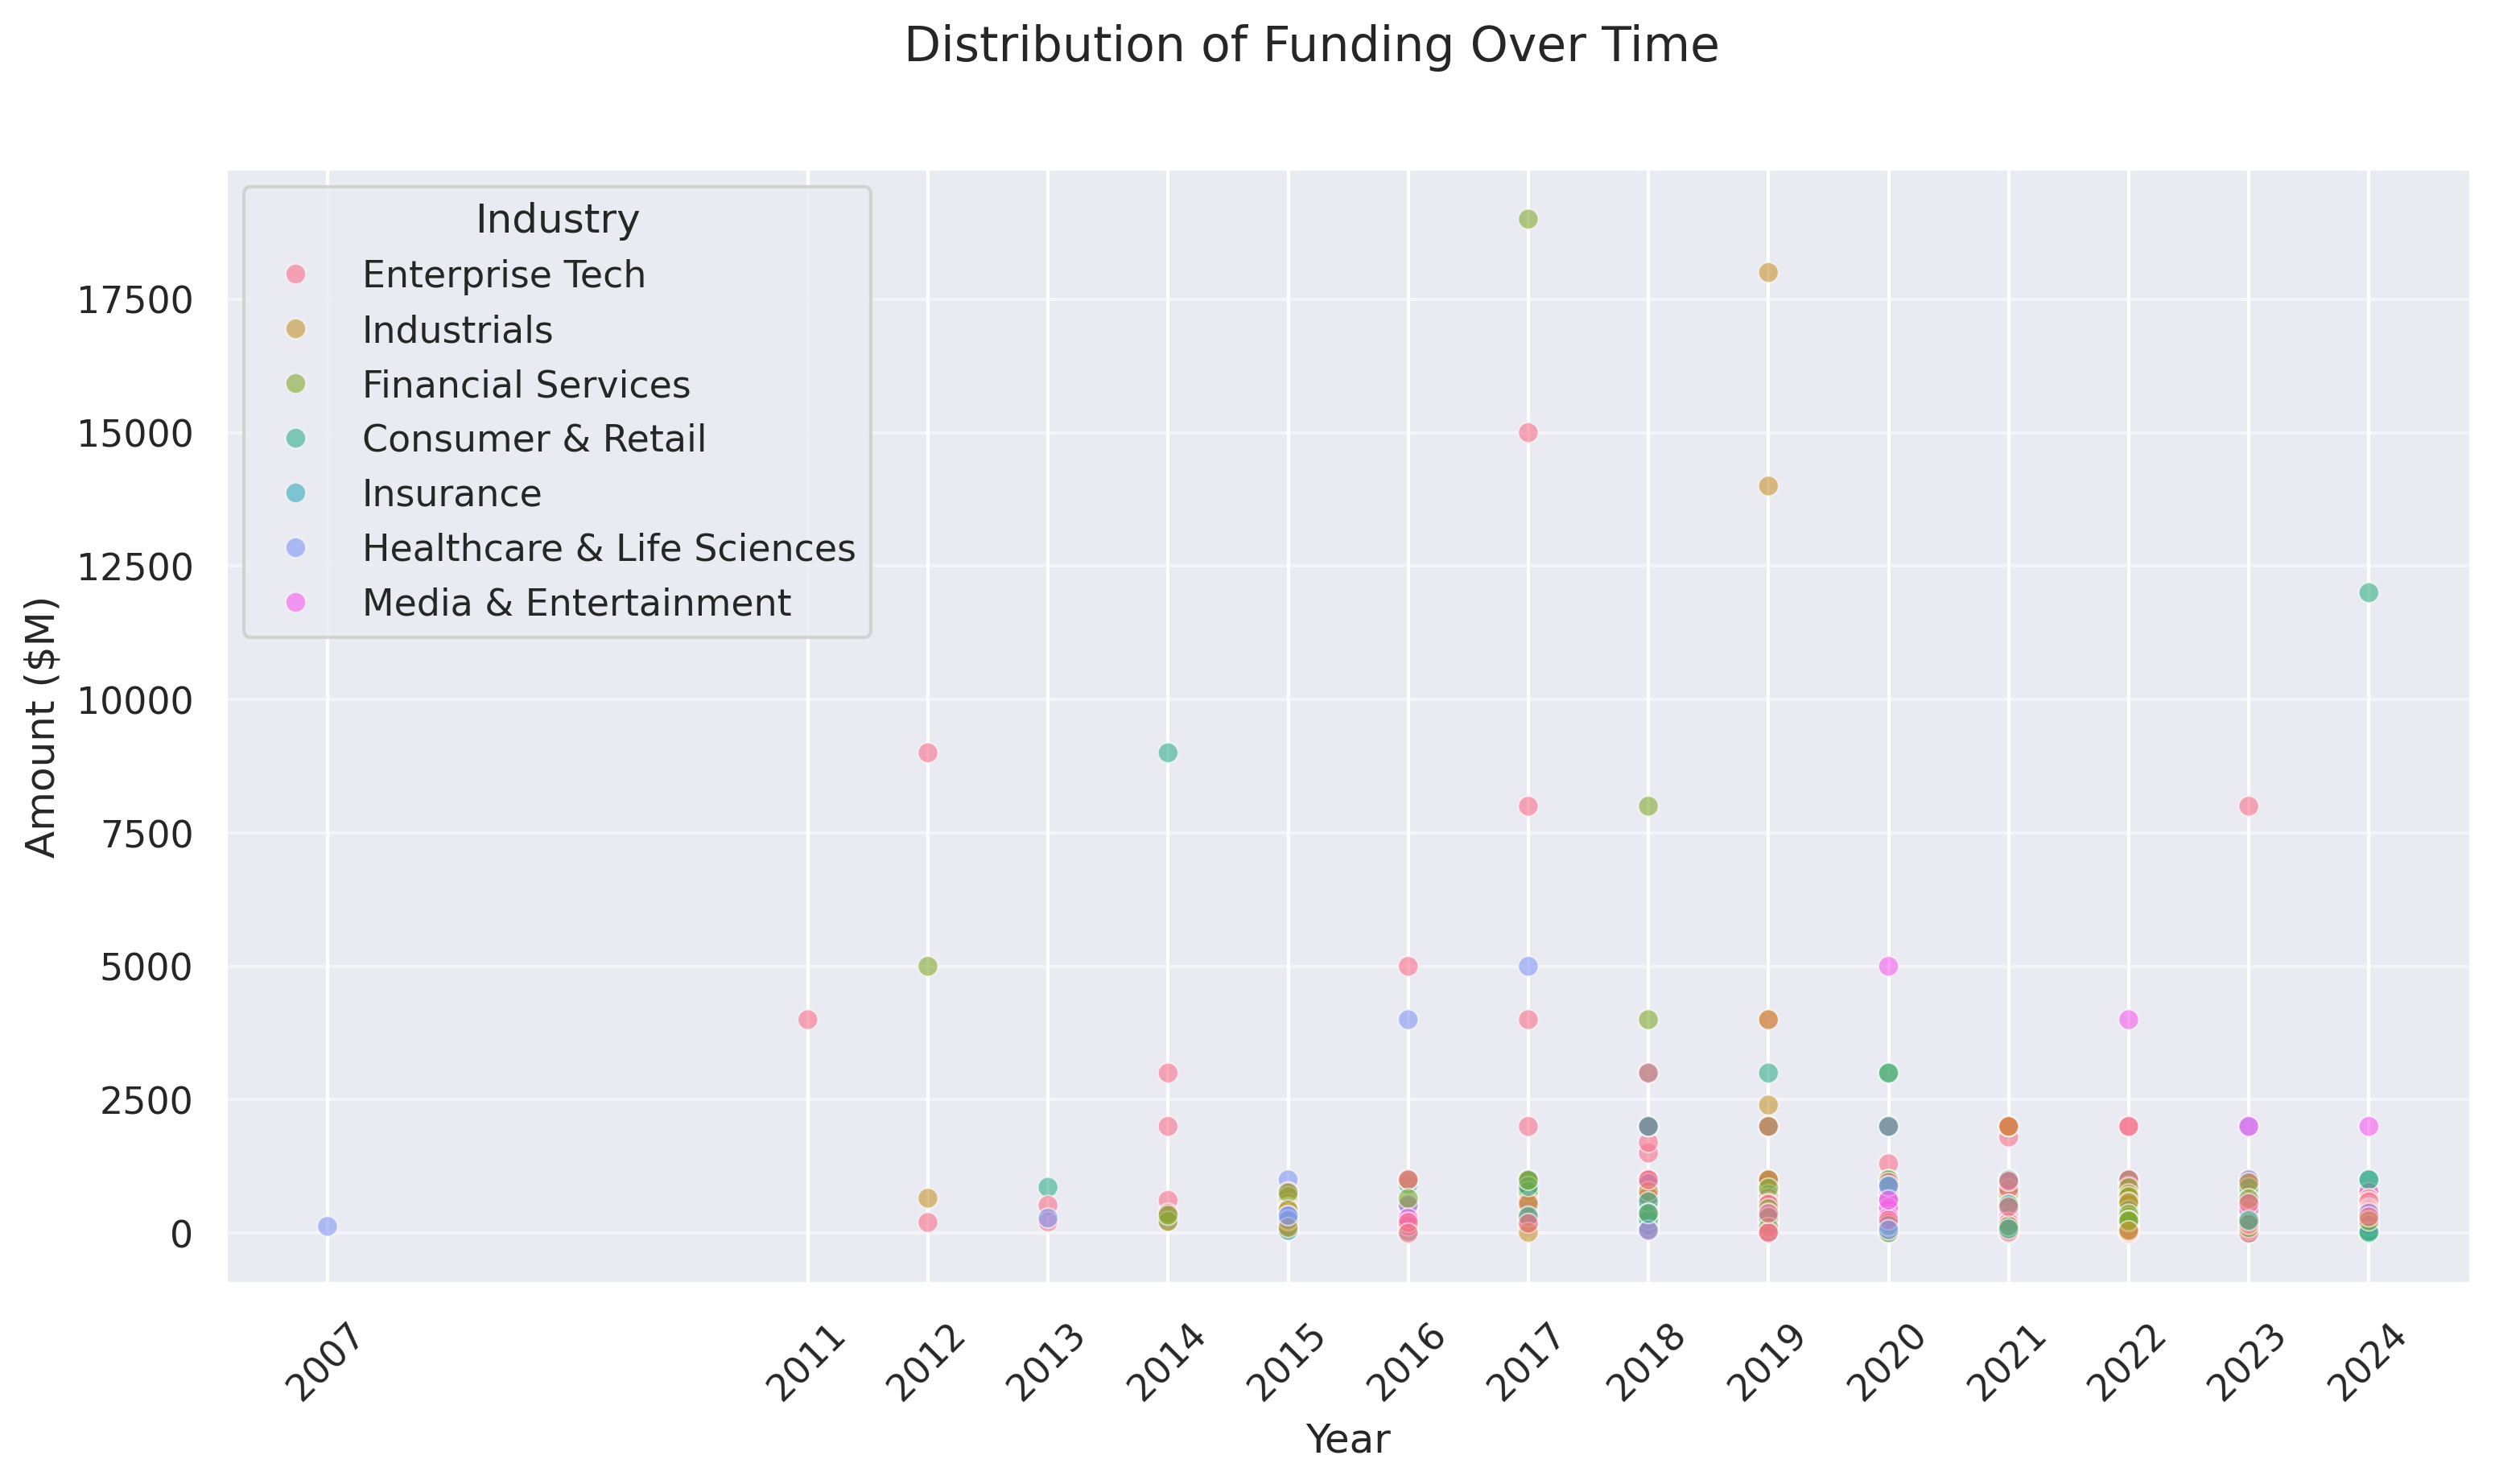

# Correlation Analysis

## Relationship between Funding and Valuation

In [ ]:
plt.subplots(figsize=(12, 6), dpi=300)
sns.scatterplot(df, x=df['Total Equity Funding ($)']/1e6, y=df['Valuation ($B)']*1e9, alpha=0.6, hue='Industry')
plt.suptitle('Relationship between Funding and Valuation')
plt.xlabel('Funding ($M)')
plt.ylabel('Valuation ($)')
plt.grid()
# plt.xscale('log')
plt.yscale('log')
plt.show()


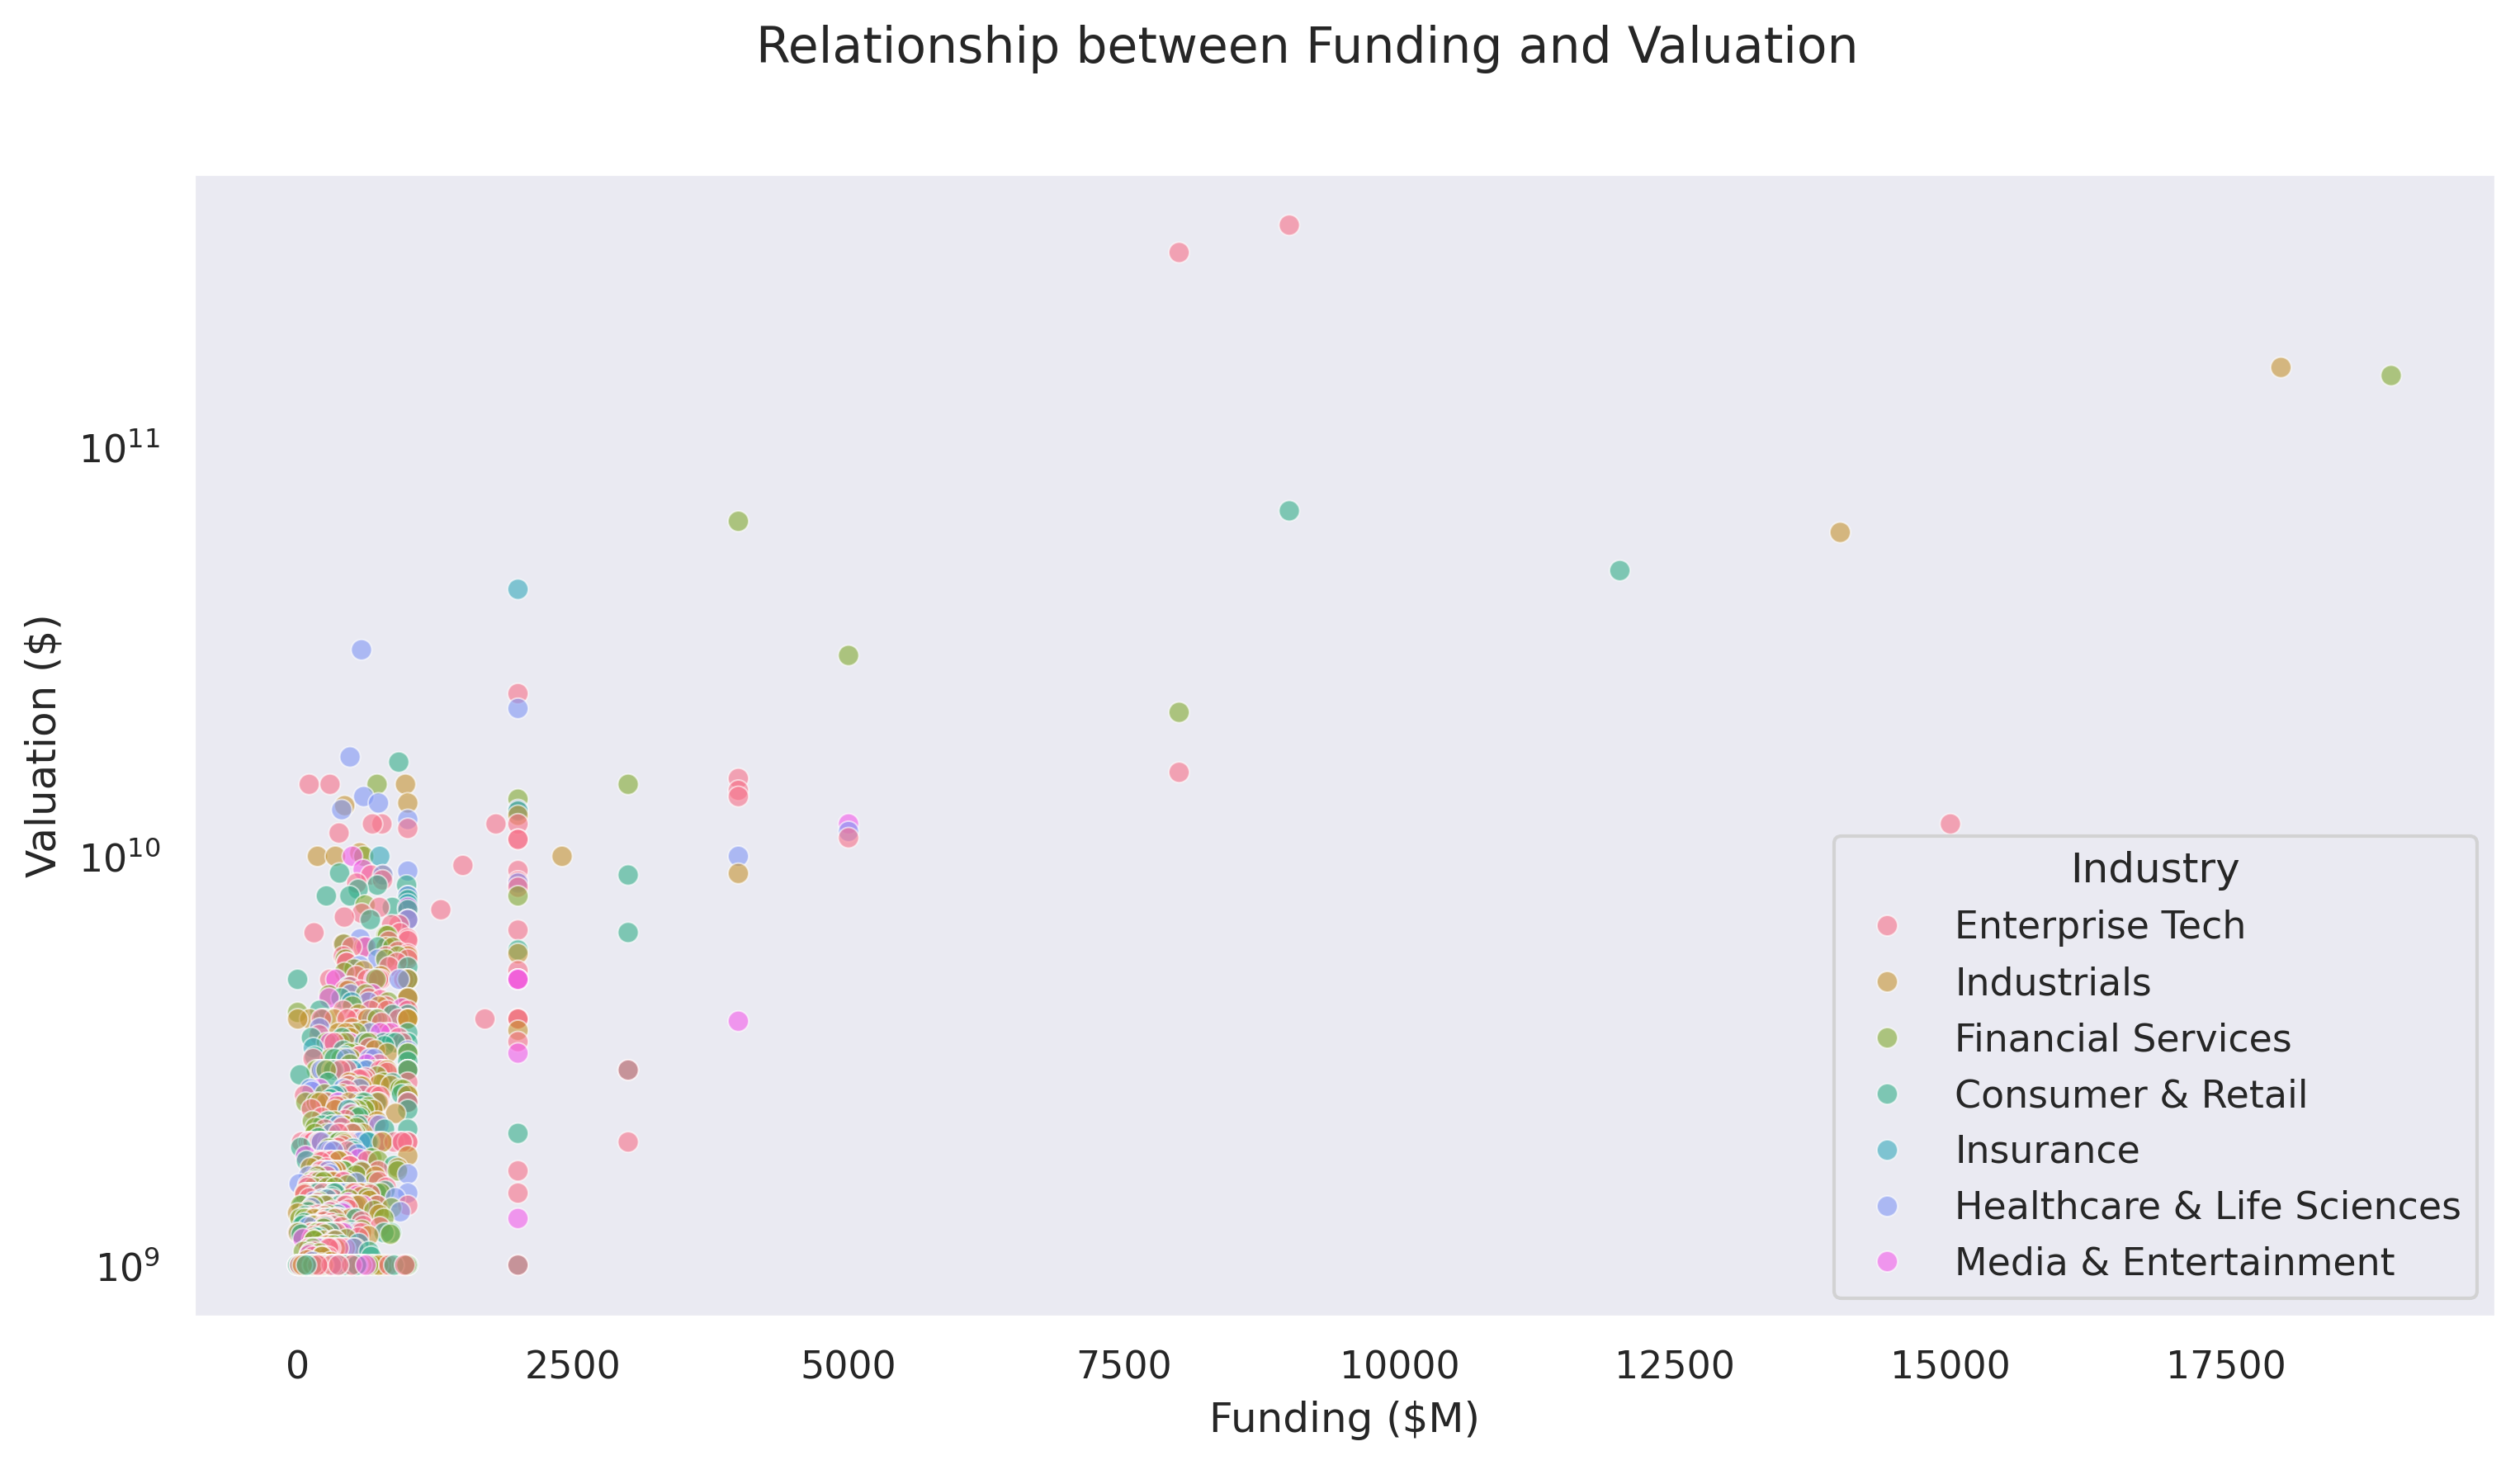

# Historical Analysis

## Survival and Acquisition

1.  Find out companies no longer listed as unicorns in 2024

    ``` python
    df_2022 = pd.read_csv('input/datasets/Unicorn_Companies (March 2022).csv')
    df_2022['Valuation ($B)'] = pd.to_numeric(df_2022['Valuation ($B)'].str.replace('$', ''))
    df_out = df_2022[~df_2022['Company'].str.lower().isin(df['Company'].str.lower())]
    ```

    ``` example
    178 companies no longer listed in 2024 unicorn list
    ```

    ``` python
    df_out.head()
    ```

    <div>
    <style scoped>
        .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

        .dataframe tbody tr th {
            vertical-align: top;
        }

        .dataframe thead th {
            text-align: right;
        }
    </style>
    <table border="1" class="dataframe">
      <thead>
        <tr style="text-align: right;">
          <th></th>
          <th>Company</th>
          <th>Valuation ($B)</th>
          <th>Date Joined</th>
          <th>Country</th>
          <th>City</th>
          <th>Industry</th>
          <th>Select Inverstors</th>
          <th>Founded Year</th>
          <th>Total Raised</th>
          <th>Financial Stage</th>
          <th>Investors Count</th>
          <th>Deal Terms</th>
          <th>Portfolio Exits</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>7</th>
          <td>Instacart</td>
          <td>39.00</td>
          <td>12/30/2014</td>
          <td>United States</td>
          <td>San Francisco</td>
          <td>Supply chain, logistics, &amp; delivery</td>
          <td>Khosla Ventures, Kleiner Perkins Caufield &amp; By...</td>
          <td>2012.0</td>
          <td>$2.686B</td>
          <td>NaN</td>
          <td>29.0</td>
          <td>12.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>10</th>
          <td>FTX</td>
          <td>32.00</td>
          <td>7/20/2021</td>
          <td>Bahamas</td>
          <td>Fintech</td>
          <td>Sequoia Capital, Thoma Bravo, Softbank</td>
          <td>NaN</td>
          <td>2018.0</td>
          <td>$1.829B</td>
          <td>Acq</td>
          <td>40.0</td>
          <td>3.0</td>
          <td>1.0</td>
        </tr>
        <tr>
          <th>15</th>
          <td>J&amp;T Express</td>
          <td>20.00</td>
          <td>4/7/2021</td>
          <td>Indonesia</td>
          <td>Jakarta</td>
          <td>Supply chain, logistics, &amp; delivery</td>
          <td>Hillhouse Capital Management, Boyu Capital, Se...</td>
          <td>2015.0</td>
          <td>$4.653B</td>
          <td>NaN</td>
          <td>9.0</td>
          <td>3.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>31</th>
          <td>Biosplice Therapeutics</td>
          <td>12.00</td>
          <td>8/6/2018</td>
          <td>United States</td>
          <td>San Diego</td>
          <td>Health</td>
          <td>Vickers Venture Partners, IKEA GreenTech</td>
          <td>2008.0</td>
          <td>$561.5M</td>
          <td>NaN</td>
          <td>10.0</td>
          <td>1.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>39</th>
          <td>Weilong</td>
          <td>10.88</td>
          <td>5/8/2021</td>
          <td>China</td>
          <td>Luohe</td>
          <td>Consumer &amp; retail</td>
          <td>Tencent Holdings, Hillhouse Capital Management...</td>
          <td>NaN</td>
          <td>$559.74M</td>
          <td>NaN</td>
          <td>7.0</td>
          <td>1.0</td>
          <td>NaN</td>
        </tr>
      </tbody>
    </table>
    </div>

2.  Financial Stage

    ``` python
    df_out.size()
    ```

    ``` example
    Financial Stage
    Acq            1
    Acquired       7
    Divestiture    1
    IPO            2
    dtype: int64
    ```

3.  Top Exited Unicorns as of March 2022

    ``` python
    df_top_companies = df_out.sort_values('Valuation ($B)', ascending=False).head(20)
    df_top_companies
    ```

    <div>
    <style scoped>
        .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

        .dataframe tbody tr th {
            vertical-align: top;
        }

        .dataframe thead th {
            text-align: right;
        }
    </style>
    <table border="1" class="dataframe">
      <thead>
        <tr style="text-align: right;">
          <th></th>
          <th>Company</th>
          <th>Valuation ($B)</th>
          <th>Date Joined</th>
          <th>Country</th>
          <th>City</th>
          <th>Industry</th>
          <th>Select Inverstors</th>
          <th>Founded Year</th>
          <th>Total Raised</th>
          <th>Financial Stage</th>
          <th>Investors Count</th>
          <th>Deal Terms</th>
          <th>Portfolio Exits</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>7</th>
          <td>Instacart</td>
          <td>39.00</td>
          <td>12/30/2014</td>
          <td>United States</td>
          <td>San Francisco</td>
          <td>Supply chain, logistics, &amp; delivery</td>
          <td>Khosla Ventures, Kleiner Perkins Caufield &amp; By...</td>
          <td>2012.0</td>
          <td>$2.686B</td>
          <td>NaN</td>
          <td>29.0</td>
          <td>12.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>10</th>
          <td>FTX</td>
          <td>32.00</td>
          <td>7/20/2021</td>
          <td>Bahamas</td>
          <td>Fintech</td>
          <td>Sequoia Capital, Thoma Bravo, Softbank</td>
          <td>NaN</td>
          <td>2018.0</td>
          <td>$1.829B</td>
          <td>Acq</td>
          <td>40.0</td>
          <td>3.0</td>
          <td>1.0</td>
        </tr>
        <tr>
          <th>15</th>
          <td>J&amp;T Express</td>
          <td>20.00</td>
          <td>4/7/2021</td>
          <td>Indonesia</td>
          <td>Jakarta</td>
          <td>Supply chain, logistics, &amp; delivery</td>
          <td>Hillhouse Capital Management, Boyu Capital, Se...</td>
          <td>2015.0</td>
          <td>$4.653B</td>
          <td>NaN</td>
          <td>9.0</td>
          <td>3.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>31</th>
          <td>Biosplice Therapeutics</td>
          <td>12.00</td>
          <td>8/6/2018</td>
          <td>United States</td>
          <td>San Diego</td>
          <td>Health</td>
          <td>Vickers Venture Partners, IKEA GreenTech</td>
          <td>2008.0</td>
          <td>$561.5M</td>
          <td>NaN</td>
          <td>10.0</td>
          <td>1.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>39</th>
          <td>Weilong</td>
          <td>10.88</td>
          <td>5/8/2021</td>
          <td>China</td>
          <td>Luohe</td>
          <td>Consumer &amp; retail</td>
          <td>Tencent Holdings, Hillhouse Capital Management...</td>
          <td>NaN</td>
          <td>$559.74M</td>
          <td>NaN</td>
          <td>7.0</td>
          <td>1.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>40</th>
          <td>Swiggy</td>
          <td>10.70</td>
          <td>6/21/2018</td>
          <td>India</td>
          <td>Bengaluru</td>
          <td>Supply chain, logistics, &amp; delivery</td>
          <td>Accel India, SAIF Partners, Norwest Venture Pa...</td>
          <td>2014.0</td>
          <td>$3.571B</td>
          <td>Acquired</td>
          <td>36.0</td>
          <td>12.0</td>
          <td>1.0</td>
        </tr>
        <tr>
          <th>44</th>
          <td>reddit</td>
          <td>10.00</td>
          <td>7/31/2017</td>
          <td>United States</td>
          <td>San Francisco</td>
          <td>Internet software &amp; services</td>
          <td>Y Combinator, Sequoia Capital, Coatue Management</td>
          <td>2005.0</td>
          <td>$1.326B</td>
          <td>Acquired</td>
          <td>33.0</td>
          <td>5.0</td>
          <td>1.0</td>
        </tr>
        <tr>
          <th>46</th>
          <td>Notion Labs</td>
          <td>10.00</td>
          <td>4/1/2020</td>
          <td>United States</td>
          <td>San Francisco</td>
          <td>Internet software &amp; services</td>
          <td>Index Ventures, Draft Ventures, Felicis Ventures</td>
          <td>2016.0</td>
          <td>$342M</td>
          <td>NaN</td>
          <td>17.0</td>
          <td>3.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>47</th>
          <td>Thrasio</td>
          <td>10.00</td>
          <td>7/15/2020</td>
          <td>United States</td>
          <td>Walpole</td>
          <td>Other</td>
          <td>Upper90, RiverPark Ventures, Advent International</td>
          <td>2018.0</td>
          <td>$3.396B</td>
          <td>Acquired</td>
          <td>22.0</td>
          <td>5.0</td>
          <td>1.0</td>
        </tr>
        <tr>
          <th>42</th>
          <td>Figma</td>
          <td>10.00</td>
          <td>4/30/2020</td>
          <td>United States</td>
          <td>San Francisco</td>
          <td>Internet software &amp; services</td>
          <td>Index Ventures, Greylock Partners, Kleiner Per...</td>
          <td>2012.0</td>
          <td>$333.5M</td>
          <td>NaN</td>
          <td>20.0</td>
          <td>6.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>41</th>
          <td>Lalamove</td>
          <td>10.00</td>
          <td>2/21/2019</td>
          <td>Hong Kong</td>
          <td>Cheung Sha Wan</td>
          <td>Supply chain, logistics, &amp; delivery</td>
          <td>MindWorks Ventures, Shunwei Capital Partners, ...</td>
          <td>2013.0</td>
          <td>$2.475B</td>
          <td>NaN</td>
          <td>15.0</td>
          <td>5.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>53</th>
          <td>Klaviyo</td>
          <td>9.20</td>
          <td>11/17/2020</td>
          <td>United States</td>
          <td>Boston</td>
          <td>Internet software &amp; services</td>
          <td>Summit Partners, Accel, Astral Capital</td>
          <td>2012.0</td>
          <td>$678.5M</td>
          <td>NaN</td>
          <td>15.0</td>
          <td>3.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>64</th>
          <td>Lacework</td>
          <td>8.30</td>
          <td>1/7/2021</td>
          <td>United States</td>
          <td>San Jose</td>
          <td>Cybersecurity</td>
          <td>Sutter Hill Ventures, Liberty Global Ventures,...</td>
          <td>2015.0</td>
          <td>$1.907B</td>
          <td>NaN</td>
          <td>19.0</td>
          <td>4.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>66</th>
          <td>Tempus</td>
          <td>8.10</td>
          <td>3/21/2018</td>
          <td>United States</td>
          <td>Chicago</td>
          <td>Health</td>
          <td>New Enterprise Associates, T. Rowe Associates,...</td>
          <td>2015.0</td>
          <td>$1.07B</td>
          <td>NaN</td>
          <td>10.0</td>
          <td>6.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>74</th>
          <td>Hopin</td>
          <td>7.75</td>
          <td>11/10/2020</td>
          <td>United Kingdom</td>
          <td>London</td>
          <td>Internet software &amp; services</td>
          <td>Accel, Northzone Ventures, Institutional Ventu...</td>
          <td>NaN</td>
          <td>$671.9M</td>
          <td>NaN</td>
          <td>85.0</td>
          <td>3.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>75</th>
          <td>Getir</td>
          <td>7.50</td>
          <td>3/26/2021</td>
          <td>Turkey</td>
          <td>Istanbul</td>
          <td>E-commerce &amp; direct-to-consumer</td>
          <td>Tiger Global Management, Sequoia Capital, Revo...</td>
          <td>2015.0</td>
          <td>$1.172B</td>
          <td>NaN</td>
          <td>15.0</td>
          <td>3.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>94</th>
          <td>Ola Cabs</td>
          <td>7.50</td>
          <td>10/27/2014</td>
          <td>India</td>
          <td>Bengaluru</td>
          <td>Auto &amp; transportation</td>
          <td>Accel Partners, SoftBank Group, Sequoia Capital</td>
          <td>NaN</td>
          <td>NaN</td>
          <td>NaN</td>
          <td>8.0</td>
          <td>NaN</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>81</th>
          <td>Argo AI</td>
          <td>7.25</td>
          <td>7/12/2019</td>
          <td>United States</td>
          <td>Pittsburgh</td>
          <td>Artificial intelligence</td>
          <td>Volkswagen Group, Ford Autonomous Vehicles</td>
          <td>NaN</td>
          <td>$500M</td>
          <td>NaN</td>
          <td>2.0</td>
          <td>1.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>83</th>
          <td>TripActions</td>
          <td>7.25</td>
          <td>11/8/2018</td>
          <td>United States</td>
          <td>Palo Alto</td>
          <td>Travel</td>
          <td>Andreessen Horowitz, Lightspeed Venture Partne...</td>
          <td>2015.0</td>
          <td>$1.04B</td>
          <td>NaN</td>
          <td>13.0</td>
          <td>6.0</td>
          <td>NaN</td>
        </tr>
        <tr>
          <th>102</th>
          <td>Better.com</td>
          <td>6.00</td>
          <td>11/10/2020</td>
          <td>United States</td>
          <td>New York</td>
          <td>Fintech</td>
          <td>Pine Brook, American Express Ventures, Kleiner...</td>
          <td>2018.0</td>
          <td>$1.42M</td>
          <td>NaN</td>
          <td>2.0</td>
          <td>NaN</td>
          <td>NaN</td>
        </tr>
      </tbody>
    </table>
    </div>

    ``` python
    plt.subplots(figsize=(12, 6), dpi=300)
    ax = sns.barplot(df_top_companies,
                     x='Company',
                     y='Valuation ($B)',
                     hue='Company')
    for i in ax.containers:
        ax.bar_label(i)
    plt.suptitle('Top Exited Unicorns as of March 2022')
    plt.ylabel('Valuation ($B)')
    plt.xlabel('Company')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    ```

    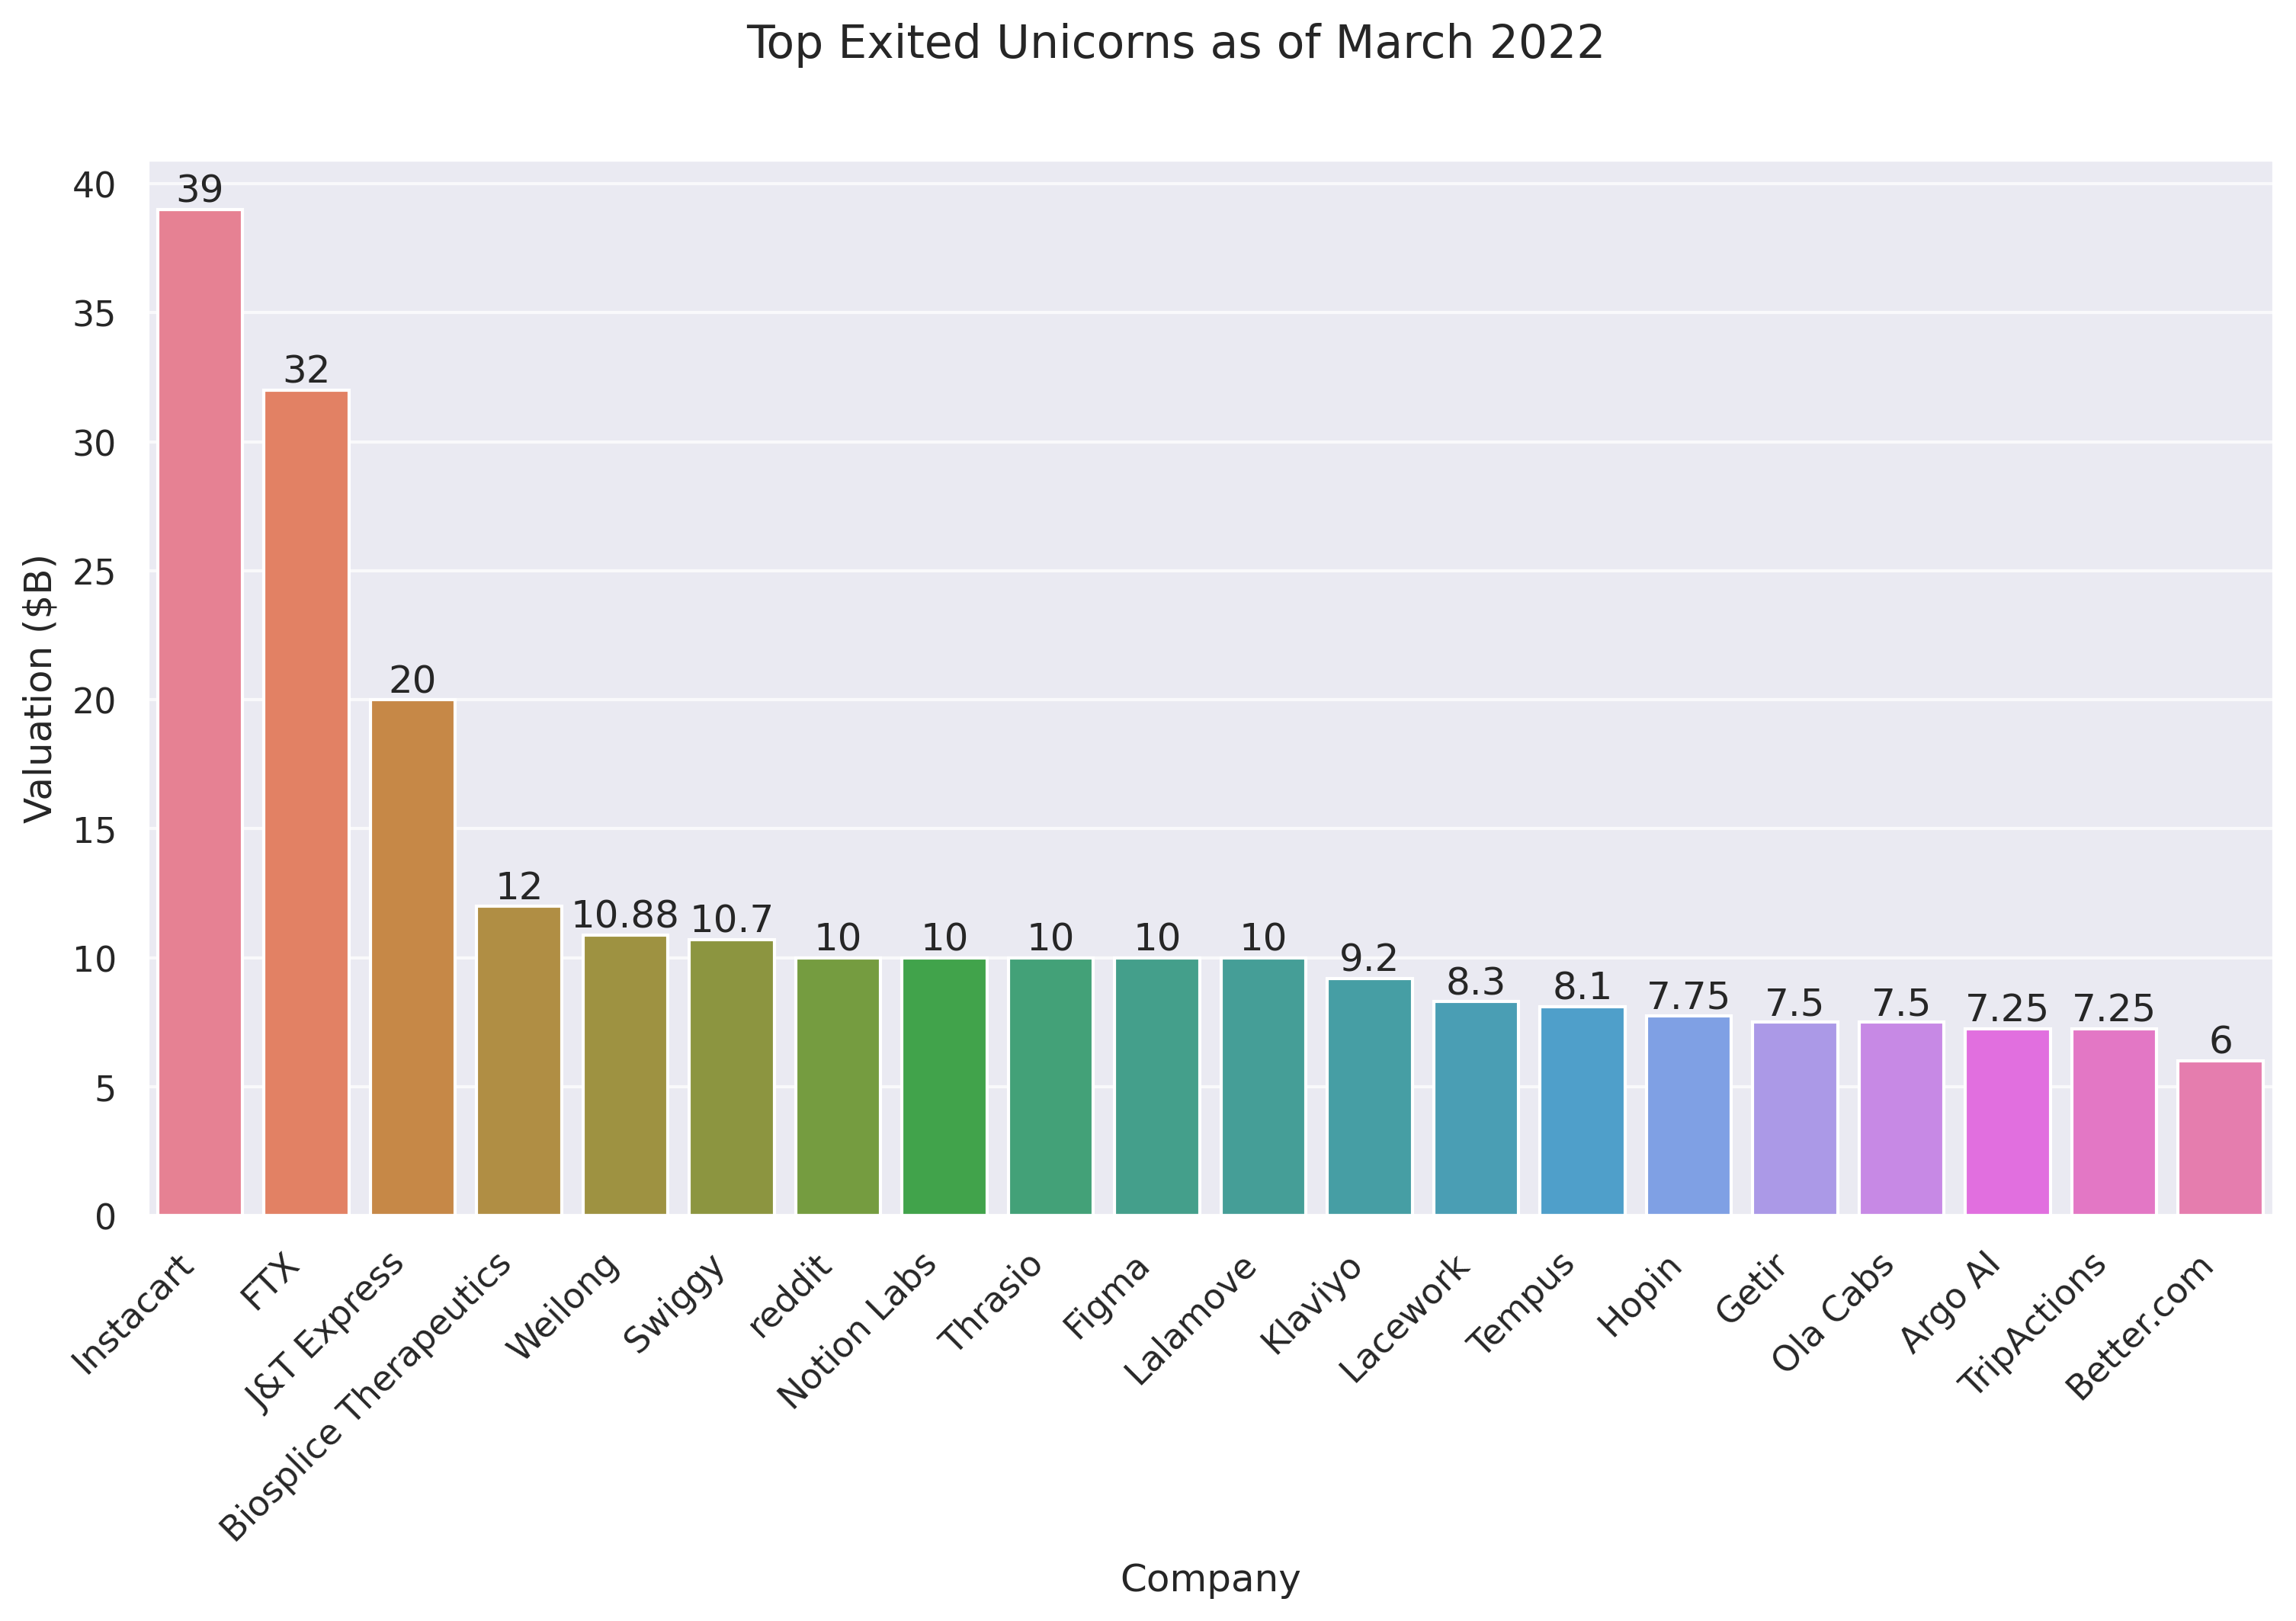

# Funded by Y-Combinator

Y Combinator, founded in 2005 by Paul Graham and others, is a
prestigious startup accelerator based in Silicon Valley that provides
early-stage companies with seed funding, mentorship, and resources over
a three-month program held twice a year. Startups receive initial
funding in exchange for equity and culminate in a Demo Day where they
pitch to investors. Y Combinator has launched successful companies like
Airbnb, Dropbox, and Stripe, significantly impacting the startup
ecosystem and inspiring numerous other accelerators globally.

-   **Datasets**

    -   **YC Campanies**

        ``` python
        df_yc_companies = pd.read_csv('input/datasets/2024 YCombinator All Companies Dataset/companies.csv')

        df_yc_industries = pd.read_csv('input/datasets/2024 YCombinator All Companies Dataset/industries.csv')
        df_yc_tags = pd.read_csv('input/datasets/2024 YCombinator All Companies Dataset/tags.csv')
        # print(df_yc_tags.groupby('id')['tag'].agg(list).reset_index())
        df_yc_companies = df_yc_companies.merge(df_yc_industries[['id', 'industry']].groupby('id')['industry'].agg(list).reset_index(), on='id', how='left')
        df_yc_companies = df_yc_companies.merge(df_yc_tags.groupby('id')['tag'].agg(list).reset_index(), on='id', how='left')
        df_yc_companies = df_yc_companies[['name', 'slug', 'oneLiner', 'website', 'smallLogoUrl', 'teamSize', 'tag', 'industry', 'batch']].rename(columns={
            'name': 'Company',
            'slug': 'Slug',
            'oneLiner': 'Short Description',
            'website': 'Website',
            'smallLogoUrl': 'Logo',
            'teamSize': 'Team Size',
            'tag': 'Tags',
            'industry': 'Industries',
            'batch': 'Batch'
        })
        print(df_yc_companies.info())
        ```

        ``` example
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 4844 entries, 0 to 4843
        Data columns (total 9 columns):
         #   Column             Non-Null Count  Dtype
        ---  ------             --------------  -----
         0   Company            4844 non-null   object
         1   Slug               4841 non-null   object
         2   Short Description  4692 non-null   object
         3   Website            4817 non-null   object
         4   Logo               4197 non-null   object
         5   Team Size          4766 non-null   float64
         6   Tags               4463 non-null   object
         7   Industries         4825 non-null   object
         8   Batch              4844 non-null   object
        dtypes: float64(1), object(8)
        memory usage: 340.7+ KB
        None
        ```

        ``` python
        df2_yc_companies = pd.read_json('input/datasets/yc_startups.json')
        print(df2_yc_companies.info())
        ```

        ``` example
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 1000 entries, 0 to 999
        Data columns (total 12 columns):
         #   Column       Non-Null Count  Dtype
        ---  ------       --------------  -----
         0   name         1000 non-null   object
         1   description  1000 non-null   object
         2   location     1000 non-null   object
         3   url          1000 non-null   object
         4   tags         1000 non-null   object
         5   site_url     999 non-null    object
         6   tag_line     999 non-null    object
         7   long_desc    999 non-null    object
         8   thumbnail    975 non-null    object
         9   founders     999 non-null    object
         10  meta         999 non-null    object
         11  socials      999 non-null    object
        dtypes: object(12)
        memory usage: 93.9+ KB
        None
        ```

    -   **YC Founders**

        ``` python
        df_yc_founders = pd.read_csv('input/datasets/2024 YCombinator All Companies Dataset/founders.csv')
        print(df_yc_founders.info())
        ```

        ``` example
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 8465 entries, 0 to 8464
        Data columns (total 8 columns):
         #   Column           Non-Null Count  Dtype
        ---  ------           --------------  -----
         0   first_name       8461 non-null   object
         1   last_name        8456 non-null   object
         2   hnid             8465 non-null   object
         3   avatar_thumb     8465 non-null   object
         4   current_company  7624 non-null   object
         5   current_title    2201 non-null   object
         6   company_slug     8465 non-null   object
         7   top_company      8465 non-null   bool
        dtypes: bool(1), object(7)
        memory usage: 471.3+ KB
        None
        ```

## How many YC companies are in unicorn status currently?

In [ ]:
df_yc_unicorns = df.assign(tmp_col=df.Company.str.lower()).merge(
    df_yc_companies[['Company', 'Slug', 'Short Description', 'Website', 'Logo', 'Team Size', 'Tags', 'Industries', 'Batch']].assign(tmp_col=lambda x: x.Company.str.lower()),
    on='tmp_col', how='inner').drop(['tmp_col', 'Company_y'], axis=1).rename(columns={'Company_x': 'Company'})
df_yc_unicorns['Batch Season'] = df_yc_unicorns['Batch'].apply(lambda x: 'Summer' if x[0]=='S' else 'Winter')
df_yc_unicorns['Batch Year'] = pd.to_numeric(df_yc_unicorns['Batch'].apply(lambda x: f'20{x[1:]}'))
print(df_yc_unicorns.info())


``` example
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Company                    98 non-null     object
 1   Valuation ($B)             98 non-null     float64
 2   Total Equity Funding ($)   98 non-null     int64
 3   Unicorn Date               98 non-null     datetime64[ns]
 4   Date Founded               98 non-null     int64
 5   Years to Unicorn           98 non-null     object
 6   Industry                   98 non-null     object
 7   Country                    98 non-null     object
 8   City                       98 non-null     object
 9   Select Investors           98 non-null     object
 10  Unicorn Year               98 non-null     int32
 11  Funding ($B)               98 non-null     float64
 12  Latest Valuation ($B)      98 non-null     float64
 13  Years to Unicorn (Months)  98 non-null     int64
 14  Slug                       98 non-null     object
 15  Short Description          97 non-null     object
 16  Website                    98 non-null     object
 17  Logo                       95 non-null     object
 18  Team Size                  96 non-null     float64
 19  Tags                       92 non-null     object
 20  Industries                 98 non-null     object
 21  Batch                      98 non-null     object
 22  Batch Season               98 non-null     object
 23  Batch Year                 98 non-null     int64
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(14)
memory usage: 18.1+ KB
None
```

## Top Companies by Valuation

In [ ]:
df_top_yc_unicorns = df_yc_unicorns.sort_values(by='Latest Valuation ($B)', ascending=False).head(20)
fig, ax = plt.subplots(figsize=(12,6), dpi=200)
ax = sns.barplot(data=df_top_yc_unicorns, x='Company', y='Latest Valuation ($B)', hue='Company')
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f')
plt.xticks(rotation=45, ha='right')
plt.suptitle('Top YC unicorns by Valuation')
plt.show()


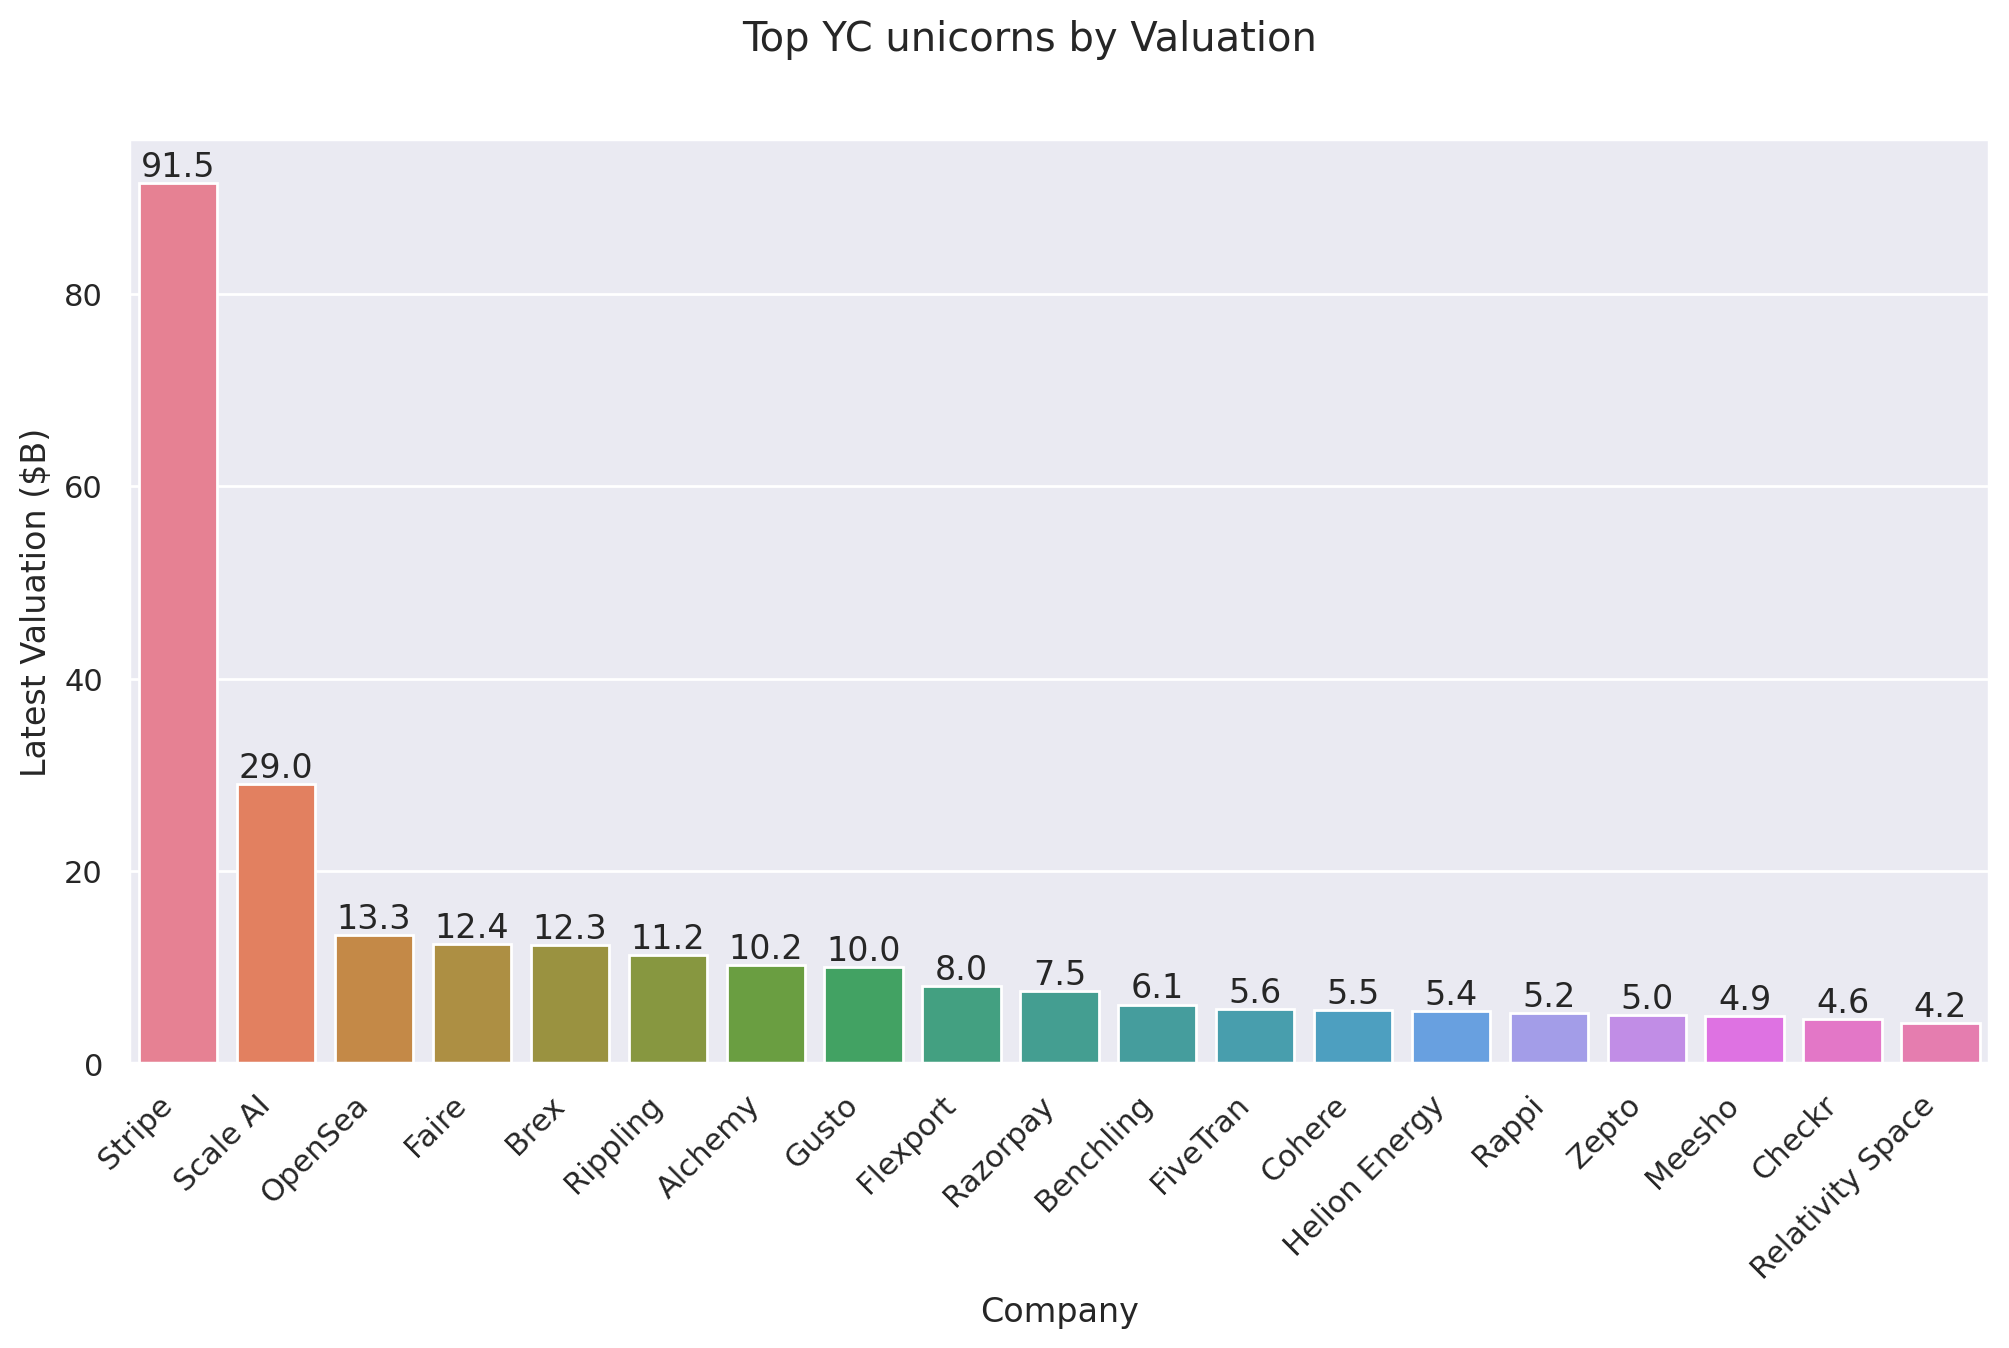

## YC Batch Distribution

In [ ]:
df_grouped = df_yc_unicorns.groupby(['Batch Year', 'Batch Season']).size().reset_index(name='count').sort_values(by='Batch Year')
print(df_grouped)
# sns.lmplot(df_group, x='Batch', y=')


``` example
    Batch Year Batch Season  count
0         2009       Summer      2
1         2011       Summer      3
2         2011       Winter      1
3         2012       Summer      3
4         2012       Winter      2
5         2013       Summer      1
6         2013       Winter      1
7         2014       Summer      6
8         2014       Winter      3
9         2015       Summer      7
10        2015       Winter      3
11        2016       Summer      6
12        2016       Winter     11
14        2017       Winter      7
13        2017       Summer      5
15        2018       Summer      3
16        2018       Winter      8
17        2019       Summer      1
18        2019       Winter      4
19        2020       Summer      5
20        2020       Winter      3
21        2021       Summer      1
22        2021       Winter      3
23        2022       Summer      1
24        2022       Winter      1
25        2023       Summer      1
26        2023       Winter      1
27        2024       Summer      3
28        2024       Winter      2
```

In [ ]:
plt.subplots(figsize=(12,6),dpi=300)
sns.barplot(df_grouped, x='Batch Year', y='count', hue='Batch Season')
plt.xticks(rotation=45, ha='right')
plt.suptitle('Batch Distribution of YC Unicorns')
plt.show()


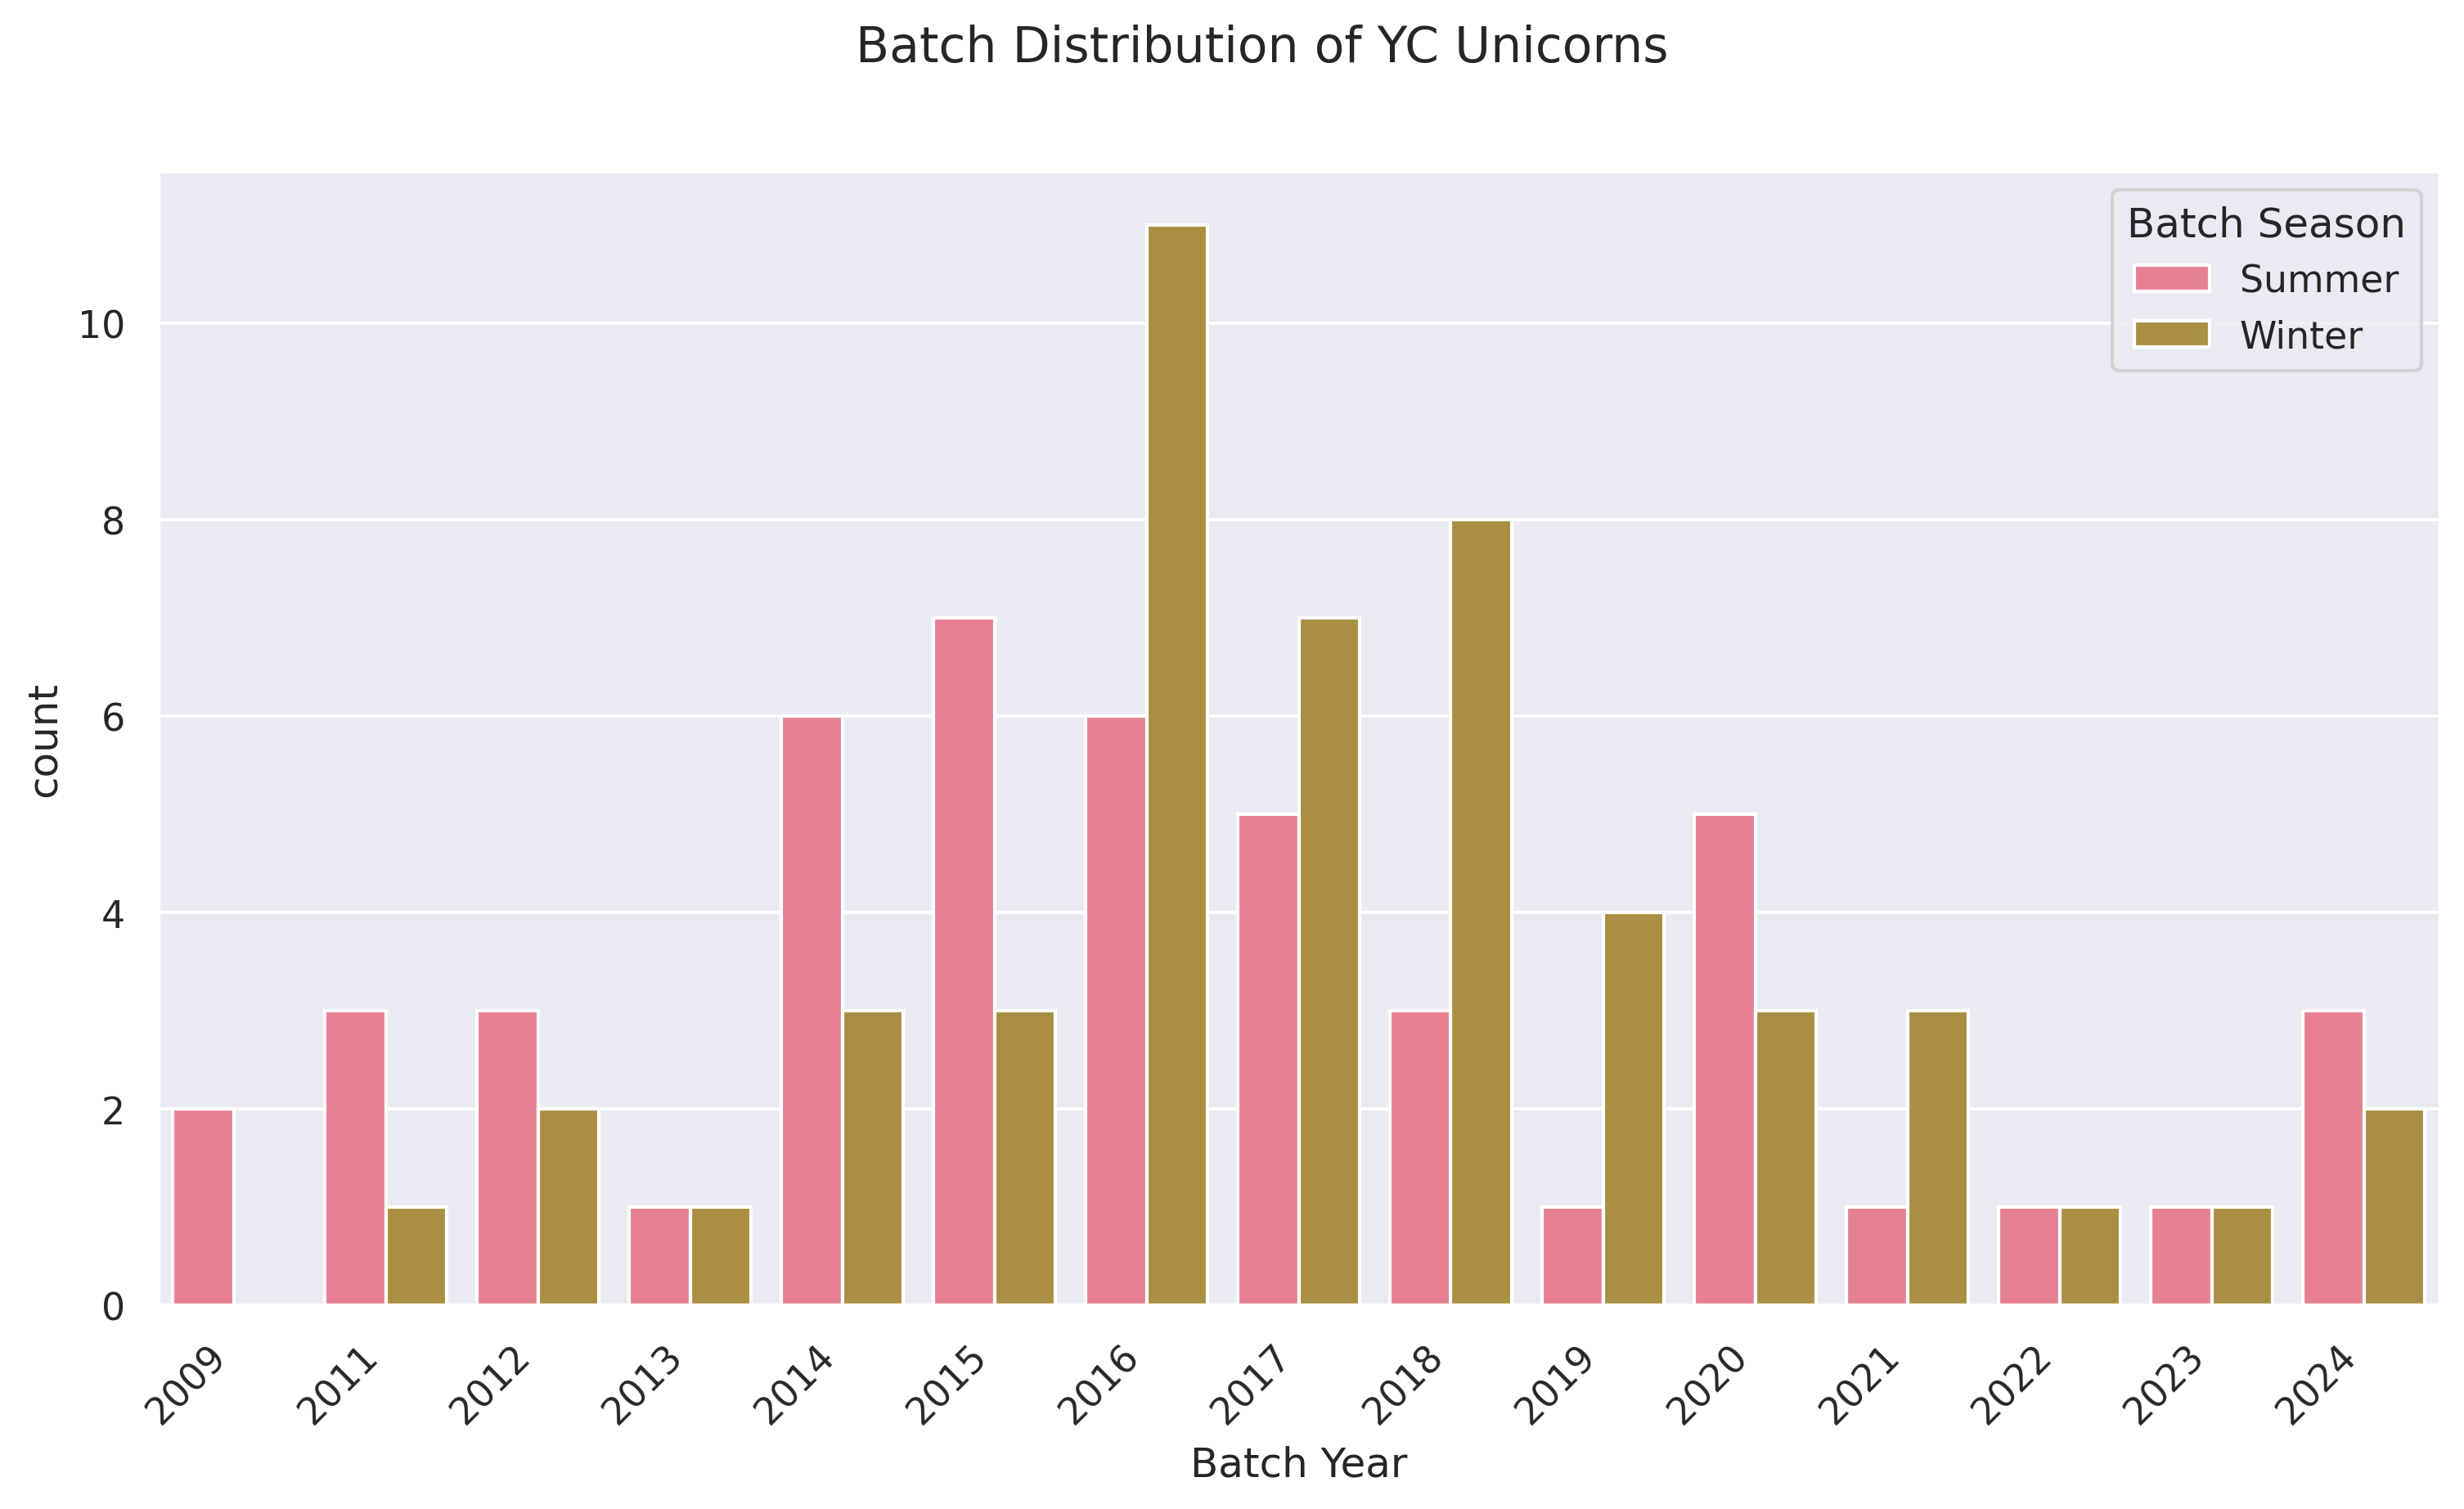

## Top Countires

In [ ]:
top_countries = df_yc_unicorns['Country'].value_counts().nlargest(20).index
top_countries


``` example
Index(['United States', 'India', 'United Kingdom', 'Canada', 'Mexico', 'Indonesia', 'Colombia', 'Australia', 'Senegal', 'Estonia', 'Spain'], dtype='object', name='Country')
```

## Top Industries

In [ ]:
top_industries = df_yc_unicorns['Tags'].explode().value_counts().head(20).reset_index(name='Count')
print(top_industries)


``` example
                       Tags  Count
0                      SaaS     25
1                   Fintech     22
2                       B2B     17
3           Developer Tools     10
4   Artificial Intelligence      9
5          Machine Learning      7
6               Marketplace      7
7                   HR Tech      6
8                E-commerce      5
9                        AI      5
10                 Payments      4
11                Logistics      4
12                  Climate      4
13                Analytics      4
14               Enterprise      4
15               Automation      3
16         Data Engineering      3
17            Generative AI      3
18            Manufacturing      3
19                Education      3
```

In [ ]:
plt.subplots(figsize=(12,6), dpi=200)
ax = sns.barplot(data=top_industries, x='Tags', y='Count', hue='Tags')
ax.set(ylabel='Number of Companies',
       xlabel='Industry')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45, ha='right')
plt.show()


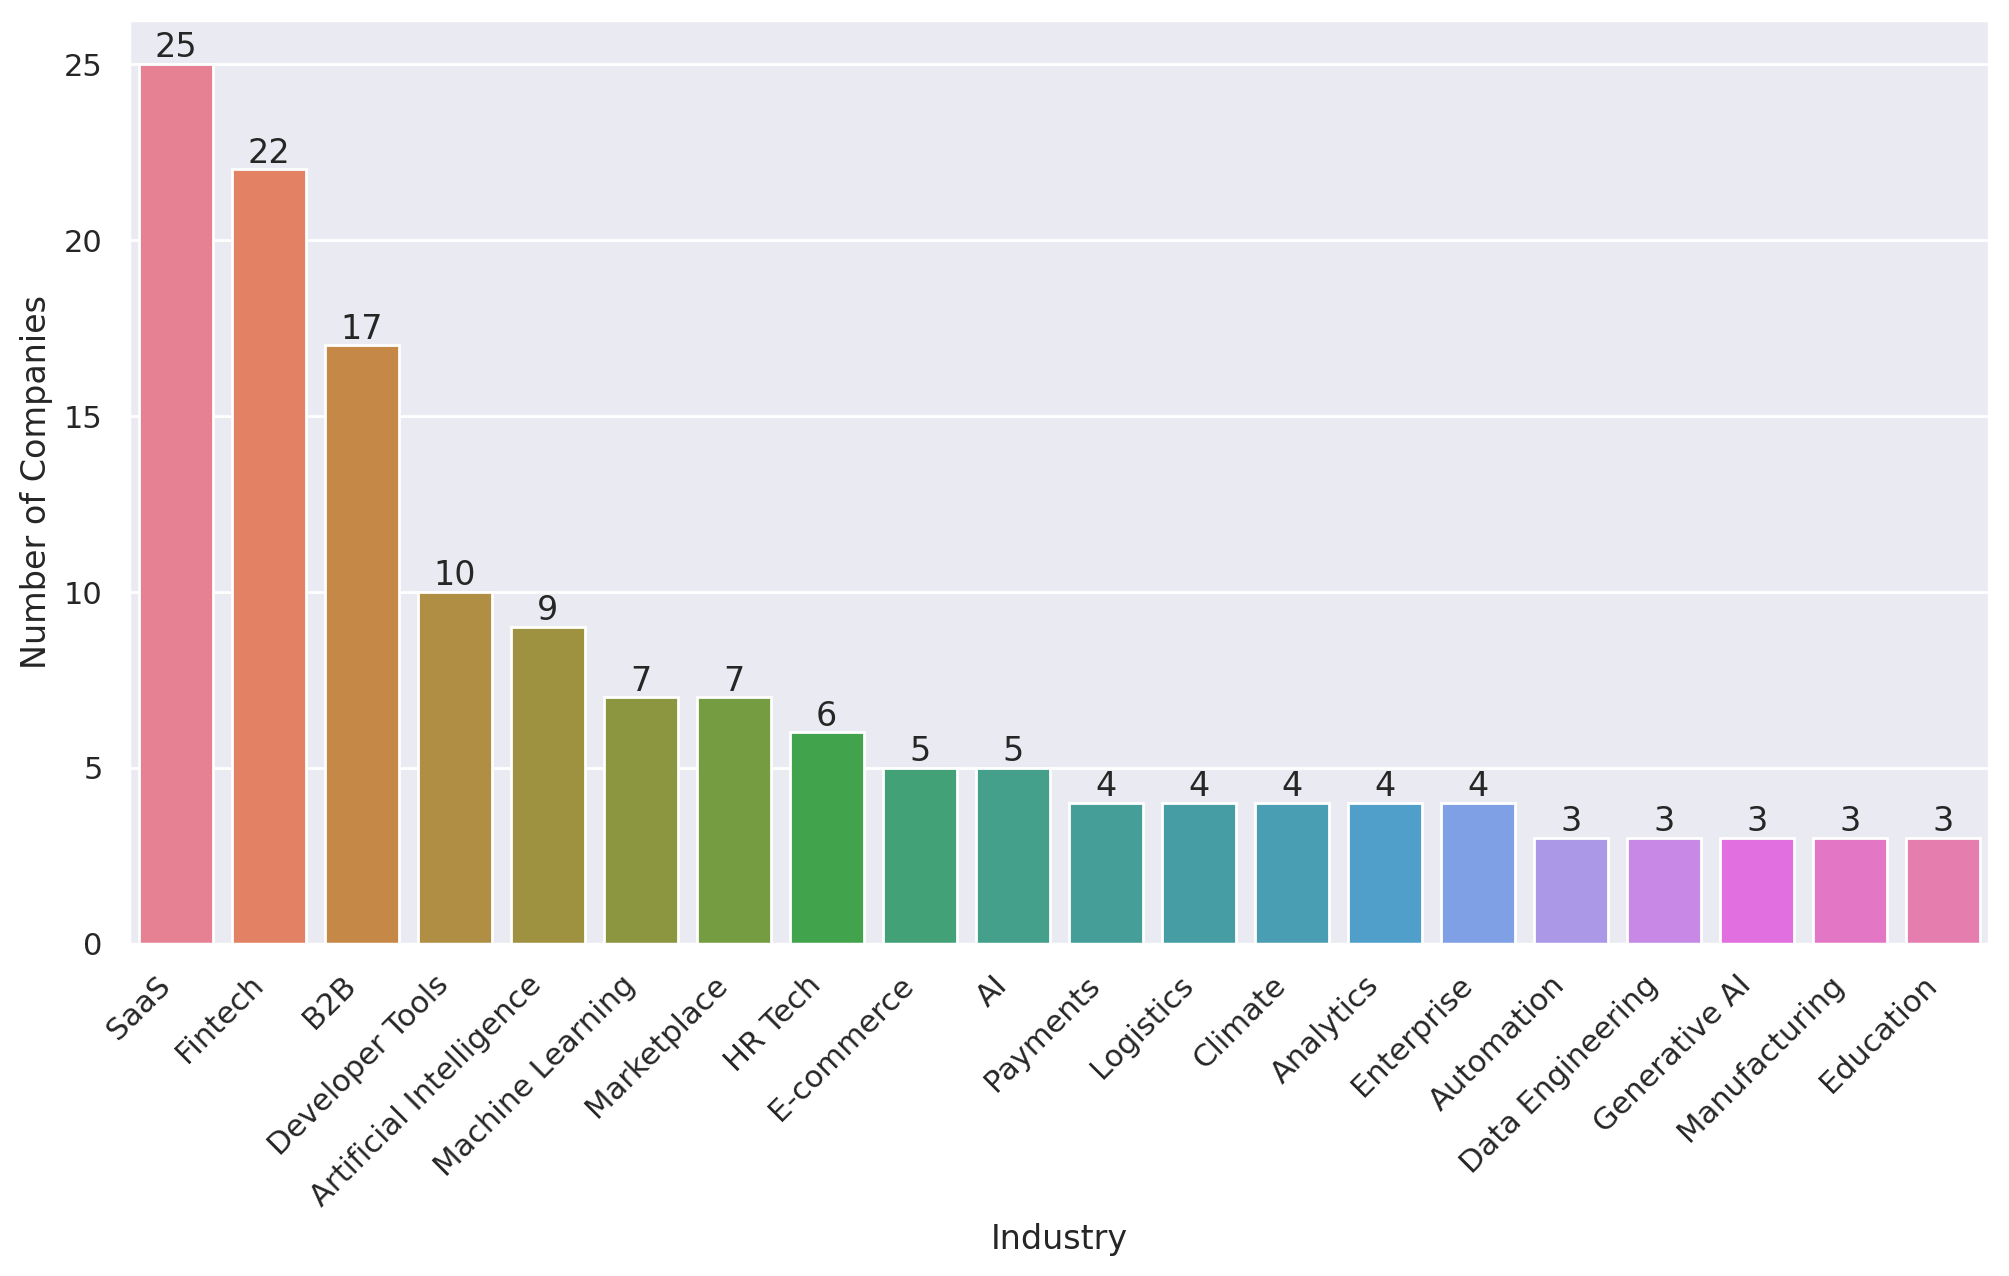

### Team Size Distribution across Different Industries

In [ ]:
df_scoped = df_yc_unicorns.explode('Tags')
df_scoped = df_scoped[df_scoped['Tags'].isin(top_industries['Tags'])]
df_scoped = df_scoped.dropna()

plt.subplots(figsize=(12,6), dpi=300)
ax = sns.scatterplot(df_scoped, x='Tags', y='Team Size')
ax.set(ylabel='Team Size',
       xlabel='Industry')
plt.xticks(rotation=45, ha='right')
plt.suptitle('Team Size Distribution across Different Industries')
plt.show()


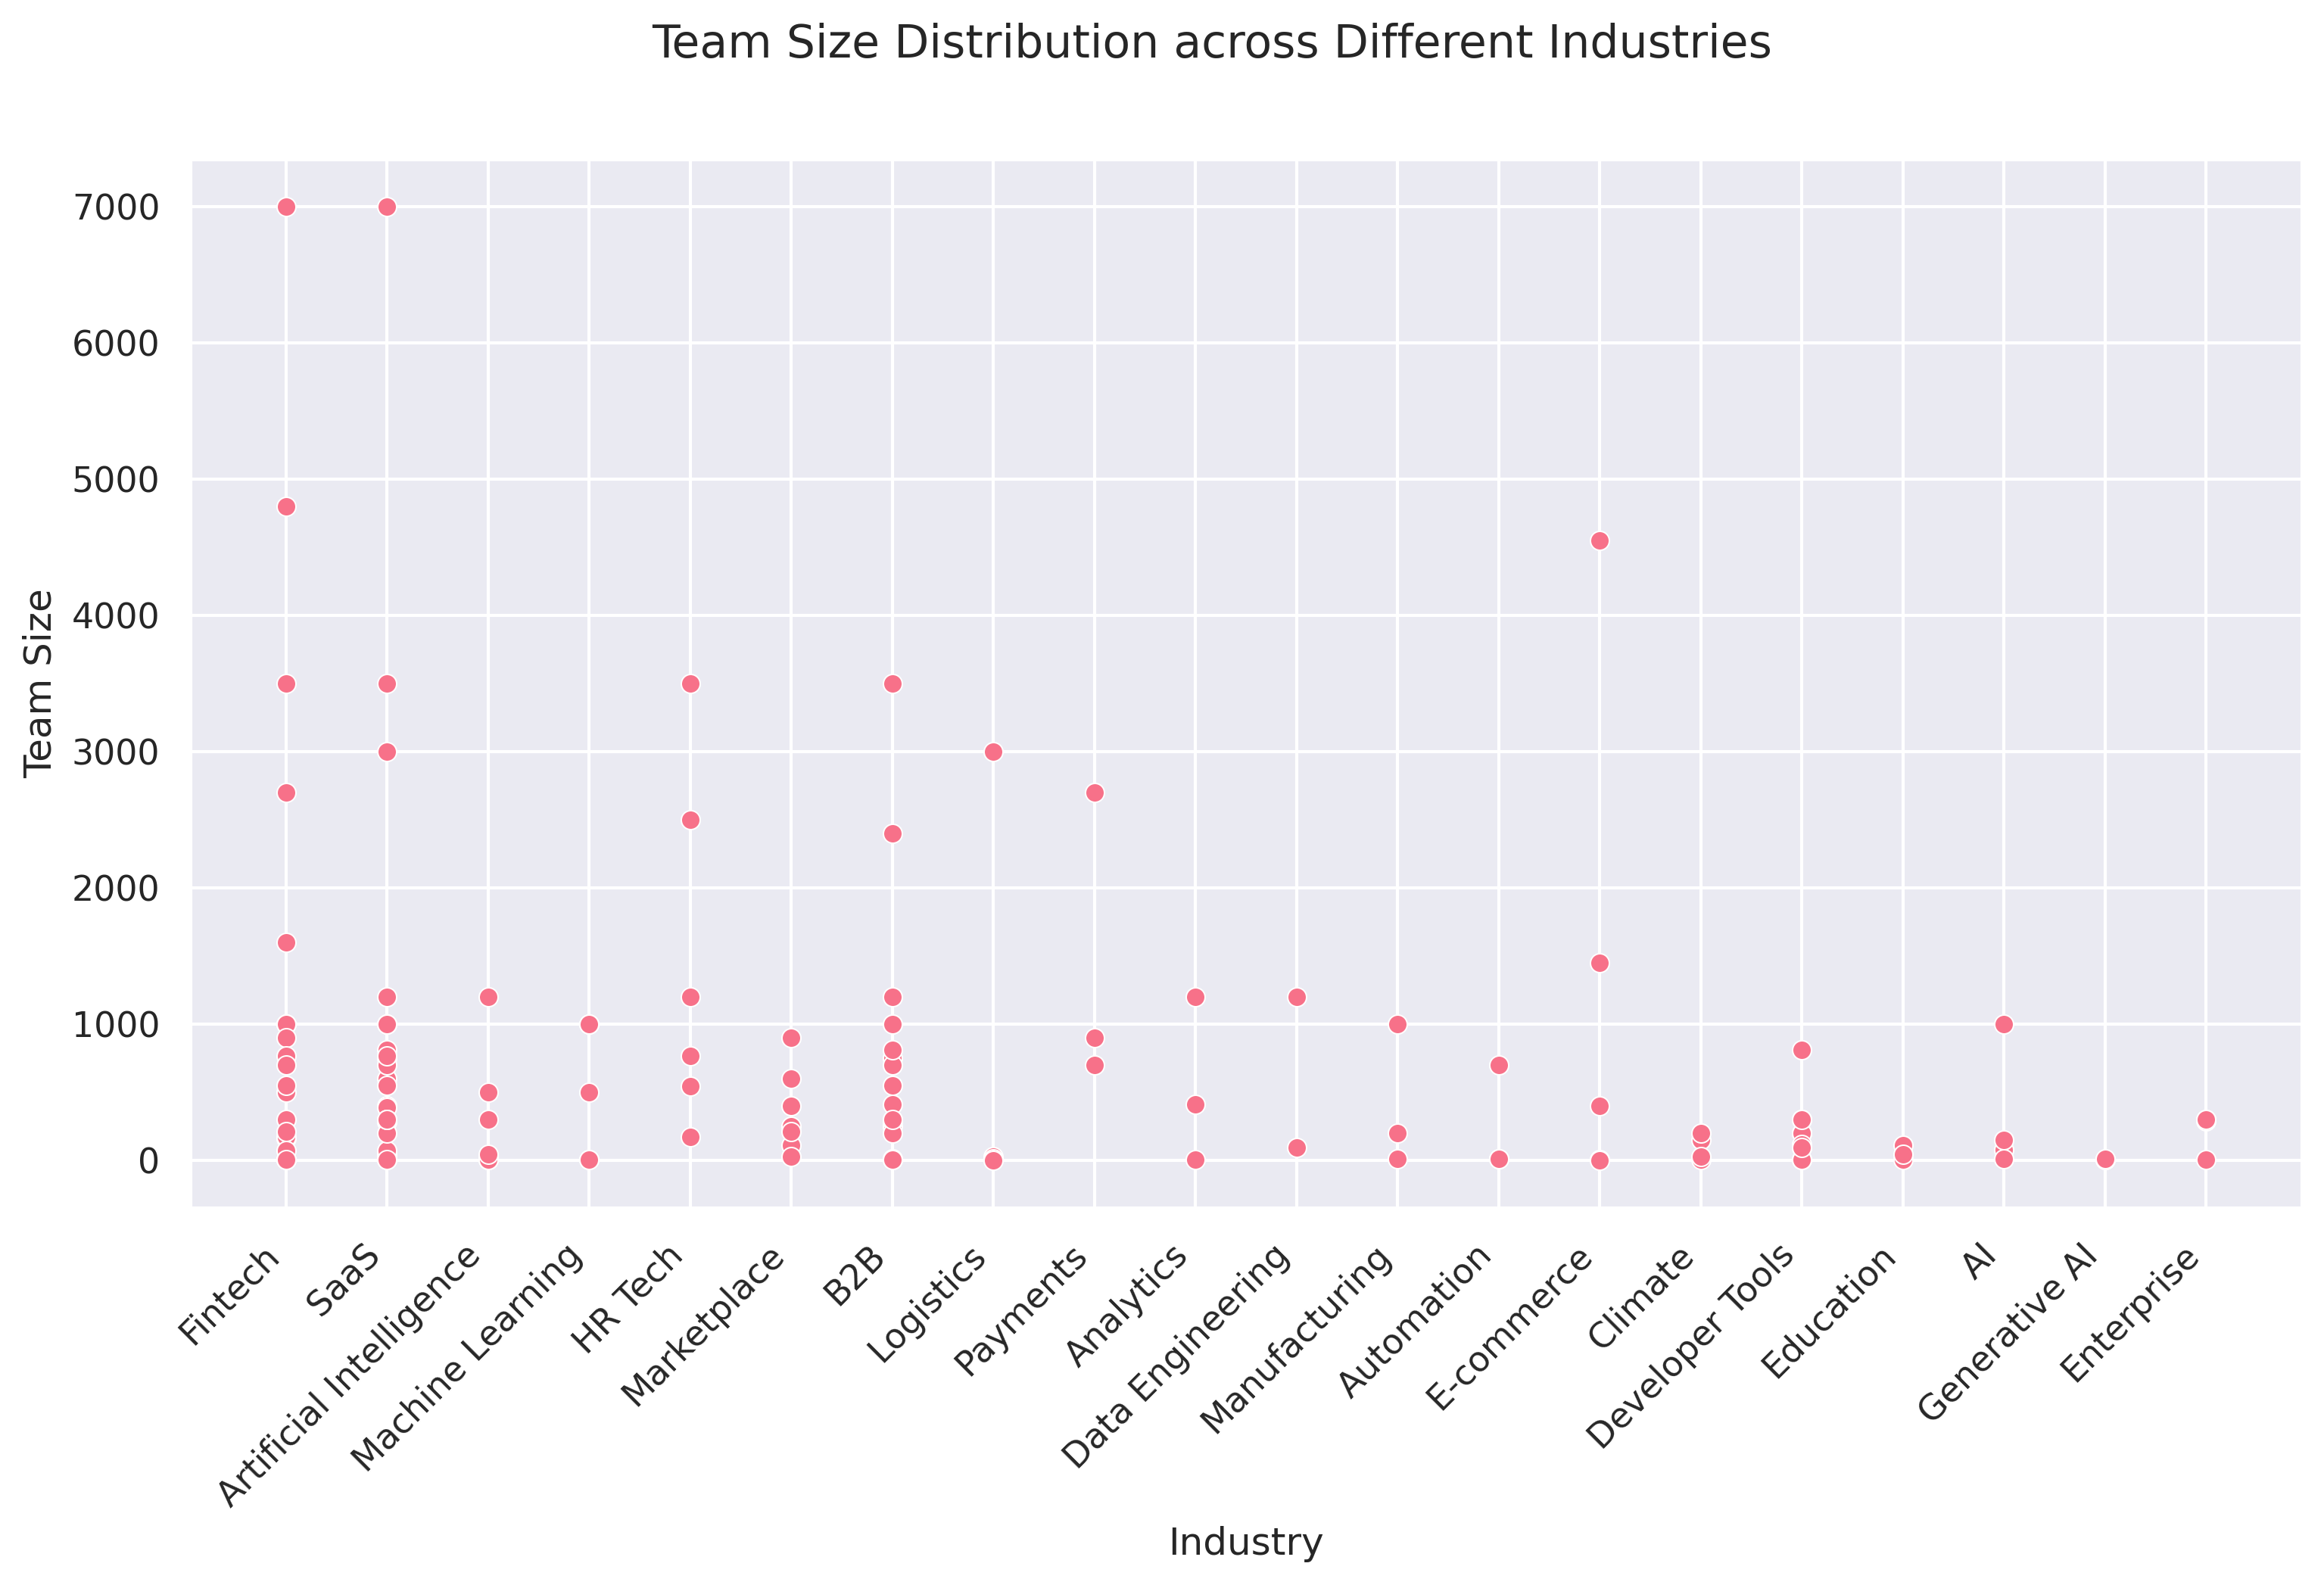

# References

-   \[\[<https://en.wikipedia.org/wiki/Unicorn_(finance)>\]\[Unicorn
    (finance) \[wikipedia\]​\]\]